In [166]:
%matplotlib inline

# scipy version 0.18.1

from __future__ import print_function
print(__doc__)

import time
import numpy as np
import pickle
from scipy.io import loadmat
from matplotlib import pyplot as plt

Automatically created module for IPython interactive environment


'0.18.1'

In [27]:
f = open('data/Renders_bw/trials.pkl', 'rb')
L = pickle.load(f)
f.close()

In [32]:
print(L[0].keys())

['position', 'stimPath', 'rotation', 'id', 'size']


In [33]:
position = map(lambda l: l['position'], L)
stimPath = map(lambda l: l['stimPath'], L)
rotation = map(lambda l: l['rotation'], L)
index    = map(lambda l: l['id'], L)
size     = map(lambda l: l['size'], L)

print('N. of stimuli : %d' % ( np.unique(index).shape ) )

# it can be useful a list of the files paths
pickle.dump( stimPath, open( "data/Renders_bw/stimPath.p", "wb" ) )

N. of stimuli : 1440


In [181]:
print(stimPath)

['./Renders_bw/Animals/bee_Scanline/bee_Scanline_cam_0180000.png', './Renders_bw/Animals/bee_Scanline/bee_Scanline_cam_0250000.png', './Renders_bw/Lizards/Lizard5_Geko_Rhacodactylus_max9_scanline/Lizard5_Geko_Rhacodactylus_max9_scanline_cam_0250000.png', './Renders_bw/Starfish_1/Starfish_1/Starfish_1_cam_0300000.png', './Renders_bw/Animals/Stag_Beetle_Scanline/Stag_Beetle_Scanline_cam_0160000.png', './Renders_bw/Furniture/51/51_cam_0170000.png', './Renders_bw/Raw Food/Banana/Banana_cam_0080000.png', './Renders_bw/Animals/Fire_Goby/Fire_Goby_cam_0010000.png', './Renders_bw/Cars/011_Mentalray/011_Mentalray_cam_0320000.png', './Renders_bw/Planes/archmodels_73_06/archmodels_73_06_cam_0050000.png', './Renders_bw/Animals/Hippo/Hippo_cam_003.png', './Renders_bw/Lizards/Lizard_2_max9_scanline/Lizard_2_max9_scanline_cam_0200000.png', './Renders_bw/Raw Food/Shroom/Shroom_cam_0310000.png', './Renders_bw/Animals/wolf_mental/wolf_mental_cam_0160000.png', './Renders_bw/Raw Food/Banana/Banana_cam_026

In [34]:
# open Data created with matlab table2array

Data = loadmat('data/Renders_bw/Data.mat')
Data = Data['A']

In [35]:
Neuron          = Data[:,0]
Stimulus        = Data[:,1]
Count           = Data[:,-2]
Significance    = Data[:,-1]

num = np.unique(Neuron).shape[0]
print('N. of neurons : %d' % ( num ) )

N. of neurons : 17


In [98]:
# create matrix neurons - firing-rates 
M = Count.reshape( (num, -1) )
np.save('data/Renders_bw/M', M)


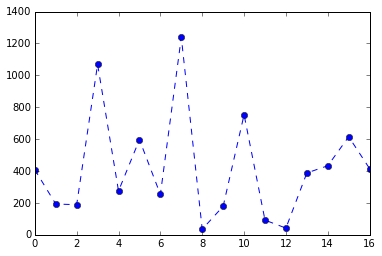

In [104]:
# significance mask
S = Significance.reshape( (num, -1) )
num_responsive_stimuli = np.sum(S,1)
plt.plot(num_responsive_stimuli, '--bo')
plt.show()
np.save('data/Renders_bw/S', S)

Max abs correlation : 0.426564


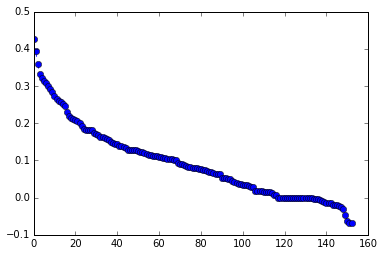

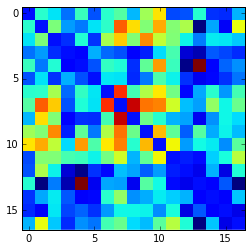

In [37]:
# thera are some correlated neurons

C = np.corrcoef(M) - np.eye(num)
print('Max abs correlation : %g' % (max(abs(C.flatten()   )))  )


# ordered coefficients

c = C[np.triu_indices(num)].flatten()
c[::-1].sort()

plt.figure()
plt.plot(c, '--bo')
plt.show()


# matrix 

plt.figure()
plt.imshow(C,interpolation='none')
plt.colorbar
plt.show()


In [38]:
# load feats

f = open('features.p', 'rb')
features = pickle.load(f)
f.close()

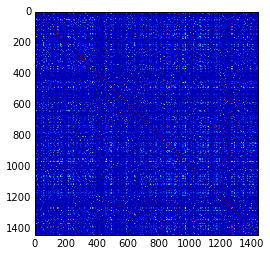

In [179]:
Cfeats = np.corrcoef(features)

plt.figure()
plt.imshow(Cfeats, interpolation=None)
plt.show()

Elapsed time : 57.9868


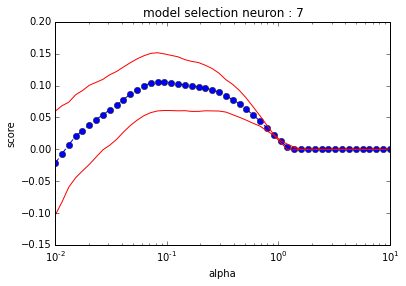

In [130]:
# train linear regression sparse to each ndata:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAQ4AAAEACAYAAABCu5jVAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAIABJREFUeJzs3XeYZVWZKPzfrlOnTuXUlTtUdQ50orslNlGQDCZGURBUxMZB1HGMCF5xdBzTMDheRcFRUXEUGASxUUQMSEaJTdMBqnOuruqu6sp1vj/W2nVa773PHea7nxe/p9fz1FP7nLP3Wu9617ve9ead5PN5h9qhdqgdai+nFf3fBuBQO9QOtb++dohxHGqH2qH2stshxnGoHWqH2stuhxjHoXaoHWovux1iHIfaoXaovex2iHEcaofaofay21+UcSRJcnqSJKuTJFmbJMlH/pJjH2qH2qH2f64lf6k4jiRJMngBp2ALHsMF+Xz++b8IAIfaoXao/R9rf0mJ4wisy+fznfl8fhg/xHl/wfEPtUPtUPs/1P6SjGMiNh30eXP87lA71A61v7L2l2Qch2LbD7VD7f8nrfgvONYWTD7o82RB6hhvSZIcYi6H2qH2f6nl8/nkP3vvX5JxPI6ZSZJ0YCvehAv+x9vucpIfut9l6KFmPj3PY0TjuU2G9w7r/t1eyts4sJXaaXR3osgsq60xA5NcPfGffXrLBShFrzfOecitq4/HJOQor+DAE8igCl/HhRzXIbN7u9HJE/jFZoy67rIbvf/mz9C/ITxft4+9fRikYiEHkH9BEKoqlH280lnfvc+tm09jVjVr1sS5DQn8ckv8XIJBs3PXeWHwm3hWEALL0EtRCWNDqOPsw/jpwxiheZqrZ37eg8cf477PTqV8CgdewohZ9lrjGEqyDD0Vhimewch6yloY281gqb9Z8Ss/uuk1jH2P0dcFHCyv5YFtoDFXadfg7jinhBkzWXcAxa5q+4rPbH09FYcxspnBrgj3YOino8p1TZ/x/kffjQnxbw3LZ0tqe+R/ujfe+z3KPkJ/j0XJzz2VXx7HG2XpPJ5IrKj5sglH9PnMvVdSUU3fTopmmPyuR2z641Qe3RjHzjKvnlXbMaT67+fat6+Ibwzynhz/fRXFixjZYfLr2PQf3/HGumq37j2a4jZGNgrbYT6VFczYwpMDFFcy8pLD393vyB2/9/U7TkM7XmLhAkvPe8QTn24QiKAsrHFS6fVTHnP7hlksn2/Fpn/19Q1voaWO7c/hFoovpqOV7oTdG7xx8oNu3XR0Ad/ymIpOWlqY3WLib+6wpfRwBgYj/a9FPbnJDL7ISdO5fx9eDOt+4mR+3UN1Pfs6UU3xj101u9dnnntnpMFybPNyzY1/Ma8KJElyBq4TdutN+Xz+H//s9zy3otE1TnKtOwUkjmBAIMp5dD4cv6/EMOUTONAlMIn9rnzbz1z/3beRFJM/EHsvj793Yhp2C8Q7gDp8C29GM3aM90UODQKvy6A/9lVEVRP7N6JeYApjAR5lAVarsRB74/cDAnEOoCKOP4rbcFHsuyGOuS9+HhY23lC87sU87EQt1mERno7wVZCbw+AL8d4k9lcRP/cLRDk7PvsDiQvkzcMGYQNMxJ4Ip/jsWOzraDzDu9r45iZsFxhgPq5TRbyuY3IVm1Y5wjqPWoQsmuK4bQKzvjg+XxTXZFiiXF4SYWmK+N4dx6/FDJI15IvRhQPWOd8M9yqZPmBo/X60RvjH4vrsjs8ORTzcgkviPeXoUdi0dd6Z/NxN+WMFGtsRcTIaxzsKT0SYq9x9wTXOuuVKk9oX2LxhU8B3UYtkbK28obimnRGOYdyMC+N1aZxnC3ZFeMsjnJUHwd4Q16Q3Xu+K+G4Jv2eXMtztjJJbrRxazA2v4d2/iXiuFJjJAYoeYOy1TGvkxXWxrx6c+bIkjr9oHEc+n1+Zz+dn5/P5GX/ONAothx7XutNJvq+hrEsgrBkaL0zY04PDsARjJqxo5EA3apBziW8HpqGXfImwODlhIbagSrm1AhGJ/8tNtAYJJWXC5u6naWG8Z1jrcYMCulopqsYoY/tYvEzYsMMYobJBmb3Yr/36qQI3H479FEU4SxzlLhqbImyjlE0QFnhQ2IyRcNpnheePbox4KMNGgeB3opGjJwnEVhPuTZ7HkFq9of/SSQIjyofPxS3YS7bcvOl98qocd1GQZtqra8JvZ06J45UG+IxQWolfh7G/+Xzss1ZgCBOMM1RV4bfeLpIqj1oS7ylidg6LD4InZYbdlLRRe0RgGqX1ZI4WNtUAFXVhfezFwxTXRTxlkDXDPRgytL5Edl5tfK6Ihtr4XPpsQlU2jj0U1npCRYCvbZawUQ+4KX9cXLOhOK/9sc9SPB/6rmxB4qxbPoGszWPpnLrJbDKhaH94tjoy9I7aiNMMHziMsjoFCXNfpIXKwjohMKpAE8f6FSWlZrkv4jNHc2m4Ht6ATVY2XIC6yDTyAlPYHvuqZmx7mMvOHRF3IwKzenntLypx/O9akDjupPow9q3WWLbHWf3/5Ns+KyB4DNXoFhZwkNpmunfFHlrMmvSENZtbBQLoVZAA0sUZi31lwvOK4t8fsUBYkIxAaP2x3wph8wzG79PWH8fpN478pJp8BbpoGmVnpbB4aRuLfWXj/yKnffDHfv6lDwonfhFehUfjdbFAvJMEk9CIwCCKjG+G0gwD+QB384ns6MFTsX/xvjHhFN4ibPZR7JetfcZw92LZ2n7DJ5zETx6J96bjZjCqXqUuQ5guSF+7IxwHDoIlhW1EIPztgjQ3hDyNNezqimsxGf8hSDB9dBwVJckIb1JMPpVgRiNMAxGew/FcvO4LfSuO9+QjPqYG3NivwCTKMeC1N77ojkt7I57TNR4RaCo98UcVGP6AwBjzCgwvifNI6SQf/5fFZ3KyRX2Gx+pVlA3r608ivPvwjKnlzXLXtVh9WTykVMX/6Vql9w9pv3C6Dd/bp3HCPrv2UPAzDEb8pvRXFmEePmge/XF9Uia9DssE6SWnsK/Oe+VKHP+5VsS+1RIjdvU3+rbPOsvXBCRUCoQQNn5r4/6gIypy9cR/Ymnems2TrHjjPUp0CYiZbeVbP2rROasE4siglMoOgUBLYt9Hhd+OXijlxBNmDTmn5jHMUNhEJcY33sUzSYoUpJcSLmwXFgW7KuJ1sWuP/T54x42PaT6nCBVOSV5A1s+/9DpsM7Elj1pJ8iDlc+M8K13g+2hkSQuXLo84GOLIyZTMZ6CIuqkYY8ev8IeIq1RXTq93s2iJsBESme8dbrj7ROQNdzfIPPpYnMsElDkz8wfklbTX6NKPUc3LHqOy2DmnPhH6WTZTfeug5PAaFixA4nh3o9+KxifQx7FzA8537aXlaDKHCwxsEXqZOYfOBx3pnojjMvJZHdcWCYQ/I8KE5ikUP8FbJlFa4gr/KmVa5535ECoYGBGY8H7LPOA9Kx81K9kd+xp1x6WTcSbGzPAHl6y4T7YpZaYZmlOVc8SK1/1U9quHBdzqQ4n3HPdL41LMSbPjdVGEsTjSU7Hh1x/BvBJ92YqwZic1hXsnn+6lA5OtvmwkjDP/iEibkVlkwvO3V1zjxiXfseF7nRiwa096EFSEf1cuRwdGLPHYOA0ua3wpSs5R2s5M9636GyxdugELVBT1UjUP5Y7whDrdXm57xUkcjRNvtmtLjbDI6elW4SxfcLf3xTvLvPuwn7jhueOibvcH4QQfEQxKqwXuWy4sdivZYobTMJIicrUMdvn4N+7w2cveoCAB9AuLnw/P6aW6nH17wu/vPI2bHlQ4eZrj9SC49vw7XfPjc40TUdUo+7s1farUzk/2UlXB/jLhpO5zYm61Xw/OCPdOa+TFvvhbhpIMQ1NVNm7VuyuFLRv+GsfYFU+Lo4/R/vQPXfKjh3zqrHMEgpnCogb2Z+nqo3stbZXs2c9wBWOBOc4/u9vkJ3ut3Nyutb7Titf90idvukKQ6oaZeRRrn8KAM6c+6WcvLaC6in278GodEx/QuSW1cUTRX2nA8bjdIDBAE2rYs4vSVzHwDGUjgU/0ZigZJpnK4NY4/zZBqqmmJM/QXma0eHfT993w4LEKkkiicMJWC0yxEftMnLDVlj31CpuyLeDFA8JJfcCfnt7tsoeXGv5jMdYqSFGpVFpMLs9gb3y+sI4FmklhGAmHUn4aJf0MrUO5GWd0W7eyVNjwWzm2ld93xnUdo3kuO16gcgK9vcIhkaG8jgOJExsf8utdCzXmdto1WBHwUDqZgVRtK7F07oOeWD+boVEFaTCnY9kmnY+3Rnz1CwdrVJWd+9ctcQx9+3CN5zWjSuPFu6QLe7f3uWTa5zjvFOx2Q8cVqKK8zrc+cr1x3VEnRXO1XzdDQE61mqlbNL52FDlrv3ylsiNmccZSlLruH89GhaVrMqo/UWfe803ef/NTTDtWINy8GZ9qMOkTJWjh354OG+eKo2mYSa6O4nrqT+CIJa65/WKlR79a4yWz4oza3PfBq+385CCHz2f/UpRZuibBXL8eXCgQ3VJe3K+gXlSF9W3Yo3dXBTefKjDCeWSKtF85Sesl8STfPGRD3xKfOuusgK+6KeRG1NQ8zYuP8bp2jLA9w0gpyTTNR9TScbxn755m5ebJLJ1jW1edTz53OQb8sPXzTJvH2t8IRM3PNr0Jbdq/MBMdimfs0blzNvX16m5sFgyZWede9JSZN3QET4w6MsvDvDLNkg+czsDDKKI/z9AsahYxnGdwo8CE0Tab5FgNK0q0f6oJ1WwrdcOD55KdKnvuSWrbZiKr/ZM1JDmmLBI286DM0qNtaXgD5QsUrzwbOaXtA9gQvFBFOY3vmAoufu1O4ZDoMfxsGbU52cY5fOJUvn9euL/xGM1vnuSbP/0Kzeeil6YZWs6dK6irzSxZLjDLiRr+/mjy/eacP6z2zRnU8IHZ1q0s48z5FA0G+nwioaRV4yWNOJ4dz5BU0Lsj9KkViVxbG/Z4rGyxmd+t9PqvrcdxzJrBwAZkVcyYQibniecPY2jUm57qRhs185DR+fjJktZq7V+cxaTXBBozyX/FufqKkzgUP61uebe9nZPD6bi/SyCmEl77aifdca37zbJ4SoMnN/ajMRgrxzqNG7Hmt7F6CiMPCxtxEg317H6JV81mzS7nHbPGT1ZWGTdGzXg1636PDpM7Vtl0oDQakEqpXu6Et97uN19rNe76O32SV/3ydo+NzEEzZzUz0Md9m1349if9YPVlxh56AFMpyWEjjaPMnc8vf8P0t7L+XuwhM4XZlaxaF/tP9dISYVEz3nfKWv/yyxkCM5uJdkpHGbiPmpPoeVA4BUc0VJXavX+I6gns24pZ2E5jP7u6UUbtbPa/yGhwCZ9TvcFd++aQq2JwB4efxx9/LpzEwxFPE7CL8uXmnHmn1bemxt+igAMvUlyv/rC8rmeOccLE7/jNzmMYzAueicRxZ2f87qc9wklXyqIWnuoKa6A3jlcWcKySphb2t1L9MDv2oI2yEu3Thm14DvpY0MIzWQxIJnTJ7+myRJ/5R+703a3nsKyW//hDoBWYk2P1S2RnM7wuMLbRX0QqbAp4L6rk4npWFal64ZdKTmiw5+7pjDDtuO1e/N3+iJMWlpTzhz+4qu05n9l6BDKaT51hx71P0TqNkXq85LiFnR74VZF8vpHSCQx0hzlXDtO7RLBrlQkH4JiwsVNbSyN2qqns11N2EsXr2baGZDn5pwTbUoVgMB8MNLKoiqei2mzPQes4y3HTf+F362sCHdmGs1+WxPHKYxx+Ej/1C27H9QreiKCnXuNtrnWfIMYtwpOCHrxJQMwm1PiOq13sk8LmG1YQa7MH/U8t2ENx3NSOgh+czFvvJx/Ul0SxvGoFN+kIt7yeC26XnsrB6PcSKmh5Ddtvj+NXSByQL8oxVi4Y7iqFzTKk4NLMSlWS33m3C+/+dxvO6j4IXgqGsNTLslXBmEYQnXMKhrOR+H2w8SRK5PWH+88/jx/fadywNnMJax9X8EYlCkbkfLyuZtyGlCPJk0/XJxhTx2NRxvGbjXPO8aY38O93KHijwtgXWenmb36Nd90V+2gSVKZBzX+bs+OrvcIJvFlQO/ZIJYyCZ6BY8xljdqwcM+6u1x1hHlEw+mbj9Wj8y1t0d4mnzkoZd4rrwQhHqpqm3+U4cx4/q8FD8fv9mB/Xo59MDaM749h9xtURGdRqOmO3nSszBRwlY9HFnBpqU5UiG8dvUjCgjhwEj7g+w3z8BD77WHw2c9Dv+ejmPnDQWlQd9PtfuXG06tgGyicqWK1zKHP5/P/gjMUWTm50rfuc5JsYpX6YjkaFoKrUL1/pYl/AGNkawV5SJHnbVCoqnVPXCU6/ZhPy5I6muo6SOpOWZtDKWzZHl+5cRx23W16RYz+8EVVOu/DJYCe5oBNTnf62PzrxnKcddvlmF77+cUxm+0uYwqwOTpmitX2viksryBZRlLoaywQimeJPN/+o43zXhtc3oc175z+gwOgqKK2K8+xVvbQDxU69fnOYb2kVGpk2nYaplM6NfQY7TmB+baiV2/ECxy+gfKpcw4jDz/gtShS/uSPAVT8nPlsk2I8qyTYEGGqX0VQdiL2yzDjBT5se5tVYL2yaGuOxI9WLWdsZvsuWqDmnLvSpyM3Zy3jXk3GsRREvwS6x48bJmGLmGzYJDLNRUBESM07YE59pR6kdK2c4t2OjFYffRVErr5sf8GJ2uCeJUoXSMLXGKRj11FmTmdxGbTCGvumKB8x83bCa7Is0tqGZ1laSlvDcyr3CwRbXLLdAiK+AGRSNqZh7BMlkTLD8uC1YTFJDbqKdKxuobJSpHUX0ItU2xaWKtiylEXfzMKimLBOup6dB2E2CulEVaPyzO8yauyHQ0sKOSFMlKJHMLY64LqFiSlhDFf7UU/ifa69giSPlxKMmNu2zZWelgJzUqzLmElf7tk+jWPvMnTZsaGNoWGPSZVe+TTgZijXN2mvXzhr57tR+kEXiUl91o8sUdLxhiuYwtpryeob3qawo0ds9igEuPZYbw8YKDKmE4eH4ecgcz1hdsZS+wdhfkZSRTWzYYctRr5Z59jmjXWPsK1Jb2a+7t+CWLSopNzbUH+EukVruWyfutm1Li9dmf+iO4TfFPnMUl5Ivi6fawYufukPHFNzP0V1rjGkLePGFMO2R1LDYRPEuRorMPm6rF353mNrqDbr3VQhMbWN4vmyUgaya/E49KkjKQ0xFsoehIEE1Ney1c3ejhsYuu3flyNYz3BvxXBxh3e+jPuVzrg195A9oqt1rZ3ca25DQkGX3cHwmesQS5PdRNY39OyzueMqTnadgj2ztoOHu9N6A/5raPj11C3ipT3APj0ZclNIyiR07lDQM+ZcffNPlp14ecJ/BaJCcShvHDJRVsjENJsuobBrTtzMvL09xNSMDWCqoGqnUOEpFLsb4jZHvJVfBYCrZpm7XonFYA2Nb5aOu8TnXmjprp/6hCts7K6KUmD6bFSJUa2KA47DamgO6e4Jn6DU3bvSLS9vjXItRom3qZn3/sFDPW3fSVMrOoILW1g55T981Pjv83F+7qnI7dbPYu86EFY323FJET0K2LQQBdf8R7dQP0fWMs3zL3S7BkdikbWVi6xlDNM1id56xp1FP/QS6NiBD02yau3hmNSo1z8vZsaoCW2k4gf2PkZvIJVVcv4r3HslXHlWedOv/8GHy/7yXoT7sNm3lRC+ekcgZMKjIsqa1Hu85j6o+3lQhOzBm+KZVxlWgZCEnbuL+/Qqn4CNCUNt6BU9NJybxljr+fRKj+4RYk4Fw0o+UcWopezdz2FT+7Q8cGMYeJi5nW5ax34Yx5i/j2adRyoT9XlW/yWPzz+OuTeZ+btDzNy6iaR2/3Ub9YrqeJTOd0ZcUJLhB5p/Dsxtpqmfn7yxZyR+ubuDxXbSWsW0XmsguZn6GP/5R0Lnnhfl0LCfZGOwa92xnYBsz21k7hB00zeTcSm58hiOPoqWXF3vlZhQbfHGEZ1sYfTqs/+Re2nM80BdxlWHZXB7/I3OPZPsIvTmGdzFnHqv/Q9k3Zuq/rDLen6Omjp5VlB7GwGOcvUzN9j1mr9js0cvnMdxNdiLDD5M9k8pe9v5eiP9Ybf6KxIvZhZKv3KtPg6COTEILFUUy1ZuM9i3m+B5++hvB1jQV95I7kqYX2bQA91G1hP2r/WnI+dEBL17kiNerWvJr+/99Hvu3UFTE0FoyixitRTFHVWo687d2XjNCxRhDrRYP/8TeKafbsLEIQzROpL+E3odQZqZ+a5XhrL9uxvGN95/isuveF91PexXcecO+8fdfddmXv8TYS0E96QwGn7N8090uL3RUk6MnDdbKa524x7Yt9cj6B1f7hH8RNudaZRMH9W+pxKh3n3KXG076kA9d9Ulf8HHBJReDtTom0Zm6Cov5zAKuWo8eymrIzOGwAzzynHBC78Q+cnWuHvyiT3uvkqUlhp5IQ9lTW0Cq8+YU3LC1DHWFcaaUs/EATQvY+QyqqBykty9c66Glge27jZ/UVRPYn7oJE+Z3hM05mOYU5uPfEiF0OpxKQS8O+P7GguvdsPzNnvhagyAuD0V8xpiE0lLJQK+8DBNKfeo1/+aTt1yAImed/oSf3bNEXlmYY9JKfkOca6mCKzBBNXVt7H02wpYGP0U7QqqaiTEPylmS4Q8DUvfvpZfd5cZvXEB7GRu2x/umxv76WDybZ55mNMV7DB6MdpGjPeEhS+L9qcSS4wuLVdV023/ZRqm7/RP+1T+4OqztuBu4PqyDWrKjUboK0tfUZaNeejyPMprb2LHe+e9+xI9viJ4mJSEWqKiY0d64EarJp4FtdYI9IkoPDSXsTlzbeqNrtl0h2JrStILU/pE4YdYzms8t86MvHkEyQr4n0MeELHuGhIPqWUGNHMAZf902jsuuey+KJP27pcabT7R+DlmXffHD0Xsyg879Jk/bjSPc7XKfP+Edqo8PzOGjV/9AEOdm4QhP/92HLH1PiO3/hE+jl1wwlvVvqRgf54Zfnsa9zb7gbeg0Yfki75rySxxJZ6dAqPXKc1Vc9QynzWT6GRTV0/sHHlnNu84Q9NxikhMYPODTPuC7H/2KoScGfeSZlYre0oasdzbcKxDxCEbMnBRCxJPhbcKC1tNzhGva/oGdFSqOr6LuVfRGL9Mp86k8hu194V6QZ/8egXBjBOyz/TE+IisQTC1lzVzZQfHZ0hyQZEqZIAFlXPbMxyz++dPxtzRGYUz7qZupnuCN7/ylvGLKF2qo2euLPZdEfNeoeGK1vBKfWfTjgLNzWiKOyyULTqP9HIW8nm7qQy7M5Y2/pPoUwX7S7pSfdId5WhikKCVUT+UP3Vy5GBWubn+vG79xBrq9/fhb4ji5uAZ7LK/5oSsf/DdG05iG6L0pmh/75uQvbAzzLD88PDulMsD9oUdd/exVXLRcsEXl/YMrffaC68Oa1c/h7a/xJ5HBw+khkOc9p3spaadmCoaUHTOAIj++4ZzAHIobAg7yMxgdMG6PyIcI2dVzLvLI8veEvuqjR2h3CES8ZtvFimcuwzHghNq7FE2ZwMQlSPxmzVI/+uIcdJGf5MEZH3PUmWtjbGIx9VkzyrudUPvvGrIHl8n5z7VXnMTBT8zwonXmSQ2jluHxbQonc7RVZPMM12KXmhPrLPn1V93v/UzIsWePsCHLeWsdD/UcFCeRCMk9O0I/8yawqjv+NlHQhROKm5jRy+o0fL0LDdrrn7Ohq8m4O25WP2vS03yyYFUvYV4rL/ZHkbyVtdtonMyebsYOBALd2Ovdc+9zw/MXqi1do3sgzVWALLkmFozweIXp7rPedMoa6e8OczhqiIe7BKZWZJlNHveqCG96atUqhOlHyWFGK+tGmVXMmr0hsOmYKdy/PuJtlMnVbIoepunzWP9C0NOHiqgaiCEXxWQHdNRu0bmrOazPYfU8N8DsDC8UUZ7lwDaqJytaOGTsgZzg+YqRmqq9xjf8Yu6VPD+K3bLHtzhz4x1+0nkiGkNg78OD4f6SkoDzZ3dzciu/2hjoZEIFe/ZG3E3DRto7QozI1nWCIbFX1Yoq+1dm2RBdl80T2LHDeDJh0kQ+ZEbnTigz+Js0XSF65abV8GJP6C9XxuAmhVSCkvg/J+Q1Rff3WMaMyvXW9cacnUwp0yaxdp2CByf1/EWp67Rp9Ayztp8FdWb8+l7rzJF6VKprh+3rjvlNHZWqTyiy7ztlgqMgle6iDe51zfx2J3uih3FyuUs2fc+3p17AzgH6Xl6S2yuQcdwlPY0u9h0PtJ1t/dY04q9TWJRGQbw6oO3uJlvP2ikgv9Y1jnVtcjv5NA5i5KD/I382YrGCVyO1hqf6JeHU7/mzZ+oFVSPNY3g17is8W99KVzjd20en2pBZoyD+pvkUaYhySij5g4ZOXcVpPk2LQuG09LeD4SzhwuV871dxLmneRCopJFRNYv9mkuH4SBtDuzDsK5/9tvd+/HLvuvI237z+LMHduVPBiHiw6zq6oMdF/VTsHxAY8e6D8JRVcOOmn8XnpwvZmqk79uA8pOKA84pa+mYLrs68YGeJqpxB4aR9VCHit+COzbym0ugv4oY1SDJIPlV70sSudC0yJKPk84IHp4//IQQ7TZJLVbwxgTHEZD4jCm70NNR7zPTmndbvaBYYUlp6IMJ55Kt55PfG83jGQwZSz1kaOlBop/uWe1ymEAn7P9u7HYJYsf+g71JaSvGUZmhHVVLGKzo79j/XRjDJFRet9B0ftH5rsxXn343VZDqYn/rx+0xI9tp61hDVOR/78g+pL3Wt252Uv5niaQJRz/Ha65+RnDxL0BfTE3ixsDBpynt0WVaeIEgSxTTst+D4jeSOFYgk5ntEr4xZHSS/FewlMTW8NabhZybZkHmSTEiOWnHavRgy6eoy5pdiqhMWrQ3jCLkruVOmoyaIsSoEotrsnSt+iyOorwlwZGsxhYblKOeW1fHe/aG/0qkK6e297O8OMJc0YoyhTirbaJzvvR+/CL2+ecuFVBeTpGUGmhx3zFPCRkoJLBuiQUtnOfeEX4UxiqsUNeSY0CeN3zj/7IfJzXL2361Dn+YTJxh3LWZOVYgFiRJhdgbqnb/8J8JpmaFvgJO2UNZEydERhmqSmTS1Mmk/b/27AAAgAElEQVQY1T581S0YMfuKAxpPKKYsa/QXaSJfzrHL16r9l6Pi+lQG/BL6KmrAoOmvHwl4sj78r6xSvrAOxWa/oV/uqgbhwGihuNiS81N7yxBNR6s8J8TLlC2aEvuuomS+9TXH0tRGWSv2MXGWcWb5yO8FBhVLFiSNAuNJY4QOuPb6H7nw6kcifUx0jxXhXh3hnuw0wVA77IRj9qNZpn0Hdmq+UKStZizwzmvuVTpviFwDxZOYPR8cd/xGExrSILH/fHsFShw/cc3EH7t2y6XCYlbL2WNQRseXpun8SB0jTwkIH4hGw8cUQs77KZ7mkpE3+7YvSesdXDPrB65dc0F8roHcAIM748jpiTDK247i1tVUT5bp+qPRoRKrz3+XOT++S1BhmqgbZe8O5Jh4DFteFNyVSehr8gzn7vy8Owffw9yE51NreT48b6+Qy1BPPo1BSOstpBGDMVhKv2CpnyQkr+WZ2OGftlyg7BsLXHnZxbQtYusfFNy4c2ivZ8Nvw/1VR7D/kZDYN7iD4RqfufFLrnrv3zFaw9DG2H+nNDu4Xouu6OWprM3r7S4hmUa+zDuLLnDT2OcFohwSIg/TaNditPiWM73Dd+Oc5wfYL3pVgPHm54y7ijPNjPaTHY6u7YEAw9uO5fv9/m70rU6bvN9pm/6FmQtY+xyVHU758k/98rZT+Plq40FkjW3s2hBwW300Y6P0vsSNh6u69If2J4fHuJwuVDjJP1lluR0lJ8rUbzC6fRjHYT9vOMDtneSn4llee5Qbh9/u0rv/Nt7zW84+2Qfe9zn/fOrJFA0wlqqEld5cs9IPe47h7Fe74b7Xe3f/hyhuZ2RNoLPUtrVoHk894zS3+Lm3KEgAo4Lx+tkwt/OX8eP7SeqiC3aKILVVsvhwnnyGt8/jOz0mZu+zZbCJtuls7WJCK3ueDzSWbfHu4bPd4LuCtNQiZMz+lXtVuAPZaFkuUUj/zQui6rCb/YOLfBF9FC1j7HHBMPdS7CmI0mf5ckyMSyMoY/JRWvAmzYsoqWMotX80UdZF/wh/s5gfrTKe0l1Uwli1wuleyhuWcNszB/XdEuEclRYFKrNXvxaBYNsijDsFBpHaVtK6FyWx/1EX+Vc/+NiXjP5jb+x7n0JUZhqRmRMYRvTCEOGNsSbjgXT9CkQZjIIyeSYfHtPZo9W+aC5jqxRC3gcP6jOVjlIVIy04k4aJpxGrqfpSEmGuic/HwkUXv4rvPH7QHBIMOKf1aXcd+U7uSCuz1Qf8FJE9s87wT3dJK7qF8QYEyaIrwhJVt44yOnfHde+jpIqhnXGskQhzWYRphKZadu5Sd22TvdcURS1gMIyT1EaNYDTObzTCtTdk9a7NULSLsZ0R5kZB7S017oGSFVTeVF0boniaisM36HusPM4nXfeKSD9pEZ+hSCspzsV1iGpgdT37uk20yxbNHDub3z9vvABQ0hymPZAWrUojSqOtq6yR/i4vN+T8FaiqJCiNluVQEaqge4bY/Yv8N4EgM4w9pZCVWB7vn4hSd3tfTMlPRf80IGaCsDjR1jCUEkQR2Xb6syjjR5Hbawz3jqUBO+n/Cdz+nIJbLlHYSNUCJ+/Vr1Qg8IRsi0AoYyRlascD2oILsFEnhtXqcrMPGP3HDZTMjM+UklRG2CsEKaGh8Nt4EFhCSbVCAFharCXNlBxAC6PtdD4Sn4l689gqbbYLRt7ag/pIw5xjjYxc6sarD4a+NKhKPvRtKc3VyLvyU7eZ7Bnjlci+M6Q25q6E/kJC4F3bzuSORyM8aYW0csZqDP80LeiUzicRGEPDQfgrDrjp3KVQ+6KSSw5TsAmEmh1v+Eas1CWJNVNy9l6zF/0hwCy1OxwePHWhv8o4VohYtXYHp+YYS12i/YLBvSLSxH7m1ERaSJl5tIeMbNH3WN54Zbvx9Usltz6FDNyxQGvjtpZc7KuCfQHWLRYEvP8+jQWKB25+LwNjcU1ycU1TA3wV/amU+PLaK45xFE3JoVeSpLkGpe5+y4VoVd3eIxB0McWNGqb3YIKWti47v7yQC+qQc951dwmbq97dPucbJyz02ppbQMeMHYIeuwR5imMsgRJFDWTOqFDTGkrmlc5KvKbi+1QvIZPmkgyE+6vLWNIuLGQ9Sikp5cPzjatMyVIMm9je7fZvrKAk46RnH+asCch53xnf0q1eaoRsndVrl6mSZFS3iUL6f4uVbzidsmM5tpn8nHh/D0fWoYpM6maM0mNRjqGDDHrFNQf9XiJshD2cM1vYtGM4XGZqBm22mqypfb0rLrg5rkr5eN8Npw9SOeKod6X2jwoTOro0XBKL6Khww1kfxeOue/v3kHf9HZ+0yZyA98NPxiTdmo0X3pkSNsdXTv9vcbxSiscsvHt/gLN+vvHDY+I0jHLDXOz3wutOUdwYGOZr33e/QiGdIpS54vCbHfP1RxTiZMKpfdtli+Ja5r3t2z9RKK40RGuM+K3Ned87buTYxfHZfSa09/n0Vz5doIU9dQpRzosVmGE9bzlRaWZE84nR4/a6GWH8qiyZ4xTyZMZi/xSYf5H+T3R44Wtnx8+RmWXClq1uO8CEE4XiU7xv8b/FPlKVPaN8YlpusslXm06y8MzVsZ+91JyCZu+be5PplRu83PaKYxxjGwe9cc5D8vlUQijz8b7LyBbLLWtjQsgANVJjz+5q6utt31rnzJf+kUd6MOLOu8519axbpLUS7nnqCj0925HTuW42ptEfiXYk5bilxnaPGR3M6DlQzaJmA1sSO0bnum7p3zGaEsgUajLsG+KFjZTOCP0YYWiIR3cxr90b254knzBhgS0bmnz27gsYGnP/5SfyyD4U++HW1yicYnV27Azl8fL5JiGkHYM9Pn7go2QzPN0lSDEzXH32j5xy6m/D54aZCtWciklmKGygseDSheJmioJadP6KX/PYhmiIbcOYfNcIZcHTlN/e7serjlbIzkzIzLT7qcNcNemHHv7VMsynbMze3RX2/XpUkLYG/Mvw21238AZfevKMANczkaHNn83cXkFvrzKevLh5F8XlvjrwhgjzELOnev5ri62YeI+r5vxTWMvqBRSNUDnHhJp9HD3Ju6s+ZGRXgqyfPfJ64676jplMbXP72Fke/MmrI2yzhSjWUO7wjc0PgJu/eVGc4ygN89kzmWMn0p1zw48v5w/PceYMF6z4vT0bKv3zbVeHMY6YZeF5TyuojrGaWFLm9Uc8wb3PGaib5tKy/0AJT8QKafv7qYhRzFMDM3nj5AcUPFlBynv99pu95aGPo5xT0jINLSi1b+tCep4RpM0qtzmTE2YwzpCLHKiciHoqcx7N/Y2XVrVTOtlVC2+lZw/2uTP3OtszdX++Df+37RVo4/iJQlHbLQquTAp1GFM3X2pITDNAU5dhvXH7xXh9i5xrnBELIKfpygdnjqZuvdTtl7rHYtTfeORiWlh3gCSJbryDXZGpDaAVG8kewfBjCv75Yhpns+u5g2ZeHOcbjaOTTmfz3f5E9UjhSUbJLxMygsvjPCcIOnSMeFx2Io8/hH0abbXLTOMVzJLRkEylnmQf+TT+ILWVpPDEEGXifGI5gQ8u5EtrAo5+eyon3B1xkI8CzsHidBr/UCFIJ2lYfS8fWMg/r1LQ6TMKxZFhjmCsTdd5GA2u7LjJPfe+3ZqZe2P/qdsxe9DaLcYqhdJ6o+j2zrWrbD2mz8pdr1Yo5JwWDE7HLhNCvVcbD+TTr2CDSlPTU1yl+2ckjrUvwNzYzq51ggdkp1QCDvYYJkw/YM/6ctSSdEd38cH4T/tM/GnKfErjGSErOcX3EA3t7N70ZzCm16mtpVqhgFG69kVernH0FSdx3P34FwR1pFOhBmQwKr3w5ctZGor3JpdMjE9kfNYnFFKkCRuwUmoInTprF6pc6063Opu2w1iyACNqZ6Vp3bWu+uxtZj1f7u43fI3jlyhsmOmcPdfBIdAnPjAmpJJn0ceHT9byTxPD5zedbHwzDP/RXbl3o0rH6THtetfzwmZPGeHBAUAjbL7duE48L6pBl58axs5PEcLES6mZjWJV07YpbPIhHv8tuVDLY5dWyZXtxqWGfJo01kDlqxWItELBcDrmqY53ab224SC4oh3nSynD6pcc/xD5UkUdOV//j29EJpRxxavvkaQGWGlm8ijWUxbd3v/8xzDXaTM4YqlCPdG0pdGzZUL4eCu6XN/5WmtmblfwNJX65OW3hhiVw9LT9mGOXc5bjg99XLUcY26audzKXQuNZ4gqB29wn4L9JheeN+KMzmHH9hSTrSI5EtVeOOxyQXJJGU7rQXCn3pCF7Arh38efuVmQcFp49WQMO+m6zfasb4z395JL6UBY46Jc7L9GkCB6pCUCslOHyE208rSPkZ9oXC2G3ankM4p9/u273wvrmqT3pQbnjJCUR+EQfXntFcc4zlr2aSF+f5oKewUQgxi++NZ7WL+bJCt/215kaZrl465XMPwRkDNBiqiX1kwRRLwqb2zd7ZKtJ0i2bUaie00ZyZgWT/nMxz/mq9/+oLPu+rIr3vY544E4l3eof+RxgbDKKM/59fIaSvbh+ND35x+0/SNdaJa5s1dY8ApMd87gbaDznvqQdatWq2diXchorCxOa0QUCcQIo6zqYuIc1b9YrZDDMQET/fwLQU/e/+JigchSm8Z88wcflNOHIvnr09O0JNhm1Hj/jTdQnQZzoTJkf1Zk+9Bi0ejTtl0zXHhOQuWCuBbtIH/uQjQxmrfidR+USiX/+vCH5L2KskF0c0x56OMtC5mVMq5YXnB4yOzLnhA2ccpAM7x3YXhm5mTOaAu4nHmCsAknIevGZSE94VNfewf5uhCtKoeM4zbexY8SSnf6+8s+HcZ688xAG9m9dCySxubcVnylQtGkGiYvcvI1z1rZMcnOz9eR7zN7ykOYYvZzt3r1Nb8J+Jh3hNZ706REIbERC19YSxT/f/vaUzlxOnbLPtOJCve/fyaZJKyveQyGmJTQEsZizknlLKnd4qOrbwIjm3OWD37fGavuwt4YmxM8ON9+4gMUpRXlSn1y3QqUuqrsywGnxdVubHk/6ih5yngNkP9CWv1/iXEkSTI5SZL7kyR5LkmSZ5MkuTJ+X58kyb1JkqxJkuQXSZLUHvTMx5IkWZskyeokSV7zv+59GuWV5HfrMx0ZKidSUqu/ebJzjlpHfth5xU8goTFsVrklxgvaag9xGirRRdV8MjFUvS3v283fc+a2qKcqIV9me9kb0OPU636udlHGv176PpJSihu5Y9jfnPlgGK+tmAODoThweSueDGHY5fOpnEzZqNEvZsj0UVKp1e/CC3Oq5pAr8/7rP0IZ27yB4aqQaaqBkWkKlv+0AE403O4bcfW2d4drezS2b6Nsn9OuuDfgZ04vbTH+QYnk1C1WHb7cYFG0bZSl73MZU963l9J+133oMravpzJLRxMV01CuL9eMLRyZivkpHBmZJZtQS/F2zGbHszTtNra5WPBkxdNySh3ZdXTMRxUPdmOEH61hX/remMAkGid2eeHS9gBfaYtxKe+/b6Cona27eWyYKWOsfRrDVA5RW+7SZz8TNld9LfrNKukMMCRVTjvpd97z9c8xerh7V50Uvu9cQ30xIzPofIJMlHJmpMF2ecpKqN3oV9d2MG2itasnqxvp9cLIQip2oNV9N50c7l33pG1n1Atq2Bi5WSjy9OzSaHRvU3RDL2u3os67Fj0QKovJUpMy7ZeUtg1H29PBkan5EFpfPhOjPjfvXchqWTboAX8byhvoY6iOI6opOcwlx34hJIDGQ3Tj9xagxGcOXBmKX4+MunT7tWQHqYx2sJLJIczgZbb/ko0jSZIWtOTz+SeTJKkUZOfX4u3Ync/nP58kyUdQl8/nP5okyTz8QAhzm4hfYlY+nx/7s37zhXocKU9LOWLq7ivowZf6phu9Q8E/z5+G7h4cmpv/s+84y9fdbUUcq0ghnH2HNFy5yUY7o4ej7Oqj9H/6d/4kX2a8XyZZa7MOBfdgqo+G/IXyd8x34FvPHfRMCldKNKlqlPraD/KUyFhmpce9RmEzp16S9BSnUBkq1X1TGAu2ovITDnPgN2sUbDipZ6grjDuvNpgI7A34r2miJy3vl867EDo/3SrrzVWvV9f46xEOHjutDRKNyHFtz/Wv7vS3/vTES2HN+9P1S+08qRE2vIio2j797S2GN6T2h8xBY6QwBlUtW77R8IEUL4mS2W2G1uwiP+KNN+9060XtCm76FJYUnhR+CqpJCl9G65k5236WZqcenE5QqCtTWIOUDh00p0wsJ7Haub7iTlf+2TMpjaa4SGNyhhSk7fB37HUH/P79aUZxAfbsDxYYfsvz1JWzN3U555zry+70i//vbRz5fH57Pp9/Ml73Cm+omYhz8Z1423cEZkJ4v9wt+Xx+OJ/PdwqugSP+Z33X1qapzwPGxdkk5+pv3a6svVcaSn361RtjEZ5KZW2DxkXu8fDogwyLxanuPqJmRkpcZe62wiU+VkBFRTE1exW1praMMTtNJr78pv/TDwu6YZ5cmfrG3vF+ydpcNFehXmb61jAq2weRdeA7a0kqZGry/lS1Sgk8jVEYpjiK7UnqPq3wuNO0zUhTrLPGXavJ4ZQX+4BLI9yRkWQPx5HKG1MX4ZiW9h4HfvMChk1oD96d8La5NBahmFVd6ts3kynDyfTsVGBIae5PCCDKNWSszxxGdakDbcETlq0pVlC7UndjulFKpfansDmKozRYsGUVgvSi1yUN8Y/3FGcHsYdc1j51hrvS4LI0SCoZX7PgDdqGLYYPHLzhiw29sJP8sJLaUbdelJblOyhwrrSC8nLK0zqgGcXt6UZOjYoBt9t+NqDArNINX0xpgwJzKEFOcWOag5THkEx7pLe9L5CZbGV2hcKrFtKzNdqwksCIktYSde3dCtG6pIyt+/3rFWX7FbWkSW55SZbht6wO/e3tO2g9htzpCi+3/b/2qsR3wf5GiCvemM/n6+L3Cbry+XxdkiRfwcP5fP778bcbsTKfz9/2Z33ludP4G8mktTnT1xyEuhmFxCBa5pTZvjpajueMsjo97ctiWHkaOFYiGNzKomchfTsXJ7nZ/T4seHFaBWt6XqFEfxs2KtVtwFIhV2Z/6Cs7k+Etako26RmqoKiFsbTG5QSFlyjlhNod0+h/UaHCVxrJWKWQRJaeMJWooKIqVhXrUoiarMGgFRXf9/Xqq9n2ZMTiaHxuyPgGLGuL771Nz4myOF4XsybRU82OzdJQ7PHAKwcUTrQxqtvYt0OaZRr+WrDDvPpOq7qiylE5hd564XzYI3id9gmqT7quWxTqfqaMJQ142krpfBMuXmPPDROUGdY/HlyXEn2L8XojugVGnYnfDSoEYZUzayJrVsU1rY2wpEFZPeNzCFLXaJxX6lWqUYh+zYX7iloZ20a2Q03xbmX9G2yP76IJz1dHuHqFHKidgrG/LV6n0nMMdhyn7b0K2bVjaA7u57E9ghv5JYWAvFRKTQ+udgVGvZGWJrbvdOWUO9x94Hjrd7cLh3GRQiW9nA6P6TTXX7QeR1RTbsP78vn8wel48vnUR/e/bP+L34qlLxw62ncUuHvW0tUjzDgZQ+SWge2rU6twD6t7FDb6HgbTLNb0XSVZVGnKb4x1OAO3vt+HXGMZEnKhlHwYd1d8vtpJ13UaiMV/lFQGUCe2MPw8qvUMxeSpsd0abI7jbVd4P2yMEO0PyV3XOJ25M42Lns0x8i/WhwxE1Rdg6NvD9fOMh4qPRwbu9/W+c9mWnspRnG0IVvmZokG3Py9J0vqVYwF/cpSWsKaLHc9x+izkndH+63DPHUsVPDW5sC7FaSRpejLnhQ2XsaorTfAS9osnOayBTJVCcNN+Ljxe4T280a09rhL0CYw2w8BL9tzQhJ36NcV1HVA4udOyAVF1TYbidxmFSMtSFnewpkEhiK2YjgnCJo01X5ubwvf2KKQLpCdyajvqM67KjUWJb3iLnv5B280Ot55yTHCR6qEyxVWnwHiKOX+iwtvfYq6VA/G+XoWQgFQ9O8BYqk6+GD7XZbzF1YV7Zs+OsO4UGMsmJJIdPRhz/cYPWb/7eIXiUQNhHpMnokvny3zZdNr+y4wjCZR4G27O5/N3xK93RPuHJEnS/GzC8TL5oMcnKVQX/pPW4cOCOeS7HorW+zQPZO33K+IrDJAL4jZbXf6an0jzO0JbpRCVV6SoqZDn8YnPfd1OJzHQGX6vhK3xXbXf44hNXu8Xgv89je3f6P6PLDW+yEPbed80tmyOY2yifhqz2jFmt2Piszsw5JhrYlr8lDK8gOIQT/L8s8b5547HQj/SylaRyMtiPsiVLwknayzjZywkTRlh+RqFOJMxdndTXG1t6nLL5eXzowr6+7Ba6xioFTZLlnseRN7KDaEwzPwnfup4D8Y1eTz027VNIcpxF0lUIUoTy9wjVe+Kl+8KMS7PvcjooIDkWB/iez+La5Su1eRIDhQYVZoXsyn2mUon5QoMNXh/GHL+Ob8nP0QmjVFgPDP0ydW07on3x1Duzt0KQVuDps950J++3rMYFVyygItmRVgr1Njmo9lbkDhCSvIlAhPCL38VY2Sy9HZiWDI7Dc1P+PEOFjZa5EGF1P1U5VFYv3F7RpopS7AEJPSN+kHmSy5v/2nA5wtpcecBBbf3sHz+gGUf6ROsCFsE+ugT6Bqb7hNevP0JfNfLbf9Vr0qCm7Aqn89fd9BPdwqvHxf/33HQ929OkqQkSZKpwotBHvU/aZ3H3MdxnyB5PyVnC7UUQ3jwxDeNClWqKxmooGg2E473teM/wgmnCJJGQuWJIctVE9klkqOXc9rJKPfvZ69w70cuJjcHjSHRSwu5k9y//L+55Hfnu/2jn3LijY9RXELbZH41j9KY1q2RhmZuasQ8cieig64i1rTgGOZM4rglgog+x4MT38i0/4e6946Os7r2vz/PVM1Io96sLsuSZdmSbbljG2NTDJh6IQkJBAghCRBaArkktIQSEuAmcCGBm8ShQ2ihhBhDDBhjDLaxjavcbclN1ZJGZUZTz/vHPmceO29+vxXyrvcu8qylJWnmKac95+yz9/f73fOgJxMubAQmgHc+jJ6OWd08ZAtq01+PbLNqAT/EPXDHGJhaItelzwQCcO4M3lx9tdRx9Shki2W2OdXMm7JGe/CjUFSKDMBs8JWBVcmkxX24lpVLfQhJu5qXs3Qy6Wdm8lH1HUCEVqbK9XnVYI2F6+eCpwJyTgJmUeE9wrpJDwAlZBMmcEE1XDsHqudJeRaNA9JgRgMsOhGJglVI2fPrWHzaTfLs8eOBOHm0w8IpUDgPrhgLf5wMVeVaoatY6jptGjcvfglOOpFXer8tbVLZjExSfibM7YOSPCiv56Xl2gFecAKpCayoCeYLzX3vFedjc17GQMYCfLfnwXsFnHfyR0ATMx6IEpx7Cr/88a9ZeOc+1nI6jJtLwzKnbjsXgjdJsOP334Kpcykgi7IbXHDzXLl35jjYfIBNBd8H7wRkshordZpRpe8TR5ivcfjDPJi5AHBSuUPrrLgczJs3xAt3fBuyT8Dn0VZrbTOnrdgIGRMxoe3EOYXAWG5rfhWmzYey8dy4+HE4fzrwdeBnUPU4+G7/R6/i//X4V6Mqc4CPgM3YW46fIJPBy9iqO19VSvXra24FrtAtc4NS6t1/cF/1c9fXuLP2OyS2mzwUBrgyzI3PbuSV22Zx+ECI0ikuDq+PgyedH0ef5pdcjm3KZoDfC2oAwm6yS0foHwpAcJClF/yWM956mKxGJ8H1LThKvSQPC3DpfP7G67fezaL7vsmyqQ8RXad1MAPFUJMtqxeA20XjX9LZcoZmyaZlMmU6hPMTtLwRZ5Y6wKdqPGY1f+Jrv+W7H9xIen2UYP842GISJpt9uxeZlIyBZqIkXihMhy7FhAt9bH3V5OgIAjkQyIfB7fgqHYTbjLcdJKFQtmZsKiibCIc2k4ryuJyQFYDhZhj5GJuVaW8bFv/mJTY8ls9jLfP1PY0jMAMCaTDYr41lJ2Q5uDL4LIs5DzwBJn39KJueKUcp7b/xjIbodqlTWS4casf4XxqmJGjZNBvia7H3+y4MT4n0MCSy8FQPEt1u/BsJGWKOIUgqbnnoWe7/wX9AYQV0HQLCTG1M4Nvex8r4ZLhmKjz2JjZfpRgIg9cBkUG+eu5OXn5ztDzXUwjxMCQVc153sa9sNEdm76Sh8RAt20Zzwcgv+LPvEQhv123m0/0Rw0bIpoPLD/EIpeemcfi9OAwnYWwV7PyMq7I+5A+xhSRCet12uCHpwkY76+ihvwxCHiQPbjbQB0Xp0Onm3ornuP3AJZBrQW8QCnOgKyHn6CjOV14c4ZWLcgTeEDLsaL8eezn6FTX+w7P/V6IqHyulHEqpSUqpyfrnHaVUr1LqFKVUnVLqNDNp6GvuU0qNUUrV/6NJwxy3xe8kUZGPraRkXi7Fwz+9msMjgrI7vL4Q/PmQVsYvuZ3jQ4AjovMYln1q/+E0qM4FXJzR9RTXPv47guuFAZs8bPaTI7zONzmp5k8sm/prTl33PVKOqAmjYKORLsyksCnBljOMrkMljDhZ/5FFy2s+SGbw6TWGgzIJyOCKlx4n3p0kuNIL+9UxdTLmegzbVHYgk4MOvXWFgBy2Dprojo4euMuZ+uAeCpxDhNvMHh2M8yu3udP+v9uEsI0OaRZ5NyiIDkGaAZvZIV5XQSZX3v8Qj7VcKJ+50/U5BeL8nVgNDKIyJ4FVACNJFnOjnBtNsHFtLUqNRnxEcUjqKFJhLVfX/w55McS6aVk/AWr6sVGXOtQ4fixkFEBmMZTkEt2ViRC6vEAuVPkp/pnA0O//wQ1yfZeJDDnY2tjMygtOBQZgWjvggcIGbLHkasjNByxefvNSZpy0R+4R9UKyGk4dxapv1HPkBx6IDtF4dzdMLOLP/A80mkjHWDi1DNtf0yfPL5ogGfEY5LCqgpISaYedAmH/n+BFJJImUnwdO24AACAASURBVJQPST3ZpLZiui9HAqSEja6tkT7qTJI79Si/u/J8GedB7YjtGoDbDVdFopHhi3YCDoq/aRzGZRTfHcfIPchvHUj4gseXkKvyFimEZEEjdG8nd0yM3j3lyEAMw4unw0UHwbUfrpkIj3xO7gkT6V3bCfFhyBvAOZAkcX4zvLyFtDEORo5YENJ8DZSAu1QYmRwqkYaMSBg0LhPG5fyE57PuIxY04UcHdsq8MPgdvBL6Hl/hcV0DJxROhq6NQAJ+ehrc9Z58MyqLRHtQ9Co7hiFk4c+OEOoHE5O33BYqlo6sYC4omMH3ui/lhZLvMNju105zw9vwgqMO8n3QtY8U5iIVMvXr8hqK/wCpkKcnX5I4Ozz84JVVPHTBFCAHrCBNfxhh85UyqDOyhhkKpms5D7EQnP44iVAmZAZhQMO2XcNQWABHOgEH6QVRhrszyM3vpLcnAGlpMKJI6XY0ngZb3sYOQ7uBES75wSqueOg5FvA7IAPKG+HgegBO5X2WcQKyHW0TwtvATnIqk/S1SWQmPTvBcL+XlORjto80FSKan8AXjDHck4b4JEIY+kDBmH6O9udhDcGDIw/yQ9fPpK3ismi58hXxoB9iRkxYkVEwwFB3BrePfZl7J/4OXv6A1GIwtQrWieanVZODauuFuNZdcadDzCwQOczkI1YziZRfw50GMRM19JE1Jk56rIMjbSbXDBxHz3c6ISFSAr5sRbjfzS38Nw+X3EDkiMEyAbjIqBxmqL8Cgu043IpkwgFJB77sONFhB4nY/4LF8f/vcQzpqnsXAHO7P8cWifHBRR8AbWSkeyTvCQm+cvh+ERYmSNOENhIxN7y8HcjgpI4/MzG5HRuVBzgzKUBg5zIh6fBWUXGqJC9k38ec4PPglJh77h0mJ4c+svL5Cr/Hhgu7oO4IKYfXXWsxDsmzSpaSf5WLcXP2QZkAyOqcbRwL1Aqkm4iFtkS61/A7bmbB8HpQBVDiR0KGevIY1aVN825sa8sCh8YQpJyNIf21rIz539KTSFUeD10wD4P9cGTG2XylgernUJOmtxR5BpEbx18QBk+E6mo9iePkwvSnSfO0U8cRwMW04A4gQmNur1yfk0cK21BSgLVlC7bTL64jEHDoD9ks4HE5z+GkpHm5PMOTyzIWAR7Ijkh5Z4imyaL2laTPdYHloKLqkLS7yZPaP8zY8F6qF5Uw3FONJ38EWyPUQ8Zci+69mUwYv4tEWiU/5EcQ7wGfDTybNn47jCrEOFJBMbViPwD37rwIVgkVYPzDUSBPTxpOIA0VCEB2AMq0JVUdwMaoDLGa8dj4lSRUVmNbnmEujL7KKb7Nup3M2LXsvz2ViBVpMXZYoin3cyORkIlwmQBBBrVtH1Pz4yOAIhn3gkc0a+oGW8mIG4fyFziUUl+aH2mRJerRqxYpWK3gYwXvKWhVVuYnqu6hnYpAn8J6UWFtUrBUcW2/giUKjirYqOBNhbdH7f7qKPmezxSZCfXo/GsV/E3BXsX3E4pRIwreUPC2gq0KDipYpVjRr8jcoJh1RMG7Cufn6k4cCnbK+SXtiopPdblWKCYoBbsULFewTFnF2xUTYurRydcqCCrO7VPwgcLaI8/KDCr4VME+uW5GSJdjnS7/W/peryoylipYpsiMK3KVbo83FZmtavdDxWrJ2jPls8tCitpP5TteU5BU1Pbq+r6iaOiT75wHFAVvKIo+VUvvPkGRu1/h36O4QOn2W6IsVihYruqKdipYq+AlBSsV/EXxI6WgU+34Rp2CTYpzk4qTWxSuv0o785zU0RFXifmWggEpT2ZY+ujOQcW1Stfvbemf6n2K9E5F2vu6H16Vsj6gFGVKLa1tVD+mSsF2xZykgi0K54A6f8lTqnHpWwq6dT+vVjT3K6z3FLyuHCdHFaMHFexX4xLr5Z6nDyroV/CRgqB6dNoZ8rwxbQqel7peqBTjwsq6b7/CWqeYfVTqfrlSv136VRkTc6LyvF8r9cju7+ix8aoeB68rrKR6+LobpG8eUGpp1cny/Oyggg5pk4K/St/M6VDwknp02iJ9j1fkHryiKFcKuhS8q9xd/XKPM5RiVLeiOKjbsU1J5rEOVdq1R5HZpe/zJ0XtAem7bxxWOAcU3o8Vt7WrHReXKJxBPeYH9TgRBMU/+/Pl26pk7xDST3g3JfMiHFlh5NMsyu7wMvroQT56LJMT5nXxyQpNfqougv37sWXbAogzqRVBDnogoeXezhlHzifr+dqiVfzP0/MxdOkFj7TywY+mSPiz2g+fH0F8GAoYx3zuZTlfJwW6KauGzH3QosOCrlzwhCHUSuCiKgZfdAG7Ia0CxgRg6x5I88KFhfDcNk56pI8Pb5oEsU4qvXm0zcyBFXt1SxiQjwsDKf+v6//EzY98A+FqlMGQ2bIc0VsPA1rKwJkfINHTTfG4Tjq2B7BTPuTp324ps6NP4wQs8i5wcPTPZWQ07GWoxSLrjkKC9ySwwXCZEMiCwU4ketCLWBwaC5FWCCP7pD8mZsMmL8zoY9HWDSwZbiYFqjqpHj78HJsZPPqYMmlOS8rE9iFOPLN9OyTlzsiGoQgpH0pxMXS06z4PA/2cefUBPs2fTt+yDKjOgz9twqilWQ2z8R9ZwnB/KXBU69Zu0M/MJgXKK5oADkVu7EN6e6dBcgDK8+BgiBTeJIWNCcGFo+HV/fJ5YQ10tcCoCmh38J0Zn9DvO8QrH04HSsB1VNjNR7dDtoL+XAwmxkagHptqQcBd+em9FH4TWpZNkHQVrgqIG39WGjZlPqETiB9GnN5D2FSJAlxzosQ/7sPexn6xpNNfvomDJdgvjvOY3wYtqM1QLLjyBNL/+AHDKsBxCEfjYHImtU9AYWP+Da/FwnfrVML3rcHHEGFGIdshgxSUZ+bemUHv3ZKT5HJu4il+jg0hVhhnnNsVJdZQCpuNLocBEDkwL//dPMqdrh9B3KA/DWLSODaN+X4sP0Ppva8TJpbBpp3YHAjke59TCxMdy2k4Fkh0LGcmwr08xu1ci83tMA45pcskKueCAQCyyiF4CFxeiBstlGP4ND+ZBb9YQ/PcPWxYOQbcfoiZLZdBohrg1oiWMbHgzNnw9ifHjAAzFo2TWPtViJDAwL5NG2mB6Swv04Nvs5bTjmlzg54NyX0CsyWtZ2FC50wVH8EUPmIDp6JQcNF0eK1FfD/HcVLM+DmG8m95EcHgJG53HE88ydfmPMMTK7+tzzNcFNOHFnbG+mPHqUG3CjM6f0cVPfV7YOEJ8O4qOc9yIlIIRjfWeUy5TF0V4tNKSFtfMAne3gnhOHV5bRwcKiIccfH77N/w3f7rkVy9ktktnSGGz1wIb+f/u/s4FAIKCmOnJHDBlaeDw7wUAWb/qBcWryD0nxOQAZKJrCgGNlwIiUz9fzoikWd4CBlQmkX4vo+BJsJMA8vM1Aa1mQ5U0nv3IJTMABI8xc9ZxDvIixUBBsB3GjCaWNyCzQfhyun6maVgzYSpo6U82bXcydX4vEUwt0xfH4WpJnkSSOf7gDFSBrdXyj22XMq1qQMYAXcZWHXgGA+NNTCjHkoDSP7cqDybJiZM7WAyrVBXQAqV6Etye9EtspoSgPFzOGWpDgkHklp3RCFw8QSTFx6A4GEgBt+bDK4x4NQSeN+awdlnfQK/WAlOPxtWFku5Y7nYmhU9iIXiguKx4C1FNZ4E6bV4Pl8J2RnYIcLRuuxumDgNGmaS78sj4Z0G5IFzIsyu1+MiANRAMMZaZgLDECiXOpY3A2WQp3UoBrVlNGocAt0OQ1Yj6zkPZSD8L74NUS/+qRVwxUTE8jDgtREZk3ljOU6TtHY8sfpZDCsPT6z8FikBayxSGeRPngn+iYhDPRuemoENMQ8D4yBHAQF66rdR6R+Gd1eQy6CMM6Un3KKJul0my1DJMjldKpFsVdmQ0wxZ0+H9NggLHX/X0QrCkULAyXcz/1PaTBm9j3qGKYe3V/JFjy+hxfEm5ORAX1CQgIkBpBNj0ljBAWyB1yB4ciHaQ3pagHz/Ptp6SwC35CDpNZGELMhyaIZnumQRH9ZaESj5zBOAaDsUFEN/H0WT4nR+pk3mykxoG0I6OpdF3M8Svk0KYVigoFsLEFMCHidYEXBYEI7q8mYgprVWO/fkQ3QA2xnqw5c+RPnwJnYxA9tkd8u1PjeVrs20DRYBbvLT4/S4CiBoVkiDwUDKZCWFk5OMIhNqPzY3xkXBtBG614+CdAWDZnsXJpWmwVGAiPCa+xpMjZ/ADA+Da3qgLB8OhYFhnAWQ6DbkuwId2DB8Fj/zWczywFWM9xxk29ECbD6GExtfkS19ShJmFFCd2M/+A2XgdkFaDPaaiT8EeX7Z0g75EBM/CQQ4h18Kec6TDTFtGQT8MNgBNbmwV2u8eHLAG4PBQdlmxjuRRSNTUK/uGESTUOSCziCUjYbhPug7iiwcg0AuZDpgoAdDi5jGaj7jBPBnQigIVhZUOKCtk8rMEdoGNG3AnQaxKDUcZC/lOl/wAFNYwnoWcRLP8iF3yFhhEOZmwUpNanPlQUYSV6yXc65o4bVHxwKlZJ/eQf87JmoE2ePd9G/TdSIqeWP7RoSunxjhjNyVLO08GZmA/s1zx05Y5oU+LeuWMDCQXmAAvlkBCwUFecZl7yPw72H4ZRPDI4M6LWMMCENvB9K5YcgagGAnMMJJq3pgeBBySoEEeHUS6OgRuKEawlVMXOKn87NC5KUJy6RRViXP4zBL+DaXcxvSfD3QHeSH3MYl/AboZtml3xJyXXg/0AE/mwSVScawTdclIs9jCEjg8guGITzsZBfNHC/tlib3cI6lbTBXP3OQnuGYnggHyGELx5v5IVBKTxpAoaG6j2BM3O7PnJD0SeZzzdKUe7cDMTyv5cIc453Xe2ZEeX5wjeZsHD4E9IHTQ+Ka8XYZmpww0AGAp9ID5LGci2Cwg21Hc7FTVSS4ZfEriIWZkLY0iuxrWtm/zifYjMNh2FuAQNA7pQ2PJmGoD2jnp7kv6HKma8ZtDOd/FbLsx1dKWw8Wyz33Gu6QE1e0CwZ1hGWe4TtpPI3qgOggt3Mx82ZvkboeGoa+XnhkFlha95Z2GGjH3hI6+YxmqVsoCIxQdGIPtHXiGp1F20CTXHfeWIg5wONlL4WAN5WeYz2nAxYf8g1EZlHTHFa2SxldLoj3w/dKiA9bvPaoxnfQRv87YT3mFRCjv/FExLrplLY92il+mpE+iOWytHOiHo8m+vbPH1+6iWPrqS4gAplFkKH3qZeUAwpe6mHm+38G4ix96URwe4Ae+PEeOLUJ2V6gOSNeUtJuoxshvRCw+HB2DniGkERIkJuptTfKRsN/H4ShEJtOiwFt4HdAcQGinNWKvHQiivMUDzKfRzB791/zAM9xI5DJqU8/SN5Eo3cQg59tBcvPHsZB2nTmFm6AstE4ZosocTyk89y6jMMwBPPz9fP6YPJoSBcRnQf+60Fs4lUuUEAfpRReaHwPYbLcR4Bh8Ot4f9chqQPD/KfzKUw6wuvv+A1mopnOCrmvWzAR0fMcFFo7sff4OpzqkRQNaeeng1Kc9R/LwR+Buw5x1TlvSH0dFigfcy/dSrStU1Y4nQ9lYp5Bv4o/4v4rTwf3oDx7jvEzaZ9WXgW2WthW5KXwk+84RElVCMdYYOo47uq9FCiAwhiOLGG1Jq7v4tRfPAol+VBkBKETyKR1lLihJ5CETw0bO0SKQe3ycS9PsWLFfKp+NoIk3ErC9VsoO+sINlmwDiYVADEW8RrGuVkz6QBQSecKDxAgvq8V/HEgyLyDr0s3RzuBELf98AlsIl2CzPxBuf/sSTDTQNM1YFCNiDV9/zZu++5zYBWLdVtWjo3uTZBWkA8vrkJMvzzST60Hr/GNuJhYvEbGRNloTaf4YseXcKvyGmRMkuzvE6fAJo3oIw3ScmFkO/zpPPj6PmAb1Uuy2L+oG0afAftakT3fR1B2IkwfEocXgK8OwuuRDpqHiP12Ax5wN0BME+O88yHyAVDBy5zFV/kfmHAmbP0LQug6DUbWIMluEtypLuJulpBy2k0aBRvDUFQDr5TAiW3AFlLS+65SiJu0k4LilKiCT77XnnGLBMp5Bk8nZnMZTyFe/ASW5RQF+IIZcKEX9rTDsnQsVqNSq6bx7XQAReB2Q0wwIxYKVZkDzhqs/a08e/BBLin7GWSHoL+dmiUZ7F00Au5MiJnVy1gj9cAeKD0VDr8FLMByHUDFD8H4TKxtHSg8QA5Mmg0b30IG/WRgN0JRGoYHm+BHhuyWi/hANvEf39/AKyO34fzjG+CaC3U+GEkD7zDfP/Bjfjt8OakcrLUN0O6EoT3Y0YgaoA0sjbvITkJfBJF3fBPxBfQCu4BmyI1D7xZdhiMsaX6QRbsfg8FCGQtsBSqxrD0oNRE8WRBdifjLDnI1z/Pq7jvort2FvJDDMHUSrKuCzB6cBS0k9tbD+EzYtlz3tYF6V3NG4Z9Z2nUmFp2oginQsw6UCBSJ87cQsbIEEi7lMXlXglgMofBhU+sXcCUzWMxd2JIH/eCYIMpg3jSI1EKpDw6/QwrW/y9Azr+EE8ebYE0A1YqsNsbHMQzuXCRNYDsy2LoBv2hbOvOgROms8UXIi9iDDPo87EiNblBvBkS2Iw2ej7xsB+S+vi4IOxE0ZgBxdPXon9FQ0AXdQQzNfT5PsJxLdS18cg77sKMfRoOiFxxjpBOpIAXcys2DXjf4XRDSnA4iEPBImJ1qHI1pJKNdsPMwEnY2PAnDeG1DrCyzLSnVZYhCei4zh59hNTcg5q8LZpbDakF6Sh3bdRsY5fdsxLIZRAh0Pcgg8wA+nHNGSHzs1OdHwOeDcFCX69hETkHkxeyCybWwYwjCh6XMlh+UjyzaCHoadCJs7WCcXQe9Idiuo05ZI1CZD5v36XqOgLsAYlFSVgI5yGQ5As6pkNDcpQo/xQdW0KGVwHKuzqbvcXT9BiBQovPrDsCY8bCnR+rEMOSXQE+n7q+Ibocs4Cg48yGh9DgRrYsqNtHKbFK8lTnlsHEEhg5A3RjYlQ58BhkeGYrVZXDkAMWRDjoYxfGqX6P1+O2Gk+rgw126r0uBw+COQ6yYlND07CSsEqc2p+XD32K6XEakaJBCHHSRDmN8cEIWPNMp9Wbhv7ePg/NngTI0cePc1B2TUQuni3Pw9EvfAqKkEQZnPQwd1JMGiCPwAClashVEVppuuGkW0C7YDgB8ZHvbgIOQI0SnqdMN4k7pMhwGVy5uVxTYBd1D3MhdmLDkci7lcn7CefwGULx7xleOKUcIPM1QbVHPNhGAIYqsOoNy/95W+T/Ugk2RdmmdIR9wiOSWMth5VP/fL3XgIHCYAgyBLaHrGUKiInrvGstlNedK2U1ocfV+ZDLrR/Qx/NhkLQUnj0MmEidCvktKeJteoJPExzHkJR2SsiZHkwqhevykMBYpx6qCz3dBuIeUL0RFuPf3jxKkHqJt2GkS4pLGcPse4BAeR4dwMjZv0+d0STvEDgPt3HnyS9iWkRNw4fvtMO9++xvSRgcH6CAfo8HR93g3YqVISJJwBilRoD0dum2H+QXf4+x6kx4zottpEqmE3okjuJ3t+AxtngxamajbsB8YxOts1xR7D+waBtYAY2FIh2z3H4aI65hJA92OTkRfQ1MhPjRSj06pk6NeG7kHEamGPbBqN6lxu2wYnM0Us49AbitGW6YLrZ62R8EzWygI7MUOY//zx5dv4sgz/BHz4kJKOq52CCLiMY4GHdSzlRGcMCF8zA1M5MD8VuA294PiQj1rOwYpZTc4oD+iUynkR4FsRgoMDNh4/GPgGSHWoMlKJOkhH7ujYYBiYvrFOThkLBwFhGFKGBJxhqsLsc3+v8MGHKflqY750eIr3n4KaeV4OT7Bp8SP63iDfzAOO8BrcBSmjU2Y24a7HzcUctwwxsj/Q0p8JmHIcknkRTLYDy+UGb8LkKPFe1MTh+nHGMfKOlazid6O/9P+2tbmiCYdIrCbul8CM8F4iNDTUYQtviPYCUdPiIO9Or2D8oKVjo2fQM4LpAG5UBqm7sQubHyO9E87RQw6XNhjKQENRiNDxmcsYRHGC548jhf/kfb2hoxD2rSDBX4jzgN2LhUwaR6r2XTMNebQtHpLt1+NFlo+TlpQ9DxGT+0RX0h5iA5KGOyVfsmYovvbZ+oD3YPZ+nlf7PgSblXeQAhX/ZCeD0NRuLiSu6P3cedrl0JiECih4XuHaHnWzdTAPtZ1FsOVZ8DiFshNQrEXWgz+Pgo/Gg+re2DlLmRwF4lKdPgQ4ANHDiR7kE6YDY41kMyAwtEw5hDsy4SOnYATvj0N/ngAmcEzodkLG0xYN84iHmGJ8w5IOMDjgqwQdIe56+Ln+OnzF0H5bOg7AkNtMKUI1ocR89cPPjeEA8gqo1fprGb4SgIW7yc1GThH8BT6iA6Pg+heUeYa2qPLEEIGoEngMwLeSogcku9dDjLiQYYy6mCohrMue5G/vjgdkkcJxI5wc94afnr0B8BBvTc325k4eMsAhZXnQjkHodQNLX6ItUMsE+JdUo/T62FZJzT74LNdCHbisFgiiQzJPNe5DugXXc+R0cAWuGwBvLEDgt3CfPbUwPBWyMgRZflIghk8yxoWAY2Q3gpfrYEntbTL6Frt58oDZ4RSR5DDDaXQOxEOLoGqbGg1aNcKxOLoh8omaNsA6U1QO4gna4ToChGPorYOdifkXMcIJDthwnjYuhNPQwbR4GQ4/Am2kNIoUlsp5xgRMhrdD/v2IFsPiYBgZYLTEmHozQdkzNOHbEP75B4/mAO7grBkNfgrpKwhw+414LosYAimlMK2bhiVgLYQ+MMwZJCn5fCdTKa+8grr+mdii/rEYMoY2NsG/af9m29VambjuyMDlI+0oUNABjy/kztfOZu0qVO4+LLNwD6mHf0YQhHW9Z8HVMDiD4F26D0CLYNQMQZp4GF4cD30aX/D107C6auAB2tIrfzJfnLpAsbAOA+zVStcVwZdn8MnHVAwhoyvVUn5/rgXPA6WXfkTcA/DhhBQzftn/ojFcx9iifMOLk9cC65ygYF3pwHF/PLQpZxYuQUanTC0nVzapaPpBXLAWQbhAcQcHiEluR/8DBbvZ0ZYQqHQBYko0a4xUOCCkX1UuzZja226hDXpSOAmKGVOGJKWH+JJhjwVUFsGGcP89enJEDkCnjwGKeH+4GnAbjhtAWwz0ova+ohFIJJEZdTCwSiszoSBsPiD4llAAjLTIDgC6Q2wOQbkgT8LCEE0ALNKofN9ZOJNsvjeR0mB/J5eDsGDcp9QFvQfknL6yuEScR6v4VSMBCTREnhyE9//6dty/T6j8tXGE7f+gctjP4MdcTgfIA6tOhubq17KU1gs52dr2cfhrbCxkuiKdKCQXd/+Fpfd8S5k7OTSxSshtxzIhxYZC9GWMqHKGBnF9CqM05zM0ZDYxKh5cXAWAKVwjqFB5IljNh6HzUNI0m5jNRnC5TA81gtLtsv9Q3UQGoaiCAFCUDVOnuXRTOD1IZmA9/cJ/mZoGK6eKmMozwt/WMe6/gnIxFQL7lJps/Ud0G8syX/++PJNHHs/Y9GT7wMBRshBIOaiWxCoG+ZPe78DpPP0q9oZmTGErKxOUqrfzkzO6XwQmVlzAQ8X9i4FSuClDSTCfXDDAWwIeoBeKoB9kD/IKtUIjwYxZuvDrpsYesnA3l1gRTl18a/IaxiCotHAfk5++1dcufJmSDh4yvUX5qf9DnGkCqU6vAI+amuAt3cDZfRSLREDfEAfJNp1A7gQXIPZpsgisMZXhQ30yuRW76/43qmLgSz2e5uQrtRbBX8BJOPETLY4jzaXvQGtwRvmiul/hJFd4MwGAvinyosZimcDHtLfE0GclNI8UbACQAZnHnoYWVmzwGk0XfULPzAAnwY5M3YrVMeAIEQ0OrPaR1P556QSH5Hgypt/COzS1TQpI+JQ6wFnHqfseZLbQg/AHw+DowSohLQxTPnFWpgq25nf3nW29L3LoTPYFXHFw/fyc96Ura3bgPPyZAzE94Ejl8n9Otn0JuNEN/4cD8zOpe6PL/L0pafBUJRnfnIOV819EhjC36j7akYhF93yGvgEJ1JzQY+0lYpwm/txIEp7Xx5f3/u09PESIw14FI5mAyHIL4bEEI3ev2DzkzRaNHJU97cXZgdlLHRmMEgutGpZxWi7fc9T4oIqxiH99nir/B0x0bokpMc53fdryDcM6kyO3xL9c8eXcKvyEhL220DFw9UcuHcIekzYCKAdis+Fjn3Adrh6Cjz+ETAP6rupbHHT5tiI5P8cQMKAU5DG/BwZHOkiOBztQAaMgQR3IhGWQWAS3FkAd6+Rv1munz8TfPsh3Aoo+OgiOPEDUihUT6WA0hjNnVRzt3cbRHbq8kfBmaW3vw7EZB7CVvg2voMBZEIZBc+fABcvl/8dmZDcjkSU0gE3+NIgGYDIu6RwCSmuSVDq4q6C2G5syH0RMqG28OgZ73Ld0jO5vuZJHtl7EdTOht2fYCvNm0iUAxsa3gjWClDVuq2GoKYA9h5AJuIiBDa/QbeLlv8nA7LHyMo4YsKxRt3bgoaJcEYl/Oo1CmtqiD3ip2+RR8oyOwSr1utrQly4ZC+vLpoobUSrbsP5wCqYUwMfm6RWBntjsutVIGmA0pFw5U5d1064fCE8tQU7yiQ+LxkX4/Wz95DylXx1Mvy5EBJv6Xq067F0CBiHp6ad6N6ItBefAM1SPnzAiTB2N+zUjmdqwToIyqzlFqI94kHy2FaR/XCc/hsHSPn8HCMa5GfU08fBz9Pgtk26DCcg+rseRGvUCGg3wE3DsGIirHtPt9O/e1QFB9RnAk0cuHEIerSMfyAhoDCqoeM1+YwR3LGkwHVZDa0R2hy7wFkBDRbS4Q5gLeSHwDNd/19KSXQjtsKYiZV7kVCXC2iDu9+Te5yXhDQNsJnaA+FjCF4ntmGzJC3xaZAOBSHu9rYwP/IQBnwFUUgc1YAkiMVXZwAAIABJREFU/cJNqgfGkn9ODimh3aaFcm+64eK/YNIaktwNRLlk3lPiPyjJgPAqmB7DmmUiIJXkLB9DzlXDyNYmBhk6UVB2CXlWO+QNwJQ0wMl1n18KJ9XzyJEbpJy7N8h93C5k4jFQ8DS899ZBXRNUWqAC+H8/VlCiAHsNQ9MHxGGsaEp4szzSHnggby70h2Hkz5BRDygaPNsRpu54aNkEv3ob8NLVW0PfeQ5oisMpUVi1EziHikkWl1zby6vXnQUlU3TfCa3gTB4C3PCpBc5awMJ1ohfBjyiK3siDWRa5lRVAGIqMNobeajy1CvJH4bmjHEbVY5MrtXO9MeOYOrrhcx8UmKTfUWRi0i9wTRrRvUNAI5wr28TyeXtAI0OxPoedQciaK88ucIGKYJPeDM+nBUrLIDCF/hsHtcqXG8dYJVsS9wScv8gAinGUF8Bton5P/hRkkqhCfCu7kW3wZKh1w6/aYN1fsUP6X+z40lkcZ777O95eWIUtRGP0N+HdG3/KwseegehOqKuCXYcBD3fwIPdw4zHnSgjQTz8hfJRV9XOotQiI8ob3Ks6LvCKOvshmAlURBlsF+zDrtkN8WnEBv3/vcr77ym+ATcjE4oeGUmjZR8qcvGMi3LMNWcnSJOTaPAyr9YtAH/Liebmcm3mKB3DNSSf+sQs7xSPYIbZ0xNIwDi1trlZlQGsIaqbB3k8QSyFol4t+KMiAbpNcyWxxvKTIc3PrYaWO76eEYxxIYr1V2KQ+4yOweLf4DhZW/gnWmBCxnihTdPgQFn4UUSh0c8a921n63SrAwSWnf8zz7yzQYDCFvFCaKHdc/hAF5EjqzKGNGNSj/Sztk/g7PVQ7f66gc+fduZ8V91TC2DLY0a2/H4e8EGE4qRk+XIpRGkvhgrRc4WQ+4XOmST1dGRDXkZu7ZuFqihM/fwMmSvTuaT9h4d8WYy9KYFi/UjeT60WkAyfMs9i6IglkQnWhyD9cPwoeMdZuGjiSkDSWkRccXm1JWLqsJkt9Akp8cCTJ4l8+wJU/vhdZQGMUuAfojuUc08dpfPP+3Tx7S6Mup9EzBRss14LNUfo3z1b/9kLxPFuWjZ+/e/bTFN3rZeHDdyH4jHSo8DEqrxtI5x6u5dlbH4IxxUCcqxa+AyQJMQqo4je3P87UswXDcF7keURAVzpisNUg7xJ8+vNR8ICHaz68DtiOqzSbs5s/AcqhZQ8Qg+zRQAY8vUt0TC0tn1e6Ew63cu+lz+Cb2yXn6tn8KR5gEY8S3xBm2s5h3IuEUn9u9SpsgFiIrFIPUAhWGDGpk9Caw70Ln5DwWnU+MikNQboFtdVAFfQnMZnXj1NQMy/gSlMesNmbTpjuwr3IQNsjjMroZcrdR4EqFnb8mrNjz+hzzRYniXdqHAqcnH3qpygGwFGDzxli6YNTAC/pTg+ZvVEUCa66YAkQhKZC/ey44A+cs3Q54kyyPhWiHUmuqVuLDTFPg+srMCv5OFc/EOMbV70DRGCWJEBa/M2HWPHrsaAcTBi7lpR2aWEHeRcd5OymNyn9Q5u+b0i3zYC0s1aFt65p1J8HBN+THZX6vrCVuZ1vwX1joFLCrQv/9nO+8p/vkgr91k7GDgWbELVmvs6fyPaBPCgLAD3a8ovCI0dIbd+yLUSo2ITQvZCUci79yU9Z/NBd2BN2Ao4MA4orf3w9+CuRbX2SE+oOYrOr08EDz95Si0xGJTzxvf9mWv42bB+KJN06t3EVo7K6+aLHl87icM39gPhKo2ZtsPcACprHQ+duOByltKqPwxPmw1934JmmiH5m4uHGUvFiBIDwOiEicfHqMwfZ/3YueP34vl5O+LndENeOsUofdGeRPbWT/o+8QJiCq110P56EtDTuGfkld3A14KCWreymIVXGBrYwOLqYg/uKmFe1mRWtE3R5orjm5RNfN8Ki4YdZwvcxTEobXWmsBINxMBodDrDcYsJ6i6DcB3sOYac7FOeplx4iCF/Cvt5j39ufDeF+Ib4BJ/Mq73MBKdZk6jCrXCZZ86oIrtkHI4OQUwR9ndg+A6PvkZTn3NQMr++lIWcLLesroTBNiywbn4vWOPE3QmgzlmWhVBKmN9OQfIuWdROQrVvSLsrCJnh3i/08ywdqHLBal7Mc6IF0L9fEn+ex6AWaLi7C1s6pPuYMfcaKHZOA2cBaKIpAp6mji5msZzXTcFY5SUwcD+/th+EQJnlXE+voqqynoy2gx1MYpubBOq1un8LKOLhjypPcs/6bHL8WW6QXxBjuNliQTClzdi70m0nMWFNJ6pb42bVoGKY3w1ojLGS0PXQY1uGCpAXj0jWqtg8b/KcxR6c2wLJtMLZY+1CkTDfxHL/iYkRvF1L6HtMbYW3lv7fFEV/pAcrBcmEchlcsXgOBdNiQD/UTwOEleHoNzs3bwJpI9LM0btn6KeQLy7Ls9gBiHpeCu5kFW0MwfybgYv/bc8F3Ijf+9hXCT22DhEvSMjIR2pJwVjn9wQbIGA1jssgf7ITMOXBhIXe4bsbnrwGK2U0zpJ0I7hJwjKGFGRzcNwoqZrOi4TqgTGQBcBBf4WLaRoslfJ/LuQXKJDow6bJ+ZIVwALm4qmuANLDM9sUPzgA3PfE3fr31t9AfR0x0gHyYexJQRQTJOyMrThxcBZATII9hKgOdEPLrgSLleZ/LgMnQOB3JvZIBVEC6B5xFQIzgpxnUXdhFJQdF4gDkvIYS8NZReIlZWetxvLwdhgK0rK8AVy5fu34vMJYZ98rkmLc4Q/oydBgaF6DUHMCCtVuIXVULVdUAnHPXdsjU5MR3++D8Ztz+AvDNxXN7DuIkrAc8MLoCaOL2N17jsciloFxkXqbLZCVIXDiTFTd/lzmXdLFr2VhAQaeJEGVB1gxWcxpgMfeSQ/DmeogNS78FcoByNvNVzv7mfvxjp8GUE6Tt1yX57k+NY7cKzj4ZHIXcs/4yJAuqg5RzuGIWYxvyEKdoAtdjDUBAwp/ZLnDqLWmmWK27Fg2R7RyCtevxu0f49e7XuHCZjp7oTIPuMiX33j5Kh1RnA3EWXBYCZoArH5bvlnZoqwfmQ/N8Lnt/Mw/P/S7QCCoNCRhkMO+6BPkdH/+zr2fq+P9kcViW5QTWAYeUUmdblpWLhEUq+X/nVfkJklclAVyvlPrbP7ifslXOwxjyTtG5DjrfLERm3RagSibZtH5oLoQVXTguKSX5Qr+YeRN8sDWJ7A+H4Ow8+FTnCO3ZIZ/7gHAvzmxFot+F7R9pRMhEFqQ7odQLu9KQLZIH5pTCx0eBCCcVrePDznnIKqcRoRm1MNSCCPlExP/Q1YP7LB+xv/ZCWRnzD/2C5VxG3aQj7NpYatfVqzUmrquGJb2wT+9NF2bDuz1ABrXXd7D7kTFItGIi8jINw9QMWNeDTDjliB+kT69Q6Rhm6SUXv8VzL54FCTejL+1l3zOFSMgbTdk2VkWAifVb2LSjItUPECfvpiyO/sqLNf4o3m+NIvutLjrWOSHioW7RQXa9WYzrRDfxjxw0z9vIhhUl4K6GmOFzyOo9+T828PlrFdLOrhKIHyLnJD99H2opQqcLaqfAjnXIBKWlCrPGEkjrY3AgG/x9MDcAb7RJmcvq4NA+vuP5K3+IngEoGBuAaB3s3wwLKmHFYa3xUkJKNmFUIbRrBnFpGplXpDPwjBPaOqByFNUn7WX/08YB6oIJebC1A7EWmpAUQ27dj35S4eaAD4Yl9wu0gyMPkkcpnARdG42l4aDu0mF2PVOk+8iFK8siHlS4LqkiPhCHz+Nw0Fh8ZusYZdKlXWx8pl7GeEMebB8C5QaCWNkjqP40Pa5zcVycRfKtdhgwanNIfcb54NAIDJ75v0dysyzrh8jUFVBKnWNZ1gNAj1LqAcuybgFylFI/tiyrAcnrOA0JW7wH1Cmlkn93PwVGNt/BLN7kUxZh8n5O2WGxftHJsPcv4JgFyXWIeRbBzjniQLzI+7EdRV79/SCQRxHb6OR8ZM6TqMCdnC5pGb0LIPIRNlM1AdQz7+FlrLixUp7hGSXx89JqrUlRhpDMBAKez2F6qDnmmcZkB5lT93In53H3mH2wpwWBu8+Cnl3Y+VANLN0BpMO9M+H2dcgLZDQ5Td9NQRy5egXLD0DPAGNYzx6mICvgUWz/hxsoBG8QIi6gH06fA++s4ozqdSzdPwPemAfnLcfemijIroH+XcjWQ5HieqSiD5BKvUgnjKuCnUeQXKt6G3XJmfDcX465LoZtjruO+R8k1Nqh22y3/sxgW/yIr0InL7J8oJL6e60DSxCaxsFmC5lgw0AOVLjgQJf9nPxx0GMIj2YbZvrM6HTaMG1xUBselQGAjcApJ8N7H8kpGVVCbEs5ogfg/Mnw+lZ9fw3cSm0zDP3AhrzLhKmwHZtOyMrgG8GbeYG75Nz6JtixCdu5bdrSwNEzdB36MNIG4Ibyaji4H1sq839JyMeyrDLgTGAxtiPiHOBp/ffTwHn673OBPymlYkqpViQYPv0f31lHE4jwaeFlQIIF1gZgmPX15bB3GZAOyTVkpRseQIJv5S+BctFwnNv0Nli5QACsIq47400Km4y5PUSnZ6zEzFPPs7h73H75t9R4xV34syM05e4DYqz40URSAyUq+bUdVcYz342Z7GgupCetAhunITyas6tWA0maLtnImKZ27q7dz/w9t4KlIwk9G8nMNj6PiNSRAJDGOd4P4fY2mXJLqpGJJR0qypEXZDUyKDSHokcYpnv8c3X9DHnNJdnBDDT9xFJS4j7v7MXKgqXd86VO5x2gnDYdcNE8jP5WApVD4PbRNHqzXJeXhz8rCqV+cBUDHmbyIZDDzO3LRThmaiEpxufL7eCvttsSBaVFgGIq23SfiKZF9tldpBJeIykU8GVJm04tADL4umuZ9JcK09Ro9EPAJKkev+Udmq7bA9583QbdcKBbw+d9QD2Txy1HUmAgZQzYwLu5MzZhfaUIe6X3MG/ublIT3OTRpFIavLdZfx4QkaHphTL3efQCtLlH2t1hojoKAdaVkvJPpEBgcb5f/DKXVC3V5dKaosEhXih/Rs5rqIUdMoGNZzt2mg4jjGTJcxwOLi37iKLKdnlOeh50iw9qgrWRTGuYL3r8yxaHZVmvAPfp0t6styp9Sqkc/b0F9CqlcizLehRYrZR6Xn+3GFiqlPrz391TSZpZC+kML8YBN9e7hZWRRmTmTEdelAhirm/EzvxmaMkAcXIJ0kse8hL2midBUR506mTBOESnIkWgOnbitWD6Alj7nvw9ZSqs34BtzYxCJgezKmg1dcM2bRqrqeB6Vbb8SCIoJ1gWl6tbeIp75NLzZ8Pra0khNrO8EAxTMXeEAyvNC5REIgLmpVJw4WTmv3o/y1lASqHbOQsSG+T7sRWy8p9YBXuOwBEL0ZTYAiRYxdXM5mHkxXBwvLVjC+W+Xnw153f85pi2TnLpuE94ZsfcY8CHegKlFly7IJ6kNKuX3mAW4aJ50LlcS/WFIDcdirywI6QDUAbeDuIXWA/kQfk4OPgJTDkF1i/DlikwEQLj4DVAKIMI1tvHXB/0jujrJgHrqCoZoPVIEbalY6yJWmzrBvB5IWzC42kSBekP6WvKoLwPDppFyfiZNDERF/jLIVYAsTWAm8DmJgabNmMWR8ZOgp3bdJsd6+BXx/R3DDJPh4G/cR+3cSv30cgWtlCvi3wK7F6BcIL2k1INSx3GkX6MA5VhqU/K0vliW5V/yeKwLOssoEsp9TnHv2WpQ8mM9H+blf6P352dvQ2zgn7rCUlqtDKiZ3anCdFpRSRMCC7ENePf5e/Zk70E5Dp6kY7QbMxOwzIVwI1K5SQ1g858n4C1y6j05sn16z8GErjSnchk0SF6Gimm6VFSxCPisNmYjZoRqcKkNC/UCE9xjxZAPgle/5jjBn1wCIhyYKUbQcLGsbPZm+1BP7z6LsuZA8Q5N7MPaIaESXoUh50aXv9RDI4MIdunffp3jNk8otvayBkYnVTNyGSASUudnN/xJHbm+UHAxzPbm5EM7aZsfrAK5P7xAU7MyuRwMI8wLgpcb0sbxXulXXsHJDKghllc8iuOx7esJkXGOrgKCMD6JXJ/JmOzjKPYL9mAXQ7HVAQFXAu9ZjubA2zm3m9/Tld/BvbQjdt9wjZkMdD9GY7puuotRb9hx8aBNjhotixgq7mbKFlEHMKx3cydlgnUMdj0mb52iG88uh12bsEOExuLw0ygESDM3LN3wcBKzh27hluRHO9bmKTb2wO7P9LX79JtGLH74jjsi+kjQ11IYmOlvtjxr25VTgDOsSxrP/AnYIFlWc8CnZZlFQNYljUKO4vyYcR+MkeZ/uwfHC/yVv8R4AXwdPDkFV9BXnYX0Ax1GchsbTD5DciL5uWxbZfpe/iR6IPxovuAIiwKgBwRe6USe1XNgKJZgAsPoxAjyuRZFaRp2/Rs7H1nGvFhp9wLn4jwpPayfk1qCgA55J8bI4WcxKnL5YX8mZgsXEv4BYv4Bsfv7S1sP4AfqkxKR6j6noFxG6r4OMxL8OZAnTjvcIogLy4MXZtKjmmPTGy1cDcwlievmAopSb0mbIvPxcYzPFJeZw6ybchGIhyacq/LXs0Grc4ubb4tOIKZrLsPn4as+EZA10y2GVy5557UZw2sRybKHN2Xo3Q71EJFFt7Horr/svS9tOXlzSK1pcgWB+/FPIJA9B3gHwO+Sv74+gJCIa++zgJnJbbvJA/SsjAZ36WePoQcZj43zzGCUYYOUWmPAcbRwHbd9pms/KwGvmYc8A4gwAvXnYjgdUz7mf6HlB8nUMjKt2ZA2Qze3DlbjM3MeozFlU1A3y9Ht5kZh2m6nEXIRVpYGz8pHVv+BPxV//5ix780cSilblVKlSulqoGLgA+UUt9E9hnm7b0M4cijP7/IsiyPZVnViD249h/f/WvAKcAFEK0BWhlVGIXRBUALbN+rzzuA5fYhK2eImtI+srxiYnpONs5AiX8XjwlhZYVR9AIdEB8ENmObaXHoFB3JqC+IzHcDWG6LQBaAG1buw5i1af4QIgMo3m18BjuSkL8Tu5GZP0nPmweAATJHiQXjqswErw96dhPIToML5gAfsoRruJzbdZnaAAcVuUfB4Wb+Bfug9VOy3MNAOq2/SyACQRHx1KcGMlL2bR8AMYiKCe+7RLYeZ7c9AEYjxBfFkebRoV9Ne3cOQa6ZTPeSkWW2HX5S2zHPYSz3IK7mfGSLmIblLsfjF1TofhopSN8HRMguHOIoIVF9x03FsiNYRbsx27iKYs0OtqC4ejsFucLSbGE6zMxlVHEnEj0KQ+Ywl+/6GA70E7lmG2T1A24q/x/q3jtKrupK+/7dyqmrqkN1jupWq1s5S4AikgAhQIBxAoZkDxiMAQ8eJ5IRxuOxscEEYzOYYGNsDCYaZECAkDCgDAjl0K3QOYfq7or3+2OfU7fE53d9w7zfeOG7Vq+uunXvueeesM8+ez/72aV9mbZ3e4+TEQa9+4ED/CVnOc66biAHRrbD6CBNvf2IQBBtJZTbREaw19ZDYi+a57Mgv0Xc27QBQ+TTRDCi8u4YLnApOwVI+2Agq/k+dnsWSBCk0Q1sJ/TnvVyx/4BcE5CAun955HlEYGpNQGM+7NTUdlOS1wf0wSuKerJzGAaPAQM4nF76A1LPcE4XnKKY4zLTul2N5X7Kq4Zx+hKIgBkBz0TqapYQzlmJ0/FFPu3xfw0AMwxjMXCj8qrkAX9CxGgzJ7pjv4+4Y5PA9X8vY32GOhA7ZLYYGiKsyVGUeoYdq8NsZDgQMjyeg4CNAo7SLUst2qV44h4+O15hDHwTYGQvGW8GmlhIq3weGtjIXuaoMvWkUoFPlILKoWqpgG5kxTqOZcTMhpZrkh07S/k9b3EhVeziCFMAJ/jLIXoIa68aI0CaYZQWQA+WbUKrzXqfnCaDFM0AvPQA9arP2jjmBPzM5k9sZRUn7ru1t8HEE3Yw1p/MKldDxXW5Os2BJtYJ0MB69jIdjVyt4gOOMJ0TPQw6sC6h2tSLZXPSXo1CrMxvyu6gk1kzxnTe4gOWqvfWdVOpNDJeJTuS9+Wwejddf2V3yNyrx4h+d+2V8HPiFsnMtE0lxzjKFBR9GxbqU7Ob6b4W+0UhHXSiCLGJU8VujjCNCbzLPpYiY1pzfXixjKcytmYuOcz29TWIba030w7WWHCQ8bD4lXs4E47gwIpI/genRzBN823TNM9Rn3tN01xumma9aZqnaaGhfvuRaZp1pmk2/D2hYR3a8KUbew7itRhB7/nkT+/liixOgkwHxpHBEqc7E9vhhvKV6rdcdHY1+a4FShpGmtV5t7pvFGtfbwDl7OVkLHo4bSjTAUod6n8BMAjTTkIGS5N6Rh9cPw7NAZnpZKMMiPMWF3KrsZojaD6RAYjuV/WMAZ0Y581gOBMBexQJZJLfZ94zCtcvJTOhDC1sEjCtGgvaHERWI20w7ldl9LGVFehUiha+RdTcRWsHGetXDGeOc7DSQFopD2R1zlF9ZABD7GUu4iaPAj2Mu0enGHAggs+n6qM9QAWqPlq9jgNlMD5A/sGJqux89T+OzkD/AafC+ZreT8ePKMNoZBmECtVveznBE8WANU44Cb4xEcsuoGkb9PgaxprIdixinWGOUq5+L1R1CmBNTj8ywbUwNulkDpkYFRIcoRGIsY+5MlYY5qL7tqk+1oJAG4UH2b5+LlagWjEZDtjgQqzp7QCGINqBbF00QbFmT89GD//3js8c5Fw0DrBYv1Pga4SRfchg1IzgeuXQe2gtPAwsn3aKEH0MUIpFZadXZGXAcjoV4a1aid3jVRh8Ntxdq3/2rHMmLI/Auna0+9YKzNKuNq2puBETz1EpY1wQDmtiX7XtUTaNKvZwhDqW8mcrV623UuVocbLk3i7WXxciE4VKHnCUM/mAV1iIZfDyYGlJ2liXoOZWB01rxIMw/5ZB3r9DYzK0LSZNA5vYy5mqTl1YA1BrR0ptxkbR5ww6ns+BVJSzrv6Ivzw4HZn03aqOmiJAGTrVKldEEx2MU/WtRwx7VaqNbFhcIFpr0cbqEEb+AGaPjXqOsZ/xWAJIG411PbNsRCes3DZkIrZmjQXjE/fpd05zI8/zM87D8tRobUc/T3vxoupdhYMlYyDNCD7BhiyevZe3t05Ge3K+fstrPHDHKjKLk9etEnm5VQBcDEsIWXWdecsA2+8ICMra1BHYYkMJFI4x3OlEb30KfFG6R/xZ/ac1D635nvXPznL+sjBYpWJY+T/tqs/EX/8217KYx5HBlY/FpK2zmonWchF38XuuBwylbWp3lN6uaMmvoxrVympEpZiCmdC9GXKcMKSkstMNCY23SIN9Gfjfygo+zI5Q9WGxg+tBqQ2lvUAOhFPQPwTYqM7vorlHu3ddXMZ3eey0V/D8bSdjUR17ooWYNhjbwTUEca1JaAHpQ6vm7nCKWL+diLufrpiCrHudkm/W0QipQ2DqmIdqxMaiJ7u2cyjUJDGsRMUuhUyNq+dp3g5FqJTREgNAisLqdjqbi2HWabBtLU57ikRKBrfLMcwXJm7iieZbYHA9VLjgmFtsME4TGoqpHdvIof3VZLYxLptaLLUnTQn7miAci0JS1ddth5jCWmQWGz0J9cQegcun4X9tO9EWzTdriMZmesAWg7SByzZCPG3IOPKMh7EeZDHT2+h8rG2bKYpHt1tC4AlSXN9C+/58cIagzkZZ/z5aOgshpQGM2u6m6yBeroL6Xrr3R7AER/ZWXY2D0hR0TYHEB+q8Iu8hy/Zht0HKwMoeoMfUp0uP8JmLVSEQUkIjAVURpIECEBsHeTmAnUvX/kEBeAy4MBcqvRCaAu4Ioq4ZwAh//N5PgCR48iGhVoVGBaTR+3tD9vUi6V3gtEGBJHa6qvsSuW5ITwYTEpVIpwrY5nepU2BQaxp+CM0iM3l/f7I8s1ry0GI4lMdBBIW497QrLk1zXzGWWmvy2BlrWfXalYxFQ1g+d72/TQG5ECmCRBhLA8sWHmJhj/WXANAVkwmMIwCjgni84uHnwBwB13jAy+w126WMchcysGzIhAALoavtJElI28Bmg/IyMvYIj064pPkrxEbR2Sy8HngFP5NIaVuTnXjSwUBOAWvLl8gt7V6onyyu3rideR89y6H9xYjmlsA5axzEFb9qQKE7HaqPOlOQTEOuEt6xbKStDufXCwyQ6weSfPXRbxPtDGFNyrDYBYhCWrbI8ZI8VcYoXxv3I1hWZJWDWyDuagvgLHFK5HJaGzy9tO8PgN0LiXE07PkbLW3FkFJbZUN7V/TCI8GYAN379fZaHUVuSRiWsb/YodXkW4lvWfUP67qMAEHwByElW8syWqBUe+X+2/Iic3z2BMfwAJCLQb7ECpDgi/ySQKQVemR/17yyH2LDFJX0wlPlcHSUmwOnw6QkcIzL/3UjUE7qP4bBNY+Xz72aaWep3Kl7RqFsBgSUwdQ0wZ8DhGDUgO9WKB7JMv5QdiVnBddD8FQgAQ4PTNF71R6YUcW/GI8jq3QSGIDPJxEbShgufhMogOYRbl9xJ5hxvvnAH2B5CPCz2r2BqiUKDIaPZZ87AoFyDMMB3krcGz7iZW5mFT8BWxXMDCLwco8845oq6DMhVAqlkaxGDEFRIRnsSIm4cmsmjgAlEo/imQ6XT+SRy+aRv9IG8W4cJTG23joF8urhuIuz8l9BJpCExXvOrKZ41iAES1l+1k4gl9C4IgqK+jEKOtAkyQvG/gqUc1X5K/JuK+sBF8yZApUN8J4XvEX4bHG5Z2ElDr+N+N/aWLn7dsAH7joqL9oKRCDvJDZxHuGVpVBmB/wkGgwInsyV3ALDI0CI1ae+L/dG+8FVDH1uZvI2//XyzxBNM4hlLJyADhi8avmTgJ2HuUTiZoqCCINZN1dN/BOc3gieOUAh3v5urq58FvDxq903QUVYIWZVu+/rRgLPSkjMr8cxdzaEagEbnJrLGY59suLb9rGXBgJztLs5qCAs2hhdj91OAAAgAElEQVQc47+4iofG3yX3zl0NjMKMCHhKIWaCdxbi3g4yla2Qu4y7+Jb0OUXQbwLz4Jx5POy/g9l170NYQhBaAsugdZiZ4SbCdP83JuaJx2dvq2LvhzPT8NJWODkC76YRj8Re+N0Krn3sfu5/o4TrJ2/gFx+fAUxVQEofsmc9hKDZ7XIPQ+BdIJrE4HtwzXJyXtnHzR1f4zuj/46siiG4bxJ84zDMKWNKzW52DlbBqx+AWQB5s/jJhRfz7fsvB1zg9YG9AXxHobMZY9IEzF0V4O6FWBNzR2Ns9laSyTBWVw/mGBxv4ucfPcC/Tfgi/GgFfP+IquNJgtNofh9Rw/V+2Cd/tioeDVZxef8GeR/80ia+XBjZCr5qGDmICJQwRHySBLshDXv7ENq7fWArgfRRucbXCLYoDCuXaM10aOqCiSOwux0eXQmXNyMBfzZEkwPR1BoRY+9RrH34ROBd4Ts9fxY80Qnzc2FLD9hyIPE3oAiunAcPvUZGi/mXhfC7ITJM7+xW71EGVIA9Dq4iWHEYXmzGMuyOQ+wv+VA8BO0HEXKaZqCHtasfJP2TKKtWb2T1jud4wash/CPQeAbseR0R+HvhgjPhmZeQSbsAiYhIwISlsAxqf/MwTXefS/qaKAT8UOCG5rfUuKxBtipHoXqZnDcKwTkV4jvxL28guj4NyRS/uOI6rn/kfKASW3Uv6eZCoAt3/RCx/WVYybOVRyRwOgynkZiqOcB71PoPcejs86DHhNd3QME06N4CrEC26pp0yAE3r4QfHsMyIh8mo22XjYOWA0hE7zvAp2M5/+wJDl7CCtARlZBZJbCtDctSLgaec51P8XziAsCOf0mA4vU7OMR4yA9BjyYb9sDCYvigVzKTZ/aIQWbzFFs5Hcvu0I8VHesEuymMS8fs8tu0OviwnaqcJpUAOhcYgAkFsK+HQprpZDYyCUyw1UJ6v5RVUwB2DwykVBY4B5QbcFy7LW2EXcP0x0NYhDCCf2B2ELbGWMqDKmOcRk2GVb27sfb42t3nw0I4avuIMgy6KqEiBYcSKhtYNwKoUxGY4wJwOAUlDmjT8HllD3K6RGMJOFV7usEBeeUD9DYrSr1JQdjVD+MK4HA7InR6gFIci8ZIbogCIyziKTbweTLu88Z82NMtZZxUwcrCp1n7wlwgD8eiGMkNQTIJyMON0H8Y/9Icom8p702uH/oU7T8BYBiq82CsAtoPkWFEA3BXyFiK9UNJmGVf3cIbd4zH8p4Ikti72MPo2zmq/mrs1BQIm3jGPdyNZTvT7n2AAjBGRKtlkCKO00GpGls2SOmAPr3NFDvRIv7IBr4MyyrFFLGlCVbUwuvNqg4+IEogbDDcr+ZIdZj8xTF6Hk8w7WsdfPirQqu+OGBhIUz1wQOdkBMHI8Dqwd/wQs1lLOp8mA3RR//JbRyZAT9MBgY8XdsV6pBVBiDO84kvoEO1ox/O4RC1cm+PBtOoSbQxF4a0D78cTUi8ldMor+9Rz+oFPJLPQ6PxUkk45kQGTQI+3Ad0cGSoCHDzs7tvA+wqLaNBJ7VZzx2B9G4yeU6aIkLC0xWj7uvt8rx0CMsLMqqEhh0YZvE9mnk7BlurgCHe4hJu5UysbPZ+sNcBndx23x+w4meimTKlLfPRrucD1/4rxI/DoWO8ygWQ0O7PnWTg7odjwFyYqrc/Gt6fhMSwRKEOCVz9nsX3QcRBb3Mpa4t/IPVtqZFrezXGRcO595Hc0Ik2Hm7gAnmPSY1Sb2cJkMAgDu/tYe0Lq9EpEJMb+pEYEg/VtYehv4flKz4i+lYVIhhHoE97OjRM3A7NDmjX+Avt2RmFWK/8kYA2P2/cUYflQtYcnF5G3y7mmwdeyRqXedCk4z30odtae2kEx2HQA+aQKm+MDuqAGNdF/gopDesfZu8lV6t+awASNNcukfLfGA9blCfndR29q8dLkEf6vwaMSns1++l5XAIqP/xVHvVVTVJXxWxWu2cEHlDUBkMxGDzCC5wFTR42RL/Epz0+gxrHM1A0QRY/jiBq6xACd7ZByk0mZyxRCE8XuvvhQfCWw2gbOMMQiUDrMayAn3ow8sCUwKnCqjY6j2h/eA6WhV0PHm2JTkNwBqS7YbhV6OcTatUjhgXR7pNr7WG1kgQBFxcvfIwnNp6JxedpIm7HTmTgCH6j5uo+mh5Uaur5M+FZCYqyMCUBNHnwUl5kyyXfYPi3OYhqvwTsH0AqClTAxY2seOJuXkezkEWAHsgvJye5m6HhQnBUQewjsBVDOgxGuxV8l3Fv6u/KNe6eCMsMeCUFHIKlK2HDa+q5WmBqaHw18DH+gjTR7hwghe/iSYw8cQTohsIG6GymvKqH40cKpD7JQ2j4tePC8SSfbJOAOKcLRvfD4gWM52W+PHcja+69DMwwxPeg+UMWztjBxh2TEA2mBDiE5/M+xp5GnnnpafDOQUpdh2ndY6i+02CyARlr9mpYVAtDx2DrPnQcFBSSd45J74tZIe62GZDW6STHsLwdbtwLg8Q2doCtWsiJ+vfQ8PkR9j5dpa5XQrVwIXS+jRWFobUVvabHYMk4WD8J2AjFldB+TMXldYN7Ite6f8X9gxdLAqv4Xunr8Q1w4HBmHIpQM4FJUJqG1r3qWRqst/qfXeNwcuv4/0RJDjKux6I01bcWIpPOC17FM5D0SvIZvDCqaPYTIf6zVWEgKADc3HrWT8H8ANmW5NPZqWMEdNyGUvVXTwZyJYM9HsDB3ttOUXtNOySDFPq1dyEXCuZhRUTacRX7wD6Dm3zPA36eGLpRyg1oFnJNZAyZZMwM0fSgJA7OIQXPHsSKKVD2DArQcTVbL/kGF/z2X7n5ocekDrl2SGm3Wzc80UHHQwuw3LU18rhhg6GxIkj5ueaBh2SF95cBbWAWYTidOMrcQAGV6JVcq+5OiKXglTTPuC4DAvDWcUgp1RsnVgh8HnvLVwAhot0hYApFDDCyPAArxst7d0r/Hu+dJO/o6MaKPYHkighQxcP5N/Dq6RcDYahw0Ly7jjU/v4OZ97XCYt1G4tLdGFtNOb1APwRtGK6ZjD0dhx9Pl/d4vBUOOWjdEwYm8A1+ofqhHB3vRDoMb/VAkfa2Ncj5cZP5yY6fqvY4RW47JZ8vv/5eVjsVEiIGeDhl24ty/tQ6Hq67EQiy9+k5WHwqgkx2TpSsbd8y7gOc5CqPWxG9iIbtgfWDsEoFvbUr0qVkHhAkGDrG/s0L5dznPUg0hwsOHFKeMsBXBDix+yPg9vGD1ovJzCOK+J8cn0HB4ee9pSeDoV2BBsyrgw4bieYweNISIzBqFy/HCgW4WTELUclNKKgg5zc6+K0E5s1n06xzAB+EGlj3yEpIF2DtARV82FHFS7efBzkFzLp/F9jqoSxC06KpZMhdDAedDo2+i8AXPFgBUU7iQ41Q5afvcuGmoNMrv5dMBOywcCpCBWAqAlzNGu4At5uhjHahEZvFcG09ePOAMBjlDP02SNUjK5i8/X4yruQMfiQFlFL8wGYsG4cCAsVs4HFAwMHi0e2QuwCGgujgKjPhJNmSBwRIleRCSS0WYCgJwVwwgnQ9OhH8IVhSDs5cKHYp5Cvi3j5lIk13TYGaRrn/6nw6iMAuP6TzkIgEFeyVVwZfnyzVnFgLOjygJQcKI7RfVc2xMyZAcCLsCZDoikDKxsH22bx4wQWwZCoZG1VXGccpA/JYuvAdzLwcqCxk/beXy7MWlpIZ8ssriF9VKp/n5JFZZAJOGF/GyjPeAkLMu+8IUM6pF23hkWuvBPI49743AAeFF/RzdvsbZLhCcDFAAG5YRO71jUAJ3rvStF8wRZUfQbQcP9gdgIfEvlzAxsjlZUCCPiSvbwe58J06hTyGS196IjNeF83ZDkVFQAWDnRN4raEM6gr5xc++Ays0OM9B8fnCLfPjq74PJ00jVeDhybsuIfKrejLExtUe8Okgvf/+8RncqihJTT/S0APgmgTxZmSyHkJWgSjYA7AgAG8fhMBJMPEwbB7A4ovwISt1ENkf92HBdTXmwcXV/qd5MHoO2bEQEfswXfmnQudxVVYr4IfJNfBxC7JVicDyOlh3HIFZ28FTAmNNQAg8jTD2rqpPFZIDpAqxmQwj2ke3elebBKylHVnXpaCgSH5O7geKxKaRWoeOHF3FD3mZWxF1fQBRmWPyfI27qC6C5jb13sVkon4DxTDTDvsM6NAxh9WQm1BKURLoAI8HxnQ4v6LF0zDzwkXQ+QGzq3eytXkF0CwCNx1CrPjHwTcNRo6oe31wfg08+5F63hCZLYPzZPCaMLgZfNOY9J332XVbCWCCJwfGtNdhEJgERg+Y4xGvg56Y3VgoULfano5DAvKiiJbXAWXzlFdB3M1LTv4r6w9froyovVYZthrFYNaJBXIrlDKmVcCBsATP4ZVzVGCFyecj3p8jiAeqXNVPhAWOOCSjUFgn46ykFNqOIAvHEDBHsB3m31RZ2vDrlH4OLIThd6QsoxDMGNQXw/52MPrBzGoH5oHrOMSPyjimX9VN22eW/nNvVVxVKNr36TB/HnhsEN8PJ50C5ZMVpqKN4Kw8SHXA5Foh5Rn+ADb3wcULRaCU6QCq/WDfDsUlQAGBmhGgERpL5XejngeDtwCLYUE5OKrwVBh0peqgswlogctmgjMfPAYUCHAszFGgFdYFkGC6HsK0gSOXqpALiuvADMGC5QIoc3bhohuL+0ElE/rCTKTzaiBdiQiVicBRQYR2C5M33mqgG1IvAksgbxbkTuRlbuMyroAZMcQdGUeS/tSh4z0unvln9dyp4GsG9yicNhGGt0GnDa7PEZsDaSAMfUexjXOB95jct6Rc2urulYAfSmcjg+50mL4XjD62Dk1HXIEGuAZgepCMxjMiHK1UTwIC8KwConmc5E9UXgG7CxIfw6AKPPPns+u2eVBdAefMhbEoFC+Ud4wsBUIS/MduIjblcWssRIRiFY7KKqpyE2LI9RWpNj+FWx5+AvBCyz4oKJN6+d2sf7dOXLq+2cB8oIh8mvEF2hCh0wDj5kGRgmifvwx2VUOyELwlWAJwWNowMAuCMRxlXpg9TtrFZoeLV0CgDZghZEahmdC5DfIqoU1zqAyp/01g7pA+bZwFc6rgS0uA2TCrGIafU/0wWWADNbOEH9dpgm0+5OWB73QoXwL8DeItYJsLRVPV2DgGtflolrpPc3wGNY7nEI1jmAxdWriaqsQWjkRnICn7NNzaBF8+jHQj6mIfFjxa+ewz6Qd1nEEcCEH5GBw3wedQzFNaEylBVget+htQH4H9nVJ2WRBaBNpeeEGMzmfCWEQvIFrRCBrSbpwcwnxXk9gmgDGYWQDbJRZjOc+xjsVYEaAAcU5nG6+iAuRKI9DaBTi45Z6nuOPGS5VNQxkuZ8ZZuv2XvMWlQBqMCLgcEGuT7+4QxCTlxOV3vcuj3zoPsPH1mx7lgTvP5Ku8wMOcgYUKtQE1ipNU3KjQyirnc7ycOAsreVQh3/rKo9z1+GWQHORry9/gV+tOw8rvEUW0ID8W2lW7jaWtPNVjjDVPQDTJIsRAqOuRAgJQ4oc29S548BaMMdrtpNHZw55EnirLhNww9A2qPtYEyw5kkvRL+baoGLpxYEXDAuSBERO8TSayVLw/txQ+xR2dl2ChTXWgmT5UXAlCKC2fdcSxDYLFMHhc+quxisU9f+XtzgZVHty05DnuXH8xNI6HPTsh5IUBFatjpESTUC71GaxjB2cR5giX3vQuv7hzNUZ5Febxo+rZomWGI230d4XRdq4CWyfd6XqsYFAd0Kfb6dNBzj9zgqOAB+lGaQOE0ExFP1j7Aj84cxXgBTPB8ntaWHdDGTpjlnV40WzRqlQwTCQnZzrrnAvMFDfwr9zDQ2DYwNQ2gexBoW+xg5kC5gGb1EkdRKUHGVhh3k6sbGFaeCWRSTQEhls9z4FFWwdWLIW+x64bR1bPzOTLppcbBxzkVs5hDc9jRW5OVWV+jOU1yg4X1/SMczDYhJkhlNGQdRAKv+wcH6NYsPdsmrzsw5ZVhq6nJtEVA2+GNDcTnq7tTfp+XT+9AOjDScbVegLxjT70u+n31O+tSYn+vw7FsZI5sttaHUYCTL0QZJ02TKy5p3FIQURoaUGvNKxMUGZ2+H8a8UYdR7Yzn0yUlA2d1/FSmlpA18XBbDazlamcMI4N1BywYbG8aQi7k38IdeD/5tFNKXX0k+HCKF4KwA9Wni17NlMG9LobStQdPegBN5tjWFGVulFM1ec2MiQvmAqUk+QefgmklFDIPrTrFPV7QJ37mzon8TDSYcGse3QiIu1zL8PqYB1cpIWQ1OHsnAFkfy7GzVn36nv15EvKtieD0yjHCoIaQ1TpNGt4nqW2rcg+O40k2d5BJqx8cjnWoNPvkAA2YTLG8puyaQb0swSJOPeuiJxrnEB2PI1MYv0ZrEngUPdHMu2RE9Fl9zDjcy1kSH6BM9FuVdR/TVsYwxIGKiYjbxGWZqQPzaxlIILJp85rDSCNzm439RzNPqYnVragHEW0V42U1c/Nipg17VnnLIFimp9cABJYlJUlWDYSE+in8ILKrDL0uzSrumihkebLPz8MOJhsHM2qb7b2kz12E2xlBhZ3S6ZyWH2aFfOi7vm0x2dOcECag8wHd4OwabUrwyEJyC+jMKjChz1qpS47BQJ5gMFW5gAmeCsQWLRqYLsb7BNg1mLAC445GKv0RFXh5JFcpKEbkYZVfBE2EzgXR0RTtI1DezLCThXhmlmV0kCeUBMGJwBhwut0oJ6S9M4IUAkRHTcR56Whk2ByIxgycbYd0LwhemXwQJFftc8oXNiIhKIvQybWaWAIyOut9Cou0wmX3CbYDWTy2uBACkel2sa5ZwqSlXzARsQVZ92dAXAqjcatwUMSRr75W30QWA6VOWCbhhHJhUuXYnGVJLFCv4PAPLwMgzsGhgDdhromEvblAXF2rF0EQHCxHwjwCsuxIjUN1c45CCT6DFVmCZxZyCNPXYzXH4HAJCxUbAhW1UvMIqPgngb2kDCq2+YDaUKvV0BVDR9tmqqeUSpjwFmLCFfF0xmaBEautDuFYI+pNhSB7A9rLs96YBIEcoE41cE2VW4JrnCNdU3BNGmfqip1Lg42D53PqNghxhBNQ3O6ZGFibC7+8G8nAYv42KwB1yIIVYCzSspxz0S8dH4oWSrjjzGoXaQ+l8uYNrSwnwo0EHZqLbGI/4kY+AwKjjC43cKJMZpE8oUEgUoYTtA5mAQ8MKZ8/m1OGB5FOlblMBntEKgxLnDlQcoPqQHY9j64vExKPonRrtyr2vbQ1QeOAIvm/gVsYXJnK3KZtBfq+kl2dSGdGVYT3EV/ogiZeBoEpnz/aTsMdgNFGM+0YQkiF/hTQL+CnbuQPKoH4eMtZHAQ922Vd9SERkUh6BByYAhx+pM/Z9ojR1k+5T5E5e0Gl0v93sVjvMEqvqa4c/UWIA2xGDbTDfionbJL3RsA7zy64hVADBIKFBQTXILUXWlQbuDVI2COYnZFYacXXKXgcan213YkLzi6GKUMYkMwyQA8THq1l/6RpDx3pB2wYcMN9Q7wROW5KgdO7UaZgAQGobQLgibcdzK8MsAVK37IaLSG2Z4P0CkkYIjqisOYCVnBC8wtkPLCyCFOXvF7wM7AlVVwpAs6tkFtmIwtxd6PhZsphVIvkQZJylU28TikAgTcfUz9YTsQpqjkmNwXcFCw6DAMiw2ieVB5gBoMcr/UBwQwTo6A6QC64MhxNVaCSnPuhikaL9OXefeMNhUOQloY3iad/oG0bXCA0MAuRXOaC7H9XMr5gIsFdRvJ8IEcekdkEe00ut4WjdnlYrbrbRifR38iR/WZpfV9muMzZ+OA1xHbQJJchujTRLvTGgmFP2JgRykMjsC4Wjj8Ida+We9ptXqWrfbqhhGbgJsoMVsRpAfAOR0SH1LPFvYzWwKy0hodaE2E4omttO/OY8rsNnZurxAOCp8LRrIQfips28UAcU1KjDbE2YEUBQzTjZfx7OCAbxGMqO2OKw/imnFKuz2zwqYbgrBXw/BtnEhNWIAMvJnADuHBjMMqHmT13DRXbr4Ba+tkZOqJLa7cpnEJsW7tI+JN0jVqg1lh2NbHVfyQX3Ob3OPyQVynrdR2AL1lMLO+K4NbEBhKKTVZaY3lhXBcs7dJm1h10uRDVoxNxawejm3TCaI1t4cmB9KuSa26a5uPrp9DcqQM6b5Rz/Ta1aKk+s7lU7lyssijMsbqbGMuWPYbrWFm/V6cA+0Kqex0Q0LHCanQgZIQtEWxELY67sqyx632buaF0TnMzj/I1p4JWFsoRV3oNChN7KWVWnmOP0flu9XbzhDkuqBPb+E12ExvrdS7+e0Q1RifFP/8fByZSW7Qh46VSMOwi4G30zDYAozCQBTLDqAHnl5do1mf9W8pCmgDEsTwiNAASMi+dz+z1aOygpkyBLL9tO8WWLpr66girkFN+iJONA6OEc8IHM27AZrJKic4BDYHB5gNI9o+AMQ1hF0B3DLqalzO7e3FGkTZNgUnVkIo1XYp2et/bl6Sdze3Yk1yfY+yIaQTyCR0QGsnYNI1qp69TfbYN17cQmYPHR9Wmk0KSECJN6tcu3Wdpt4fTKiVVT/XAcdbgVxwf9LQpwd+tmEyTs3RVqQ/5Zqwpw+jMtsgm20ozP5TtHhDw4hQTeKrSuFzD8LoJ1bZ+BDWdiuFpWUZWeVnt7nqE8WYlql/uw42BNJaKGQBDNusIEu7M5pVnu7XNEOjg4DJWI/Gzegy1DWJJK2Mt+6NKroI0sKLwnj1X5epYowyglO1WXQwq9xPrzx89jSOwE4Ys0GyCTzlMHYUYcoqgnOq4LeHgCYFrtoLk6cCA/Cx2qMG82CwH3LqYWgXwqMRAk8RDB/CuLYS8/4YeMdgtBV/xCA6XCXENq40FJVDehi6YxDrAKIw6WTYtQ/oU67ZmNgouo7LXtPVC4k8cI+pvo6AKw6JGOSMwqQAbOwCXxJGdB5Xv9S7oRD2HgHy8V5iY/S3PWgiFncoTWygRLkjvYjLMh+IKxi5A8qPcMmMp/ntX85QLFdjZGwaikd0KU/wFhcRWJzP8MaUeJAKq2AoIfXMTcPxfoj1IajOIxTfUkz7HUkE+KQYv0rqoK0dcubD0HtgFEO5A1qaJEn34BFgjIqFPo7tnQldOrNZWMpZMh7We+DCKDzZjC0E6WgFJO0QOgwDOmaoX7AiwypWJpwDR3fD58vg6U5pO6cXkgkwB6DEJvXy1SnOWB8Y9TKBUkchOA8GXwTKWL3oWV7YsAQIKFf+HiifC8fflXpW1sJRxU9Rnwt9udD1N2AmOFLYZw2T2qSEUV4t9AUU1kJHxjrl+c5qAe1VzoDoKHS3AblwXhyei4N3WJTHFfmwoVdsVGOHEQHgU8RBdYhxtQ+WTIL3OsX2NDgK9X7oGYWelPQNAYiEobsPTEVaPLEGdh9R46FT1U0Fco7sQgRkCAGu/QNzx/7/fZzIOarp6cCS/El1Pts9Z4C7WGEWwIqb0KzSerXQv1luKzmSWb/pFf7vuGMz9ch2V8rqfBLP8R7nYq24epXS2kb2c/nEOe2O1e+oz3/CfZzxVmSXo+/VdbF/4l49DlLcyvms4YWsttDP09faFWZAl5sdpq+Nu/r5Jtw+EW7b/Yl6ZtcJwIVhxDBNjePQrlywtltx6tjOQWZ+om2yr80+7FjbQt3XGh05+nfaVdy683iVTZzFie52vcXVHi44UVPNbn+yfrc8NCf2eYqV/Jq1XJl1vTzPMMA0tWdPaRIG4inEZA6vsoXTsfrZutfiStVGWbLqrOur31vl0r3iVHjkzaz3lHdZwHbeYS6cVQF/acpqg39ydywkwVuMxZBdAjigNCCQ7IIRrIlmBzwQa7E+kwC3X5L+Zu9VHSVYkZ7ZZL96gmuBUEAmgE1PPscMZKXXFnxU2QJvfo/rsdRXU8p2l0g54UqsSWgixjyt4rphcQ1QBVUVnMMfpZyplUCCArdwddQ0DoBNQs4hLvEd7grE0JZCLOUqCGpiCbgLsfgkUwQW5bOGF1jKb636G+OwhEKVnDcLwaa8JDbNk6qFgEfqO75A2NN+dBiLt9ObeRZ2n8Sv+OqAAUy75lBNMO728eqeOBQHKQgIec9BZlFQqPshLb/Xnyrt542Aow4ieVxwr0pNMLcMjEoom4QlxDUbvRIi9Q1AHuQXQO5cNnG2qmcFFFXJmPIUYHG4Ki9Web3cX6JjpTRGIgiU4aeHjHs3rxKLjT0JDLKWr0q9PRG5JjwPfEWY/lIgjwvufV+e6XGBWcg53xVKhi3ui6x3z2RxU8+ZVkZw22L5bGg3shJARokaT3aYv5xMNrlHXpP3z7yDGKjf4SLwFcNfdiojv15sPt3xPxYchmGEDcN4xjCMPYZh7DYMY55hGHmGYbxuGMZ+wzBeMwwjnHX99wzDOGAYxl7DME77P5dsB7MHy4/fClMnQu8w2MagewAr9DsNBZqcZTyZ/XGsA2Ka0t4GeBGy2JSUG0rgt3cCUFKttRplYPJpqLRGg9ohfwcSfh0Dr0ZA2viO/c9yD4etpnTY5BkJsRlEBrZyou98mC9/6WUpw1cIh1uAZjhylBf5opT30WGqb3LQHcsDHDTtnYAwdxns/fr1hNK7weiBcB9QDP6tXPHzd6Wuu9twlh7DVWVpa8PviEB7i4u4jO+Dw4S8Zl699U6wJzBqW8EYArpkm0YaTBdMK8PS2oYI1XfAgQ4Y7RRvSfUYt5z3FHjFQPpf/gcgNQSJECTaIVgHySNo4X34x4fJRIe299E9HMRFJxjz6O50QKDO6rNjGxDk5AAEm6Grl2duCAMjRLZ/CLYu8uftIju4L+I/qvomCs075Vk9PUKHgImrZghog45meUZ8gP+XYbf1ABQmoHMArRmc/Xo7OKLg7SRKnnJtpmDosKBrM4cSfjY3pDvk89AW8PXCcDPQzTPXzeKS0AYYiwGtvPjjUl6tuOrpOy0AACAASURBVBUSyiOInYJKTfqsPD8ftjK4dAOQIlg9As4ETn+UV1f9EMx2HPUyV4yD69BG9fzqETIoUU+KyjLFMxI6APFeKT8DCPsHelUMw3gceNs0zUcMw3AgYu8moNs0zZ8YhvEdINc0ze8ahjEReBLhPysD1gH1pmmmP1GmKZDzINADjiJIpoAY2ByySqa2IStLDtRWMIsX2XaoHGnkEXAVQvwIslfvx0Jxal4POxKANoZvbg0jG/ZiqY8JMKrA3iLl25xEvjpE1zM50NnJf3A/3yv8HnRqw1yv2hP3SbkFOfi7m4i6yiE+BuRB3gD0ijFuOU+wjsuFWSyljVKavFipmCdY813g8AvjFjbZ38aOSWRlyq8s44bEnsQ0T0la6p7JU5IGez6k+5XTwWRV8mFeDtwI0YTsd6OmuncUi5tkCpJsLwVlZdDSCrZCJViCwGGYWwE743BtHfx0J1Nm72fnVpUW0vCA2aLqkwtEIbQMRjdipAswk13gmwqpgxBLq3f3qP19L6xaBms/ANsI+F1CCG0uQFIWGjKM/EMQM1icfJ23jZngDsKYcNaKc80FqUEkNeJW7HPdpDb3odGW89nJ+zSAzQun1cKuQYh24pwEiY16aLqAATAiYEtCqptM5rXqIIy4oLON22c/ym1bvyB9jlfGnWED0w0BU1E05qix263aRwPkjgG5XLD2A55ZWQ2+WSpwLl+N3yj4KsUGldLIUz3h02Sg5u4cyBkSrXPDB2ArULYSYbz/Jo9xN19V35vUmPOq9CMV/5Ck0yFgoWmajwCYppk0TXMAOAd4XF32OHCu+rwa+INpmgnTNJsRUse5f790ky9e/QZQryaMWq3Tdopn9kN4Aoah9r+H9rJt8lkI6MsFtcUQ74bAeH70m5+p16sGPHz+6reQTq3lht88A94yRjbsw2LjLiWXGEse3gLhAPm3piHeT9cv47x8zb8DRXyP64BqCmZpoE4IHLUwrxyIQXcPUX8dTKzjK1/bJM+rbkDDo9fxeaAOocIvVM+tRyZWEfjUtoxcaQqPA5IxMQT7GqBMuSkdVVzzmz/z5H/cJGUvmoMlcBzgbqRudlb8TKRK9tJGLQTtvBy4kVXDPwV/qcIYjMPaigkHSFFZB9oOUtSyXZ5TNAMo5ke/fQAooOo2IJIPd+8Cl5+dWyvkma4ILz9xHZnkPzMmAW7cd7ZQ8hUPZlLFcYwchOIIFJaDR6nlSjMc/7mtMKmKNUse5KGLfwolQfhSD1ACvknw9SBrVv8SkmneZiaY+VAUUfXvY8b8UaiSEPuzXv4tEGXOVYeRtWs2zGlk3NXtMnYiEfjrDjjWDKXTSEQmMOvqNjCc2C4tBeJU32pjxW1bpX0vGcd4tsB5DXzrP54Eirht6+Vkto55k1l11VEwU/BQI2uKH0FC2GdAzTjpw1zldp4m9I9fvPo1ERoYMLJb/gdLVZ/4uO3pRxD2/4mUzwZsU4X2kRIZh+Tz5J++D/Ey0IvhufmAj3lXHQLS3O3+CteseZbvP/QrYJLwv5Krnvfpjv+RxmEYxnTg1wj91DRgG3ADcNw0zVx1jQH0mqaZaxjGfcD7pmn+Xv32MLDWNM0/f6JcE/aDsw2SXWD3QjKO/XczSP3LfqhaBMfXInkhwmAfBcMPyUq4tgru3wy0Q8EkiHYLn2S6Bs6uh83N0LEHcpZBKAVtByDVTEHNAN1NEXEPxnJxvFlB8kyvuB7ZDVV50B+GgX2QVshIWwDSPr55+y+4+7ZrEJXQh0y0evAPQ2w/JHXA1EkwxwZbtsKkudTMeI2mp8OwuBxeO4jYc3KweVykx2xAJ/NvjvP+DxUA6/KJ8KcRiHbxOhewgp+LzSZ3AYy2wPBWrrvtZe69/XSpg90N5ILZJS7XwAwY3gWkeOP2NSy77SfgL+Oy0Wt4LP0DoAt8BozmIOCkBMybg3dqE6P/tQcrpUAu2Ewc/jBJhmEoyc1Tfsevh5bS1Xwqj5x0IVe89+9wyUp4ahOcnQ/P7IDcRdC3S9qioBa6O8nkIrHXMuM3h9lxWRK+NhN+tU09rwjC1TCyU+w5sX5ZFKimuHIjHYNns3DiR2wInwKvHAH2Q95U6D0IDIIxAZx+qBrFdmoj6V+/jCwcraqfFoFzLyQGKJg4h+7dm1QfBpSpxQkU4z09wNe//Z/87MofYja9C+lGODUKb34EVEHpeGh9U97FnYKYC55eARf9DeLFGNU2zDYgthOMmWDu4NLSvTzeuQiSHYCX1796CyseuwuS+cAR8ipH6D0awPuLZYw+6YVNz4F9KqSUMdpZDqkIv05/gZvzb6K7ZxRzxhT4yC0R4xyjvKaL461fhdjbcOp4KsvTHP1LL/SGwHkcSEt+oMZKOHYUhpf/73tVDMOYDbwHnGya5hbDMO5B9O1rteBQ1/Wappn3fxAcr5im+ewnypWtiqcCxvZx/ooe/rKjnHh3AVNXt/HRi+NkMnxhJe6OvcTePkDDf/rY+51+cJwF1bu557I7ueHmi8DVCKV50LwZoQ3MAXM7sqJ7hLBluAtwQn0V7O9G9t8RYBg8xfzb717k559fAt5SGN0rjT1pARzdB0Ni1Hry2B+5sOIaZFtksPryY7zw6Cyw53LP6b/mhm0XQkcHzrMKSPxlQEL+U9p/HsOCGeeAkRTbgrYDOGbwlYee5TdXzEcGTBISgyK4fKUwHIRFKfGm7duMBfSRNAXSJYOQWwt9TYAd7HHwVIFph5Eeln7pTd764woW561nR6qWxeUjvLSrBsszlQ1IU/afvAnQ+z6SYiAFtMDkPPhYo2SLxDgc26neTxuDg1DjhOBc+PBV+c3hVdvRODVfDHL2j7Zxb20dOcXjqVjdz+5HCsCdZs55H7DldwUsnrOdt7fU03hVgj2/Dqs6tUr5ORNgqBnqK2F/grC/n/6o9n50IkbgBCK0CsHpgMRRVUYvX/xNK0999yTocoHC/OgE2aIZgijL4k1Zec9R1v7xK/D+X5EtZy8UzILuJjAqyKs4TO/RIpX7dzs4KpXNxwTmUbvkDQ59VAa9I2CUAx2ytSGqyitSfdAJVHPu2U/x/EvLyHikbCOQdqk6DgHV3PDIr7nnilVg7wBHNcRa0bmLIzV9dDUlgVqY0g6xCth/WPXRPyCTm2EYxcB7Kls9hmEsAL6H6LxLTdNsNwyjBHjLNM0GwzC+C2Ca5o/V9X8FbjNNc9MnyjXhYmSQJYDZSOyIyellfbzaUkbGTrFwMmz8GBpOgr3vIquIHqDDWCHGertThkUmC4wrgsMdwFQosmN07MTUpLeo4kxleLtgFTzzMpBm2ctx3lilwUtRYBqS+U25g92lGPFWTDMIjMLiCfD2biwXnsrJovan73MN83kAmagNiBIH4q4LgjlK3uk2+l4zMM2EapcJyMB2QFEjfCPA5Td/k0f5IRK5awfPXBjbIdeMi8DhJqAKo6YFs6lEddVrQDG3spg1/BnLWq+9TUn1PQx00VZ6LiWtT6MgoUAe1/l+x70j5yBBYS1YAYYNSECgdhMDnAr8FeEbOQgRP4zzwKYerByv2oW6HKFQSMD0RvhgHbLjfRUr8XiBagcdIVqFkOYkMQiBMYRppsDwKvSqA7HdvIOV6S7bPZ8EzwQYa1fvZwHKDMOLaWqE7hAinKsQIT+U9RfgBBexdxq4DBhQcPCjS6DyVTKcucxGghTdZOw8GRuGBgHagZXAa2yxX8Wc1EMst73HuvR0uW/2Ktj6EjBDtUda+sJwYgV4arSqylrHRoTcSrt7//i/b+MwTbMdOGYYhhbDy4FdSG6DS9W5S4Hn1ecXgS8ZhuEyDKMGcYFs5u8eXwCuAW7nlIsjOELiZnu1pQJmTeTcYDPghW1poBAiB5BBFAGXyVeufRYKCxFBoVf1ychgV0FdAS9EI4gt4SPoOIq5ci7SoNWAHwmbzgVy4Jle8j8n9oM3VoXlHG7msBNCUTDb5R5yINWD6S/FtyjCteMeh82KOSyj7ksSIFYuAMqYz73IgClFcqxAJtmz2Q+uCnpf9WJWzwCd0NhoQyZqvjB33dvCo6xAhMYYBc5+GNutEjENqBQMduAoZnM/soIdAJ/B4rz1rOHPLOUxxOOkMpMFpmINZll9S9o2SRu6auGMagDuHTkNSAvpUIZdPQcYZHHoCBbGIgm8yqIJNjKJpbt8sEl5cehVfZQDJHGH3oSZDsCAD7Sr9fdoI/bp392NqFqFql8LwJnCXhDHVmXDpBzTrJKhZpaSQbOyH5k8g2TSNXpqyWCExvaoPshV9akAW0yFyyeANDMWdUkfGUfk0kYJCPwmL6EXhJrFLnyhURj9EAZUnFN+PUblH8gQNwEiXEUIW2hjFYlMMSKcksBG5i/cyRzbYzBrPOvSC+R9IqWw9Q1V12PgSZHJC2tG1PmAvEcGFFjOolnVwHeAa4Eb+bTH/41XZRrwMDIjDgGXI6PzT4hLoxn4gs5YbxjG94ErkFa4/u9lrM8AwE6qgfeOy6Wr52PfuoXiWCst3QXohNOeSJKxPkPQgzgwqr2Y46rhzb0QcsKAXi1s2OvsmN1J0v1aeqexJH42tFjFcGj8h82GPZgk1W9DGv6YBFsNaou2xgAEkckAQboYpBzLty/aSVmgh5bhXElXOJaEZBojbGD2p7n0oQM8fuVMsEchZcfaGqQAL46yGMmWKoSnQUKjDacTM6E1JA1CsrPiphiv3xnkRJi5tr5LAqCMx8ZwEAp1MdAv2tFlrOF197/REiuXckMO1Y4m/17wY37a/T1h6rKb4EyoWAf13TQgLV4iW6FBujMJeQnoPRkxgSXJ5Rh9VGFtqdLqPZ3wzek4/riVZJvGjSTB5YG4xsA4gWFyGGaIYgVWM7FV2UgfUZ4zrw1Gtbu8BJfRRSLowUw6FTQbIMW/Pbyen3/1bDKYB78boorw2pWAuF54TQi4VDL6tFWvkC1rfAWwoAMagIX8ZnjlN4cHQvOhZxuSo1dAXg/Nup8rd18nOXwzWoEFALTVukmPpFnQto53OFOQoV2tnAgwFBCdEXZh9isoAHaJ6k7r93BgrwHPkQGi6WBWXW0YYQdmNAmJc/4xADDTND80TXOOaZrTTNM83zTNAdM0e03TXG6aZr1pmqdpoaGu/5FpmnWmaTb8PaFhHQa81w6MUBX0wgvvk2oJcvV562Buvricxs+k8UtjkLRB3nTAxGyugDcPASUw6AecYBOy3NTBAtJjZZlX9jkS4uLLEKv4Ob1yG7IyanRemmkPjZHqlwhSf6NYplnUQMZN5rRTt1YPHBFA387fhN8RBfww/hQ0LqH420rYjOZC0uT06m2YCeH4ePzKWrk+GJH/IM+ihtlrWki2lECDjm0Q8hx7gQapVSPBbYIefP1Ol2AOSFPg0QFU5erVdcyHSnlJkIXlCmgUnMCrrhuZHntKyq3NV5PDCeQooeGH1AgEcyDqQSaNij5Oa06SGOlON+CBEQeyoopA7qMCQiFYoMiaMxnmDbj7PdyziwitrUaGZQ7Ei9FsYjlnJwA3X3a9CwyCKbQH6SNanU/AqJp4gRCQIGwOY455FBmX3kJF+PnVK7H4Kuww6gQcVKwBKnLVOFBTY3gM0hpw6ALDDgMmEMR9VRHUNpDBQfhDkFNEJkraa4IZAFsedL8BhXKfBgLeYLsOxuVkxiWGHdl+id0ifcgNbWneYQEwAl394IRZRQfUPSkJpwDMfgGqla/xCJ2AVwfhuQAbqSYHE6e0kEGjOmUbbva7IPHpxcBnFHLuRQalUtkzCLgxZGV3Ai4alzSzZ71OMq01CRsyoUaBKCV00EY5FpVdmsx+fHIEPu7BQo0ieWVbtuKIBEl2DWMhUjXZjlYF9YrpJgP/zXNBbzWyd1S8IdjU5yoEaRpHtAQrYtZK+WhjNn9lK6fRyGb2MF/qlDcBevdAXR4cHFP3FwB+yE1B31GsaFrFp4GmNNQaR3Y0p1/9aa1IG2i9QC6ruJWX+S6izpvgDkBMB/wpNzR9WFwcOuhMa2K56jqdBmIqsg2zZZ4zgTfZN+ccSRFJAWKw1Mxg2tYSRYQcWefLEAOlvIPdPyhpXfCqazQSUpM2xZEUmIfVdxXcVTZDYmxUhGr9ki72r9ekQ5CJJcKPFcGqw98Lka2VHYuMWNvW3MjCojO9hdS5Viw4uS5PB9RpA7Jyt88thM1dWBHQyouIDmjTmJ8U1ph3kaHPzA1AnwaUmaoO/Son0KjCEbWTgc3PDcPm+f/ckPOTXx8j4lap/s6qwGq8fv5YtAamrwYSOC4qZM/6KWCv5ZGpdyONqSeNjTxKARttzKW4ZoTI/8PdeYfZVdb7/rN2L7PLzOzpyfSSycykTnoPgRASiYIoIlKUroB61IOoNPFwvCoiKKCiRrEcBZQAAakhgIH03sukTZLpfWbv2WXdP37vu9eOR+8j3ufeB896nnlmZu+13vX291e+v+/PHQJs7Cq/CUqq4KMzYLdJbsUQ4IPnFtDw9QFmPruNJ370exLeBqTjQ1QXjCH09XxkwgyALQ/Xs43AJHAGgTAsmQOXTQROwtKL8NvqgRA4w7xeeCfQSWh+GbgmAwF4bgGi0enFLKQ0m1kBJNnHcmnT2BB0d0su18MJJKeHg7FkU1SYDz1gq65GJrBqvysbcMKUMJCg6N5C+dymDZ1N5BcHYMYM0ptm1iRgGGpirOEOruFumNIAJCCmyYoiQBbZrkogCwMXUA8lBUx7Ygitt185/yUKKAJvnfStLQC4hAF+8kVAigPMgU0jQmswsViNvo67SYKnAYzxZBOkLDQGyBUQFu1gy8JXNB0CZSSHfHzo7hNioK6sI80H2jwL5s0BWxM8XYm1uPwCiW9tw28bA5hcnXOGg29ORzYfxdQV9OHYOJOSt8rBXw6OJopzfbz6wF0y7iQgkENumVZ1K8C+SPVTCbn2ZsDGtGVQSL6UedMEYBQ+MxWhoIyB0wOeSnyEgPlS7nYN9S9UPykIhIEkWaVJuLuZx378QwjNBkcDaRU7FBT1qAfAxuee3wXkgK1E5lyyCAyD7GQOGBeouubBRh01+49f9nvuued9P/T/6rr33nvvWfCkl/eS5UAMDg4ACVbY13PQLOTp/Gth/ybAQWpXnFDgNLHoMCc/UsmK3nVs9U+C/hjz5vyFAyddaGKUzyx/lj0pL0Ntdv50+9UMPn8G9qaANkYGwmDG4HeHqHtrC+tfv4qiLRvZciSPQLiL+tBB9rVFiL01iiD84mAmSZ7wU1C1h6GjStc9OgRbotDkhPUHiJunpFGpLn7VcBsrC//Iju1h6j6+mzGxo7Q90kcpW+kjgkySXgLhOKNR7QYNAyPQ72dl5AUO/K4MikZgXhIOt9JPH4NBHwzEMEdawO4UNQKQI9gPZ+RUHHxTIRnNUcl2fnY/QwN9eFcYJLZ0AaMw2gNBA84MA6Nsn3Qdi7Z9jWNMxArv7idQNkBff5SJ43ZytsMJtSl8vWcY/5cNHM6vhp4EOXGTPYMxpsTf5Qw+GGdAZz8kzkKnXVSelEqrmeoAWwgG21no2s2xpAKNJU6Ss7KXngM99MU0j+tpIV42uog3JqHlJFflvsQxf5DTewM0le6mvS0s955ugxNnmehdTzDipntDH7KiogpNmU/cbAFMEle46NjWo97RK7lVBwZJvRqm4cxBuifEiW87xsBIN6VGL/bwEY6dKYDRQUbyHdDdBXSCeRJZxIOMmMeguZjTx2Ewelag+N1e6Omk8fRbtA8p5HBqGMbkEO89TTp0wTTBTHF7w2+oyz3Cjs6xMj7YGe1zwrp2xma1sbm2EXb2AINM8h7i7KBD2scI2BIcj9cztLcDzARXj19Nq2+Y4d4kUTrBOwqJUSb5tjGSgpj5NPfcc8+9/+ha/QCqKq9h5Y/wIEYmE6pnwqE3kVPDrcT33WhqOwk/BIskWHQ7eR5B8WVyMKZF+EVgrM2gJNCM0lq81wFUYhOZetFxtrxYpiqcUn73aEbZ2vquA4u0WiJSYAUnaGEM5wp7mW43/byTtPphjCK8Fo6/aksSAztmOopSEwsLEe1N3MvnP9nGuN/8UL0vAYZDQZ3NjPprVcOOZZyTMu/iw9zHH/nv7sFRVTcd82BYkrGRUp9pFUyPi1Zn/Bnv0+NgKvehbn8UDDtVFwxx5GXt4tQEu9pdaRe7QHrskhnlaxbvuHKXBzmXzCiT6FhHmvqxuFycf/WdVi10dK7mMU1m3KvdqWAZxvVi1u3U80T/HkGIswEMbguu4eH+i1hWvYWXjkyVW0x1H1lYAZ4o3I+uq7LzkAXZOdBz+tz36bFJX5lkxfA/IAWk1s2y1P9JXKVZcGg7YmNQkYPduxBRX1G+mdqoKDq4P5RRpOmVe9J2EKWvBvOAtWqSe6lgN+msXE6fBG+NLUD0ahNCY9nyYiVpq7ZpIgOgiW113lS1SNFxHUpMzi6ghVr5Gyf4C7GidO1YBLvejHJiYOr0jz6FLfGijZamxw0XjkNE7K2qfZI+4nHuZdxvfqTqYEdcdAaUFFNAhwKbjao2a6+SR6KLGQO4uI8/soj/UvUqxIr78Uk7zCyYWwqYeEuVmmA60QY+KVMTMo1Tvw3VnryMv+2qbXrjngymiyMvR7CSJ9eqsStE7Chh2RBcAVUvxRbHCJYL2AXmFOaN30cgNIrYmlTsjzeX3M/5AQ8Lbj2hntWpHXSkrjZCQx4ahl/IR/gp6QBKDArH6/mlw9R1H5RhRQ/bYWFTRt1U3+v+GlvOw/3LgBAvHZ4ikAAzVz3bgLVJqXliqjHArupYDySYOe9dUKq6XHYBQI4rBrIJh7TtBTWW6VjUf/j6AEocq6GqBo60AAkiuOlMU+jDf+er0MY5E6oa4MhBrJNBG5YyDYT6M73ja/efNh5qLgcy3mkggz+CJU1oe4qWElIZvz1YOVw8GZ9nxvRZvBWT19jYtjyTT0LnLcm8Px8BjmnXqxOLvUlLKDD9OxE2fllnoNcHiMZS6EA/k3Np+wDifDn/e3yn/Q6s09WaG9fYv8eq5JewGM7/Xii2VisgfQIqyr4C5yna4gXqnZpXRaFoz1sEr7+R0baRjL91f+l3etWz+rvM8HB9n1L1MlyPKE6X2S8lWL/MgzXOf4uPQ88vfelTXRsk9eLXz2RKIrpftdtUbdrpsHl55jePP8wnb/o8loQT51w+DhnrK8Mb+XXvAuRwOJlRX30IZnLK6DmROYaZvCG6zzSUQG90//J8HMARFSXqyaZTNfjC8p3gqCOdH5ZSwA4NK0h39JH9pDvfqMSa5IC9mvRp6W/GvlDnjrVBoAgjpxoIQY4OGNNZwUz40ockabTDBTfP41zJZZyUaXfLva4SMQbaKwAf7vt04h394wcSEK4E3KwuuJFty/Vm4cKiz7PUEc+FYzlnYrvHA5UQmCH3fm8pyxyrAScbv9wNWYsh53yRmkipHLDSR8GqYbAVQNH5yEke5HTRh8EolU3D7lfvyseaePmsSn6Jp4yL5X+jRpU3ldtrnuVcUXlUxshzHhaHpw9I0OZegkx+CUTD5Sf3ogR4x8HrGzhHHfJNknI9E+CjYlDF3yRjRAFQLmzkaa+UF2oaSW/SzjBpychRr+bTXHDNY/0yJTkZWoJVib9Igb1Qza18LNd1VN07Xo1BIVAMtongniYQfpLqGQNy5iGShgHOGpgyW8YcP74XtAHVzidv+gKSczeO8GqYnHsYiGTx694ZkD8dOMbjgeshWMcUxw7SB9Pci+Xe7HlINj/NweGHvNlQOJ20AdUzDjFiKy6VnCoyD4h/9PoAbhx6h54F0S6gmsLmPv58rAESvQiAKQacAm8S9hwHfJRf0KdE7CTUjFHqieyoeRfFId+ALzTJK4YOknxTnwyjMNCO2X0A6IaeISTQKYTdHydQNgLfbYfBdkiMwk87SMOV3Q7ENeiC5Ahpe0rKgfB+2on9WpjK3c3KezE+i9wvhaD3MMHybla2PQoYYtz0CUR+3pozVt1wkt21T97pVERCi5C2DaqT6t/e5aXERcAIjCuHOW3QvQniveC2w5k2IA41HvqPuCE1IEF+NoAExWeeArNdwF1JLa0MEihTHKhITM9l5oss50ERkYu9sMjBDw59DNyjiuk8Aa4IeQ1nIHqa7PHqAHBmAyYMqk0LkxuXvAyjfXS9GIYRgUnnNqiQd3eepI0srYBoPzx9FgjC0FmMC4PwbQ9EDOg7TcWCHnkHbgoPSX4Zbq+G+DDgIVw2DA1KspjdR/6El6TPiCkVwcQ2TttfRiE5ir/cw8ybtwIunOOTYNfqhEgL/oYu4IQYdkdjCqKeQOwjSRXHE4J6hdnY1itz2htgeMUrUkebAm+Zqt9MvVkorxImpRd1s6B8K1fevA7aDwMmNw08Af2H2Jq4QA4rdza8s5ZweQp6DyKwf4mixR6Bjvfg7D7GLuyD7FFFT2hHUmO4yA7uxenL5Hn9x64P4MZh4+6Sh4BdyCncytl9pRAIUPHjfPDNAYLgyIeoE/JzgUGOvVsJMZlAnPByvfExpHk5dLwV4e7w9+H7hxCXYhM4tMjmR04KBUm/fSwEvTAnh+RQkIEzYQ5eMRcBWtkgZSNrmpJcRn1Qcj5WSkobRo4dasfzId9T8p6YiKyxYy7ABUfCdH3XDQTob60mbeNIJjDiHtwhB28vr0HbMMDHmf1TgHpFM+CDP5v8yXkljz35Nal38QzVDgfsPwmvOtRJ5oWYKRyhmHDGL0F2BPn2rx/AkRUSIzMBcI0TtGFOPhAix1XJQGsuFkhOJI01/IprnFdAWw6sHQYqYdQJURU8ONpPx9EpPG4so+eECguPV+MvtsGcMmz3ewEvP37to6SBXnjB7qTraKX8H+uC+ZOhs5bP2+7g1cpPSvt80zA3uuCbhVz48C64sIqWrdVog+lZ3xSCZcAPTkKoGQob6D2dD9+qAJLwxjDtm+cgG8AEFhjflxnXXUCaGc7exNAxO+/1XQhGgPjpekgmAebg1AAAIABJREFU4IpKfn79VwCDoePnSX+smMy/v/0L9X4HOEpwhQwgl9tynoR9cVjWwE/8X5Z7UnnyDpxgihHVNTEE+LmAHwBOvBFRoX1FKU68dx7rzi7i14+tgEsVtaItqMooB9NNXlYbkC3tvGaChNvjBLbC5AAQhvxqTm4aizuWA85GbuNqMCW1R8/pKcSjf48q8+9fH0Abx9OAD66rgScOAMOsXLqZ1S9PAsoY99HD7H9aeIOC9NFPDnhcfOyGV/nDqvOhf4iLF7zOc+s+AfSBO8zsm7az/tVm2NuLpTvXIUFUMWQzUUQ4rjIYbQMGMEJOyss7aNkxAwHfdCEngqA33Sv9xFZ3Yp+bR/IdRYFfGoATMUSc3YUGSa1cup7VL88g/yoHHVtSmHvCTKrewfbDFYjdIYyzOY/4ZhXpmda1YenKHby8+goItCrWboeU6w/B0ClkU9uNVq2M3DBm1wiW+hCCuyrg2y3C3KUjaAMBGFDgsfPL4C+tMOxBBwlOHL+LHXu1AVrp7cVeaMthUfIu1nI94MEIJTAxVb7TLObN38jbb63kojv/zIv/UQo1DcIcxgjkT4X2gwiAyi3vriuEAy0snLaVNzc1IptJDKbmwpY4Yug7IX1vRMStXJsLB/fz0ave5elfLQT3OIL1u+k/4IORDjQF5PiJ+zixoJHBDS7Y0IYs8n5ETXMAfRQssNG2TrG94wKPH2JZYEYZs6CLU+FSWN0h9XXEqf5IlMNPKekvUCHSVsdu+PhUGGyDNV1Cr5gzIvl1enOAQ5BbD12nsNS3PnRsDtNrYOMe0qxzmHzy9nWc6RnDG7+q4ByQos427yiGRDawhwkTB9m5IxfZADvh0kZ45qiahy6WXv0Ca9fVYHoDxPdlM3Xefra8nUfDpG5Otrjp7/vEvzpZ8TOQNQ0GjyADrFFys7DXdpE82AFGO4SmQu9mpqxxs3W5Norpe/3IYjqFRpBCE7xVC/PXw4cnwtld8J62kmtDlhNyFkH3OghOgv4t8vyHL4VnXwFicO10eKUFWlvVMxcgi/as1GFGPmxQp4JxCv/jdQzduJk0CpMsvN/PYeQLKorRsKnTpx5J1wg4PgSJZ0nnJ9HZubRx9rxL4fVWWFQCa58GliLxIMoYeO1i2OmBLc/KQj9djDA+BWDsMBSHKb/H5NgyhSo0upUbVEepKng1KtF2WuKYCouc8MYQsJO7jEu4z7kZRluxUKgaXbsEeIlzkLp3LoZftcGp7bBoMqzdAzOL4L0I2NohdVbGgDz4QTN8vQ3mm9AZgA0boXkRNO2ERCU8uQe+Vwr/tgkdHWt8pRrzf+2HJc1weBCODcuYMR34E7t8t9BU+yZs17mFR9W4aaZvD8yZxP79cxhX9w6s34vYDLZDeCYkvDD4FoKE3QcNF0p3bXgdy70ZB2OhUm3ehuAc+PowfGU9Yjs5CwxCbg509YN3Doy8iYVAzTSORpANNgTXzIdVL4LRAIGz0J8ldaAalkyC13ZQdVkWR57KQgL5+tSc2gO5E6Brh7R53nR4u1W1N6LGPMr/AHesHeInkQ5WQVzNVZQVv0OyJQmcEeyB8wQYPrbepcRpXxPpzcPhw+K6iAANwhU6/wUp79kj0CIZ5d35dmRiKyt6t8IIDJxBToV86N8rz2GyvO0haBU8wsrL3gT7cdKBRZiwV3Ej2FvAHGDoEYWrsAkLFlQS+pPio4wUctW4vyDApG2kXcaJZyi41ACbHfASLNcZztw8vPDn8OYr8sw7pyB/PizZypeu/4Wqwwj8Yh3s2gUYcDoKJRqOPsg9zb+GnTGO3RDgG02/AhJ8zvPrjP7WhL/lUFuEZWiDW6vugjc0TsTDfY5NLBq9H7I8QDY3F74ODIG/AkL7IahwEY4swAvf3gM9rVDZAGv3SbKkk10QisumMbZave8s3LFdMqStPQXDLUAcNm+EXwwSWf17wE3BE/uRQGsJRzAfVvyfr+2AY11gRLE8PC6aYs/D3jbgmASvpS9NtRiErScZ1/1HWH9E3skwH7lrLwwNQPKYGgeVlrRtG5w+TRpLxBkZA/MgsEnuSbbA42fV/Okm+DknCwr2Q5eifBjZxTeKn5e/VQRrIKLrXIO4xTvhya2AyVU1P4D+AcqydvIN/zNAN8ZOyfJ25I/DSMTuCLn57cim4ICuXiKhfFkLb59Qde1W3+vYmPd3ffAkDv+rMKST0Yh4FimJ0dnqg0gudJ4mrVM6wxDvhDw3eeEuOo6HYDSBPc9NssMBDIPdS6Sqk+72LFK9JrYqDyRTpI47qDS3cNQxXnmz7OCxUeE9QYtZJQFTyVEuy1rFU0PXQtwOX50CD7yNbE4uMWb2a0+AE3CDLwrDdqy4GKAwC599iOHLm7E9vY9UVxwGwR+OMdTnUOAuA8M1BnO0TdU7R5CgNoP8om7az0p4N/lOaFXpI0tc0GqC0Ss2n7iWalIiPkeVymNzghkXg7HPBjdVw8N7yS/rof1IgLSrWHOZkoSxBfgGjzPck4J5ZTLhDKfkYRl1YguZpHpNCHi5ZuA2VgV/wOzUPtYPVhCuHqH3cBZZef0MdjggN6wWih1sSYyUH5NedHqDEscpWhM5hPLj9LU7Sds+soehJyX2qITyShkAg+AtAfcweaFOOuqa4JWjOENiDxaDrAPiDnzhPtz5TfQcTREp3knnCeWC9ARhRgTeOoOzwiQenw4nt0nf25xg2sHhJDuvg55oGQwMQ3wQIgGCti76211yX54BbTGm/TaLTVdIm2rzT3OwvRicPhyuOIkYkBhR2fq6wFcAw72kvVb+iETvRhZC5xtgc0FqlNLaTvpGs+k7ZhdqxajiMXU7wW/IZ60DQFLmUiws83bieNi1BXLC0DmELy+OLwDdl04l9egBsUelomAa+MNDRIc8JOP/4pncLh36NpZbTqJHuyJiic/+TzviigtCVh7QBYVu7r/gCaJV2ZQGTwO5JJMaBOSBpAmzs7EHpczHH3yI1DEXmGM4yjjwu6nPOQ7EaY6upqXiCq7rfRJi+ZAX4fnglRDPA08+PLAB7GHskRR8rRr6wzA+AF4PuOugqgBGsxCXoxsqI0CS5f+xh2FvLvzxMKnhHIiKCjLkD6QRg+DA6dQ++hQkB6X+xVV05JVCcjzZRX3Qqnk9UnA6l+ay3ZICIP5XbNtRHYVpl2RJJsCQZJ97cDfYPLQfWQwNiu/UFVDqiqBIp929l8XeN6Vubx+XYs0o4gmwk0qZgmgdsLEq6yGW93+P9YPighy+uBrD8DEYUP0woHgvSEAogunXmAbhe21NXABAf+4YyCkAwJYLU4OH5flENuTlS3tMwEyKRtQzQM+YIj5d9SiYKeLOUqsL4jlACSOBfHqStZA4SOcJbeh1gJEF606BGadu8SCcfAeCCutiJsGMwacb6Ll5BXSnlJfG4Ie9D9DvHivviDhh2AvApis0a5dTNg2ckMgiUVUjGy5Ocgo9gMmc4d/IvS5lJxlS5Nedr8vcV+fN6ZJa+iLKFW8o17LLCVE79499Aro1wtlgOBCCgAeKPbBjB6RSLLrjLJBiuMNDYoyD1E/2CkF1chgchRQtHWIkFBCWxPd5ffAkDlZjuSLF/09jI+zeicyWY1jidB4SdehHxLrDqiQNeNJgLY3wBCua0CSHIYZL/ERb9f5pIoa4U2gQUJ3RygFTEhs3LzzB5jdVEBQmN698lsdWr8BCDOpIRw0U0sCcLMBF47RD7N5USvWKbg6/kCu8oYmzWOkMVc4Rolx04yFe/HGjKkdHW9pZU3Afy9u+otoHYsvZxs1LNvPYa+erz4Y5N2GQVt2SPOH/EQ/XL2fn5rH8ZObj3PDeTaruw1hoQpuUWzkIR9vwljsYOZbAchdqgJvJjYVr2TNQxztDlSznx6zhRmTjPIPF4K1RwEPq+QAWWGsUYeXaB4FyGFCb1DnJiDLDBZwU+Vs4M1TF+KmH2LulnuKyVk4f1+hHDXzSTGIuoAJ8XfiSrQzHNOgpQEnZWVqPKzxPVQSO9KJV0szo5a//7EXu/8xFWJKlniuaQT/F4vkHeOOtMRl9qA4uolg4FwGnzWA3G5iCPiQ+xc95kpuhMR92t5FdFKXnjPLypPusH/H8gQbN/STyY27ovB4DAxO3uscNVfmU9O+jtUNn9IMi7yCBhiEObs4VV2yyl3PZyt6fxPEB3Diex+pwrV8bSKc4wZ5UpCoauadjRULIoGu0JljoOh0bocRlnEocHMSKKRDgUIgofa6wIpDRk1ujQnWcgIVC1BgCC5nnkJ1/QOeCFeIhn93NcDIGjmxIaFo6HTrupYJttNBEGgB1DuLVD14njAyq9tnlPYYTTJ24SqNT7WRuQHIp6LTdJ8FWOoI0vUHrBaw3GGuRWhnV1D2uXJVrNan6Wcd2SEj/NXyDVfwgo9wRZDPWG7xOuqwwNkUDdJzRkHcXMMit3MQj/BGxJcg45tkG6UhFOBcxqsdtSOocLoHek/Jub664l4diECyCfk09EFX9M4wVK5OPRSvpgkgOdHZKHb1hGOmFHI9KcxFXaSp61bOZ8HENCZe+/Sp38oD9Rwrjo1GhelPLHIM4VnJqvbGZQDaMrYOTGxEDuc4frIGCJpPYzHYUW3maW1V7XzTCWcPS9YGio5ANrENg2b+2qmJ8rAgqAhhplq4Ec9VmsvLqXeQ0AiShqphITi84J3Px8k1clvdjReEGlyx7i7S6QDmPrniIcedJbpPbl7wAWbVQNxlI4Aw7xXVGGY55fuwPNzPpyi4Yn09W3ijznNvBdoHQ2Du9SNxKBCYWwaRSMLKBbHHjFuTChXXQVAQUglEA+Lh6+To+NfkVyPdw2Tf24pjjAIqYyQ4kUCxEi2speTkSFWswStpo5Y0wh7fgsmYBFIUlXBuyYdY0sNWCtwArTgY0fkVnnitdqLAiNgdi2feCqxg+dSGi+rmAImwRA9mAs7lqwbvMKzmF5RqOATlEqs6At4bZczbLOPjGEayM4vq3EqCQVfyARfwGyOOS0FYwCmFiPunTv/o8sE1Cx290nGmAD00GUkzhTcDgEX4OuCi6MVvcr47z6UhNljKCJfJ78RRwF7OY3xFcKJvWggmajMkke5kdJkUo95zmsi07sKQIm4pRykMkuQT33foLZCEmgQCYI4Af5pVxyZ274aJKYTMnl/Ov2sdHyzdJfxKBafPAlRmTk4KyeqCSB5b8geDCXHHZOook/wwpqK5WOCKP/LjKSQd0puuZ4ss8wdeGvin18hYCcbyhBNjKmLXyCFTMYzs3AVDGVoVu1fwlQebffhjcjVAxm1t5ktrxnaQpEb0NgIPynC6Vne79XR9AiWM1j8z4Cbdu0EQyfrTXovbxMg7ekgvmRoUMjcKk6bD9HaygqiFw17EqNpdr+AUSMbqZRyY+xq07bkUmVjM4j0C8BTkhJoJexLfNhUd2g1mhPouRXLQS+9pNiPhdB6Ee6Dsr75t0HmzfgOz0JtiLwN/AitF/54Xo16HWgIPbsU6WWlVOFBnEbCScWoW+p2HOvWhpRSzrWYjbNwHUcmjMYg5+ZzLLP/EzmBSA7TsQoiAHMAOcnRA/LOVFZkPnX8BXA/HTkPDz0m9vZdk1PwSKFUitH3EHimenkELOchCLRSouMPLoaR41lnOL+Xvpt/BB6D2CRbwk/J930cx9rAOGoWgunNkCC6dCbgyeOYROiI0xRgy3tkFFPZiSfrhwKbya4u7kLC4L9NA48DR4pkJ0B/iqWfTU86x9dTE8tJk0X6i7FGJHZL6ULIRWO7ARDi6E2ueB8xCMyj4oa+aG45fzE25AOGm3q7rPk/ffMgSP7kWyM22GcSt56fZZLLv5G+BcBPG34eZlPPnFS/hUze2I+7NQzYM8Hqr8HZ8/eh5c/iGe+K/pXMe3wVYNqf1SP5sfUqNQORWObuAT/JjfpXPOakmzkTQp1L8tgu+tEZe4eUzNkVY15xXG4/5Z8L86oP9dVU4TBscxi6rhzE7po7G1PHpyCrfwCtCNQT4mB4D3Rx34Adw4XgRSGGNLMAd7oKedm/K28HjHdKiqZkHsDdadGgt5OeSYbXR3CknNA5P/wFeHr4UD7az44mFeeFDR6RUEefjTv+Q7Wy7i5Ct++cwThfJG2L8REeECMD4Ce1ugciEc3Qp0kJs/REOoh7cOXQvTNsImrdoI4fCca/fyl1VjEFJYZQOYXgg7YlCWgINdiHiYzU2XruHxZxYw434Ho6/sZ1vHUmbve4P1jlKluhSQXThIz1k7GINg5qMzq9089gUeK/4GdOyD7izo3QuEoGIctGhAkdaDU3gYIkqx4pXQjF0xoA+CNdB/DMiHjxXBH/YDg8wLnuBtex2MOCAaB28dk0fWsI0yZHJGAS/h+ii9p0pY9rk3eOmBiRD043edYShcDIedwDCXhTfzVO8sFvEr1rIIzp8Ob5yAZBsTamvZ2eqBoQOkwU4FpdC2j8tydvFUdyMiLQ0TuSmPzsf7gJkImO6ExOnEjlB89VhO/7KXb5Q8zzdbLwaKmL3gLTZsryHZ1wOhChhxMt+9ifi3xvHubcNYQXIjYBuncCPDzL12kHd+oe1UTglLH7BBws7Fl+zmufz58Hgrml39i7e+zIOPqJil5kYY6IUDR7mychu/PjoLcBCeaNAbrIWTZ+CsB6L7YekMePltJFYkjrjADeTgakM2fh0lHeXh2c/TYRbyzXenkVZl3E7IK4FTp2F6LZzwwtl3WRDoY91AtarjMOLa7VXPFXLXjF/y04E6zuwtAQwm5BvsbDdYEDjEnpEQnYnL/ydsHDnAUQkFNjUFnwJCeXwQPYksBr2QQ8jiKUAGYIg0W1c6uEzzSAaRDlUsY1rftgchqen5VSBaBl3/8qwjrBmcjPi+fbjKXYweU6Ahgpwr0ucii3gAT9hFtDcHOZG0HWIUbHmQktylC8IB9vaO0EEMi7tDc0cA2MExCRI7gRGy8kwGO8Lqe21vEIs+5IMnJjEehqlcvSr1gKMQyesBVrSvtmeYwEIkdQBYeVl0u3ROXZDJ2IFEoGq6PjcyYf0Sj5LqBjq5hgdZxVdUP+mgQ+UxAtJxI+SoMnUUs45C1VKXQrT6PZDrhhMjnCvaK4+PHgP7YkgeIptORZB8RFTNVALPzFkEW1+g/VghloFzAMu+4MUKMjPVfAljRdlqjhUblorjVJ97VX941ZhLeT8r/zo3DX+XeHu71Q9fnAoP7sJKvalsNWkAmE21Kw+cwwIJcAJJB6RSyPzV7Gy67joieBTZPLqxbFh2rPmtU1JqW9q/PAAsAOTQzBHlHhyFOROQxd0IUb0JuMGZA9RLZOHFM8Eni6BgYSliqQ/xhftfhcnzwDEdmQhlMHc2YqvQoeYRiUcgBB+aL/T/jlrweKCwDILLWDM4BZlkTYCP0WMF4G4GYzKibmiat/HgqwV7PeAm2psFFMCEuUCI3CfGgrMCUgmYXklRsJd1vQN04FSUfxpXoXlXg3DRZNlEKcSgkMGOINAItyxUUaTlyGQwgXaZaxPCKnBKczX40JnDIBumNEPOAtIxLvgR0JIbmCB2iHFlakzyVds94CwEZkD1eGmXYxJkhyTbmkqlyYRiKJ4D509nFV9hOb8hrzkm5VIH58+zxrB+AsydIuPcVK/qWwTOWeCYADRA1nwoKpSxHgrCCRNsTVDfDIsnA7nUcwAKy7D7nNLG8CC4y+ipKmTpSwdkjOMRSNqI/uUdPnfst6rffDB3EhavbTEQId8jeVPKbwrJmFdMR9CdedivmwAY4Gvgx4/9gql5AghzoVn46xD1cgYN07LBN43PHPsK8fZiNQcDYPfCg1us8aAcy1OmPIHXzYJ5S4EBaFwIJCX7Wk4YOZxK1XsSUD0OmucSJEvGYWyJ+j4CzVNgxnTIzoapc2SOuqqkLpX1KtH6+7s+gBLHaiw3nOYX0IYj7QXIwDKkQ4Izd2zNbeCilJ2coF7do8vQUG59sjsyvte2Br2nJjPuk9NwEU+ylss5l5dD18OPnDw+xIWqKQw1tiQHy7Ngx8sQI+n3O6llAwdpVv/bsODfQ1iuM5M8BujQOVrO4VbQkooOaUeVkclPoj062iOl3ay6rvrvUf5bwiJMskpsDLZq17M+nbXLVHtYssAeh+Qgec0xpm9exRqux3ITZ56AOr2EL6PO+nTXfaDHW5NO6zbp01TsAhfzCM9xO5YnzAbFuXC6I6NcO8bsXMz1/Rlty2Rxy5gTWV5hOk/XWZP7oP7ORk51GzDKNLaziRmk3f5+BwwlVV9pSUrXPUk1hzlMHZrPYyqvsIXlLORJ3uR6ZM7oUHu9HrRkBStv3sjqx6Yi86onXa5cmaRCCUHy9mspSJMdaa/h/yc+DsMwvmAYxm7DMHYZhvFbwzDchmHkGIbxqmEYBw3DeMUwjHDG/V81DOOQYRj7DcO44O+XHIO5tUhjbRBRbtacIBQoPgSjB1FLHFA+lzQBT1DIZ8EOVwtXxQkmSJkTKhAWJT9c2QyOHOtesqUsgjBT8UDkjyMNV757AWmvQGE9awM3IRPtFFALk2tUWXFlYa+ASsV5kHuefM6IZGfXbVS/RwoXEinqB2ZS+moRB5mAnCJD5JUqFGlzqWpvETCM7+oGOp68AL4yV/XBdPTiF7hyHQ2vZKFddsyvAUaovLdCEvaEluB+rBKZwCHEaGiSjY45sQngjUHVznLyHacg0AhUM1i+SNrztcVgD2HhWBTXKUFYNAXJY+qgY/Ns1nA91/B1lVhbVBtfaRLyCoAxVJT1IOqdiNKvz7oXqIcL6+GTs4FS/sSNQB5kCQnxxJ+PYG0aXsit5jluA6Jkz89FRPVqmNkIuOF6OW0jxW7M9TXQWK/6yC9jRRwunQ83zILZtartY4AuGDMV749r8FSMgqcasDP22lJYMhGRXnOAQTYxAYz5cOt4wE3gB3XwSc0TUk3VwQLp11wnRf5W7qx7QdpQKtLBFhYCCd7kI+hN2Uucg7/+LLiUi7akEK06rX7sfJYcFJf5ZzYcUPNE2Y5sFdKH08plvPob4FsT4JLpQFJiaghgHXr/+PVPbRyGYZQAtwJTTdNsklpyOXAH8KppmrXA6+p/DMMYD3wcYUK5EHjUMIy/8+4wRrgPKIC6EujshsKZ0N2JcUUJCy82JFYlGFavPQ54MZrOx9agfOn2Wcp3rqSEKSuhsRg4Ct562DkIYydgSTVxuPICYFD89WOyuWnCtwAfFBVBhx8W1gFR6O6g3tkKBJiYawcGYP8AabUnmQVzipkwowXCVdB1BAiAbQYM74DGiUAWXHkRuKbB2TfoPOMFBjj5KWUzMQ4BDjpOFADZ0O6HG2bgmCOclsO/PA6/jMFmpI7HOtAn3ECng5C3nT0XxKAkD4jBW8J2dfTuDjF8jqwje0cr5FVBhQN4iQV1qLwnOdIf4xrA0aimyEHaEwUw0AU2P7YLh6GgGVadFUOzLQHZ+fIcQ1A1FcIxJtVpkpgo4GaV71csGn5K9fkgwydM6BgChmg5HoacyaqMPs7j92TdmgPOUenb4iE+wmpgBAaPUHKDwY6vVELTInS0Mv1BjJBwpfTsmwQVVRCsAEPhR9a3AifpbPMA7VCgbDhTS0mnknxmF/y0F3aaQAOUZ4NzLLnLdzGyJkm0JcTYGRLDcvL3boGhj0kCrVzVpLEiG5jUehoIM/AFByRFQrZdOZYjtQcBL4wEODMU4dMH7pS6B0zEOKoxHC6YNhNKljGCk9ofvinYIk8c6qrhwlzwBmBaKa/VOiAU5mf3fxwrG1yMj856BjgMm6LQdB5kHYGvdUP3COMmjsH3vaOQXaRgBu/v+mdzx5YgSacnqlr+CXgYeARYYJpmm8ov+6bKHftVIGWa5rfV838G7jFN872/KteENdJpdKnij4F9suy2I+8BQ/DxK+BQC2w9AiubYPV7ULYCjuuw5CjQCZ+aAE/GkRNhF3BcSb06klaR9hBEXFsgO7YKoW48H3bvUnVRnzUtgF0b1DuC8J2F8OXnSLvQ8pdC++uAA7wXwMjT0h77DEhuAOYi+WG7wVcJsTZIapXGhyycLim7eTl4uuBdHyTfRTAfKTB7kRNuLFwahGf8CMlztnp2FJEkFN7j4wH4/WHS8T/2EgVpD8DEqbBjL3La98KcSfCXPQiLViHENYpWA+vMjHr2QFUjHDkrgW6DnUASbJMhdRr8fhjaC0vmwWu70NweVq5a7WqvkHGefTF0m7D/efksKx8GW4BhKC+EY62q3XtVBOo2cC+G2KtSX6qlnMYI7O7GVetmtCUf4rXAOkTSmwm8BZctg6feVeOoKBbmzIC/7Jd2pQ2e47Hyw8bQ7nA4CHeOh5OF8OTLqk86EOavUWAQ7JXSz44wJPYgtiLlRnWvgOx34WwXWgU2jDimGZBnCYB9odKSn1HzMollZDex8swmlKu3C1Y0SFxR3wmsPLEBmXfuXRDrAFwY9GGSBfaxkGoD8/9DtnoAwzBuB+5XNX/ZNM1PGYbRo7PVG4ZhAN2maWb/nWz1L5mm+cxflWnCH5FFFEQmcwXWorZh6XEhoA88FRDVHBa6QzWfZYIQbfRRAATgi+Xw4FasrF5yj6ULJhUW4BhpVSmN6lO6vr8aho5jeVwUG1j60t4BpWJl1cPgfvVO0amnXnaCLU9VYsHfk2g9v4x9VD2czZ7bYrRRKUV6C2DkLOnTKL8c2kUNsBCLAm2efGkr215aAMNn5H1ul5D5kIKikEqZkAmb1httHA2equM9yXuShnvb0EmYbr7gzzz2ymVALyyeCm/s5VwPkDJOphmxHFjwfzeyKGARv2ctV6rytV1J2180VDwHwUWA3vQ8C8JEw9mw+iiZ9IpShiBPP3zTezz7+HQs1LBT5sqUOkqj73Bi71gsJKa2z6iN35UF9cUwPAKH9KZJRlkDWMmsDCz+U+3JcGNhKzTniPaOZGEtfG1L0uhcjZbO9KoYQJyGy7rZ81QO1pzUOI8lHqK4AAAgAElEQVQolhcn07OkbWx6bmg7hvZAOWX80rY3g/cLOf9nVZVs4GLEFFwMZBmGcWXmPabsSP+nXenvfGfHcjOCxJ/EhCYwTQZrB2ecO7gXomewJpyeSH3ojpJNQ5X34B6siRblYn5ImnFch+THtN1DG2QzBvKi2bjDhzI+V1ZwQ0TlCnapd+s6AIN7VTuGYPoUwMWWp8pID3ZEx3EMUF7cyXEm8cZtJbRRidMuRjF/7AQAC/i9vLv9GBbPCOL9UZvhtmeKYPggaUNxLIktDOAgb/CYtMXXhJWhLAr5yhui2nVg6oewkKh25KQcBncuj72yHK168MZuycWSJp/RLkpte9DuVxlXf7leGH7WciXXcAfaqOhwaYOemgMhG1YmegAbRbUDRNf1weoDiHTlJVtLgrqPscumYeg6aSh9GLYe4sTeYlX/NvDlI2kXHVz/qgKA2Q3YcRQOncZy5WuDbwqXXdmy0hyxCfWeIOdmj+uRZwLagG4Cw9R61YZvE3dzdoneXFFjYOdTfANrg/Cx56k8XLV+9Zl212eGXWgbmriPL3jiLJYxOeOQ+M8J0hcRjVoF8PApvs77vf5Z4+gSoMU0zS7TNBOImDALOKtUFAzDKMI6LloRS5W+xmCJEede9jfAsQb4HbCTdJpBmwmuOphQBMQJX+TkP7kPqkqR09CO5Tnwgl0l9klP/jDgh8pmGNNA3swCnuOzWLiBUSAfIuNonBYnTTZLEsrrgEp48V1ig5Jq4N+fWK2eyQbTywM/X8VH7jsMbi9PfPcXCPzYT72rFchminGQ+tTz1DyhBz4uP3lOVbdsjp3W5LmyecaTLsDGUKoEPjWPdVwGQElZFwQKoWwyMECkagBPqY7FsRGcHyA8T6cUSJAaGAuM0jFQhJMhSB6BsgjYq8DhhXLNiqX6YUs3OGuxrPeCr8hZ1CftpUS+m1EEWXrDyANGKSjpB8oR6kIVjVrfCCQYGtSiurCTreIBlvMTsE8mMaoCGtPzQAILyYpAYRW3nP8yZ46XS3nuQrDZoa6aHnKpvUVC1OtLTlt9e+dcfvT4z6Vu10wHevHPV65QSuT38LCgVgMT+On5TcAwjIahMg+cBfzopZ+xeLXymq2cA6EAo8lsyJ8NDIArCN5qrINCSS+uYvBJNr0xE5xQqtJ1UsDBkUZpl01wNz2tmvjIjwDC4jzJfaovxqKlr9H+BiBF9nwTvGHckXx1TwmBpXYgF1tRFeDlleuKkE20WdZOqFZ+37ELSgqgx4uQ/fwOeJIn017Hf/z6ZzeO48BMwzC8SiVZgijuzwNXq3uuBp5Vfz8HXG4YhsswjAoklHXj3yw5+QVIXAHGZxDMxJD4qIfs4PXDzi7AS+9qBxheOBIXA09lM2lAi7NEGUcBGqC0GTl2hyHXTt29++l4zyf32rUYJyfUz6Z+mN3b5kKdEuOzCqHDhwwqKhGzm29fdwc4q4EKwhzjq5/+Kg/e9TmIVXHdlx5C57ndNzoBssayNe9j7NvcyKFv1kncAk4oGQv7h7Hg11lYKM8a0lLQvFx4UkVHNsyUiM6BQVjhAIrp3JNF9EQd+pTpf8ukt127j4GknRrFEBY3zoNYCkacTPpJCySSsLEbK5gtC4hAfRIKq7GC+hJ0rxtHOrivvhA2RGCwgiLHGWSSN9HWmg3L8wR4VlAqbclRqlhnLoI/qECkAIM19sdYnrxO2l9ca82D7mIpczAJXX4effV6iKmFH+uHlA8a/VA2kYOPNwAe9nVfRNrV+ctjfPamhyQupfgsYToYeqsaMUCegfpy0upGkVYnHJAcgqMRsAX47LKf8sZPZoOtGQ4kJdm0swpqFFDNlwOXuNC5VcBGHie4c/Q6GI4DYU6drYJT2TL30jmIayGhVY04MJUQx7EkN1XezUWQqzLplcom3vMWUAUxWxgqpwFDDLw8ChEfqXwXku7RgPIxUC7S3YrLn4KSWZCVQ7hyWAIdC2YBV0P2F8D56b+5FP9P1/+NjeMexFOSQDIBXYes3D8gyJNjwMd0xnrDMO4EPq3uv/1vZawXG8ezTDA2stNcCvRCxWxoWQ8uO8RNhJJNR87qiEpxO17If/FnLgdywBkXizcAKWEFS2gLvw9ZJBoZqfEHYPnatfSCcFBGHciprO/VdoUQuAphVCMydeQqwl9hNIC5T7cw41lVjs/HE8Xf47rD36SgbB9tx0NovdnpSBBPOHD4bCSGxyDu3xQ4KsDRJf2R7FORvkLGs4I9vMBS8AxAVOnTQQP6TXLyTLo7lATmcQu6VKkO0ANfWgjfXZ8xIpaawZJF8Np7WIQ/PTJJU2f/ahRVpLDNo9CjBWhvS1l5H8ePBdF6tcOZJBEXXfwa7mAV31Jl2AiWDdN/3A32LGUgHKXa0cLhRBMYlWDuhmwH9AyrZ7RbUWFk3KUQaweCYBuAVBwRdNup+bmfQ5/uVf02giX6A8EsGKoC20GIK5Z2RqUcjw1nso94XNRXf9hgqFdLUAn1W3l4nDZ5PuKCXo8SpiKEqg/Qd9gpKtGiiQRfWyu8uYZXBddp+wVWvSZUUDa8jcjhbWxhBRaeROFo/H4YGsIY68c8OYIV4Wxk/FYoYbcbEk5IdmNlLDR5v7Eq/zSOwzTNe0zTrDdNs8k0zatN04ybptltmuYS0zRrTdO8QG8a6v7/ME2z2jTNcX9r08is0k5zDgad4CqAlneZxmtqsjiAQa5hDThLiAR7IV9OqRvz3uTPdZ8Hglwy+48Qj7OyaAcwhoeWrqJ2lua9UDYUT7Z6nxsRv5V+2lCHNmhd9aV3mOffB9ECRCowkT1RhYHPLeejt2+G0Q6r+lefByTBtEHjJDD3ADZurNkGpFhx137C82TjauYgDI9y3eFPA52kBgNACINeoJQrGtezcu5+Fg+/AXigLgeamiBxVBC0NVXgnA0pD7JADV5gPHBcsX8pVa1fkIHdHXbIqpHPoym4YTIVn9ASTiH2X23Cv7IEkTo8zHMeBJ2R7LXXgRFy6tvA7WbelO1ijR9TQzCSwKgvED4NXExhA6TgkpzdQDs0FAJejh/zQ04TzLkYsJGIK0NecSWr+BaLeIoltx0F3PQfz6XwxjGC6E0UM7Gmh8OJIqgqkSDH82uhx8bl/FGNSx/zZ68HsvCU28Rb5XfRwHo+8uAm5EA4DiQ49Ok2oEjQu8CKSzYCJivnb4Z+Q2gP44K1uWTRO3DbROmHaJR43MNHp7wFQMHEYVgyDQtY51EoTLfAwz/UKDYOtwIDNkfpOxwEbx4k8yjf/SL95EvwoRmXeYlPzT8v3/av4mtNz8HOFo4fzmMLF2JJhimYMxGogKEexrEL82SUeSsV+ZFNSy9JsBfyDf/zjJ/QDrE4JGPgKwbcNLCfIBoI949fH0Dk6LNIxwxCeBr0aoOmC4x+OcV/+gm4fhtwCj4zA+Pn72IGlkD/LuQ0bwW8sHI6rN74V+9QSOxzEHZjEcIZgAQGNkxsvMYtLOFRLPSkE9GP25C8ncMkP3MF9p89Qxp1GBoDfacAE/7tYvjei2Ak1aaXgJBbsYFn7tmZp4xmv3ZCcDFrxixi+d67sfgtNEeIEyiDYC70H5U6pZGP2ois0Z/aQ6WkK1uekgZifPbocX5UWanuGSC0ppy+5S2qzhp1qJGpWloKIG5f7fKNCnNXtzZpqUVEDxYhjkY9xmHcJcrlmnmZLP5sC3N/9EXu41lVdgPCxTrAZ/Nf4kftF6r+GUBcry1SFyOqFp42+ClvTMADA6bqT53CwvtX9dJzIMGaiQ+wfMf3sYBoYG0KDtUyE1N5Mx763E/4/OH/gj+/QlqCnTgBdrRIv5dkQ6smgNbSi/Ya5bMs6xVeGlT5YbGrPner/tYxKBolq9snKqjICZmoZxmbNYseYPnae6QMw5HhgjARqoZOVd4gmmHvn5E4PoAbx2r1X+bC0jBjsMR82199pzEBRsZ3mYQmmfBp/bzS19MG1BTZtNGT9plrK3YmdFsvAK3iJDM+A4vUR5O7aEu7xo1oLIR2kwnZTj1b2cc0LBewrh9YBDt6AunJQsZ7M9us66nbq4PgNFGMrreR0Z/aO2DL+FxD0jXEPwnuCMS61f8FiO1H19Pkc9zCD3kCK1RgGEG8dmAlg9b11WK0Hgd5392s5F7eQzYn3R6wXJYqbiZ9Qg/Ks5Fy6DyKBWfXkHWNd9DQfb1R63sEgCeXCwrL4az2nmmvSAprLugFHMciE9L/u9A2oR9wA7fzW9UHej5ljpH24Ok5lAmzR+pVMQ1a1nJumIQeU5jFS7zLR7C8kVEsTxCcS3oUy3hewwBc6ve/OJGP5NNQ0HJvruyaABRDySLEfpBEgDkGzJghz2QHcc4rgEAYcMFVc0m7yZxOaGhE0jWG4NbZYNfuRxd4laWbID1LLweyoGE6gvjMgv+8WNXBBhMnw/QIMhH7wDkfZtWo7+NSZ2qgZjKFtZWQPZ+0D33pBCAP7HqymQhfyCj7uA5mKii3znta7BRCZn89MAZmjAFiOK6ogV/MhvsuAP9EiCyy6ofo8lVvFpHGYRRNBWMEauaDJwUXLabm5zlAIaHiGuA8PGE9MT2AGzzTwNAsYlVSH994iNlh3vnS599vBq8Et9kikh/khzwN5MPSpaRxMs4xQJyXZ34J5oxHgsVcEHRCbjbQSLBcM3KFuZf3uMb4CiULKuHiCXDDEghMZP8frkUCCWdga2yi6Yko2JQ0YABJZfA23ITnRdR7auHy+YAfvjoXQRAEIXsONE0FI46oqvky7uMWwsfGwtRxUveqOqAHKpbi/lGdkD3n1AA+WLAMLjsfyEVSfmpc0Dy4ZTK3216Cu+fAzbOkH6ePhyvny33ZESDF+U+I+kRpJeIM0AbTETCK4PhmwOT3+x8VTA4BKC8CxoIri3e5ipn7BU/07e0vIOku1YafPR6okBAOhx3GnUf2ExG4eC6EPDhWXYAQUWW6wv+x6wO4cfhgiw2MYRgVkpfy+2JAp2J3CyBcFT2Q64QCOcUv+NVeLjzxHAzWwaII/EYHlBlMfG4QZ7kdsdd64JFjYJaiyXUi1x5EJk8v/G/u3jw6ruLa9/+cniepW63WPI+2ZFue5AE8g43BBkyAJEAIEHDAZCDvZoSQcBMD94bk5iYhCQlD8hxCIAmBxICZBw8YjAewwcjYlm1JtmzNag3dUre6+/z+2FXdIuu+37q8d+9b5PVaWpK6+1TVqapTtWvv7/e731EU7vYoVEynaO0Z+CWkd54Jk8qUKifUCPUuCE+CtztrgRgctxH7mU9SR+KGW8rhhYPwiXyonQsUk7POQPKhGMARijv+BrgxGJDyT7ugupGK294FSjk//y9ADYlHz8DnhuAXcabftkvJ3OndxgB6ObZcHe8wYXRMjkpHd4mI8fPvcvSntZBTSdklg8ARxmsqwOEiTcKLjZJzoTbnP5ChiR6EcjfsM2FOEL7bBeM5EBhjrm8/siOHKf7CBLycIrQhT+o3RwELq3c9Rta8HPDmS38PRyW3CFGG25wUfcGPbAj9vLDkQWZtu0uAxK8koMrH1E/p480eVn7uJd5bX8CsB5Q0gjkCzUqL1j6V8A4/ME7uRW0QMIAh+MER1UcjMDgK749I9OeyIHJUrYcTx+DPcdjXAbgpWNUBLIYTXcS+aELUivWTEaAfDp+GXeNAh4S402pq2+A+F+SUwY964GEhk12Q/1d45DnAB5EU4Oel9TXiF+lU2JK0BWOj4dluah4AMPn0ZY9BrFDGpk2iZ1l5AagKsWuql9C6ON+6ZyMUaJJlEmJJoAVe72feA704snYzuD4OW/pxXuXmoYLVFFzcibPo/4mFI8XN/h/L4pA8CPhouwMgm7zPH4L8AjBULs7+CTgukZEXL8rn6fZlYL4Ju8b5avIqtGblgQsmWL//TtLs0bpc8BwHRfLquy9IOifGhT3gGxMRnPZ9nHnawRbXLGRhsZDXdpy2DhXy6jsNYy5J9afBT5H3oMHLKut9DF5gh6nKDL/3MJDE/mI7HBY1scHNdiQ8KejG06dl1zbJlmuMOBzeTft3QmCN8fzT84EOsAX5TcENfP/G/8HB7xRBhUmaXIYTmAI+k4p5fSzL+4C078MdAPc4WCJszP8yRN7l4IMKO7JvXOmsDgJZBM1BBp+OUbtmEuPY1QQdJrfELoO3E5Isyd0D4RR72qahj02nf2Xhu8mzlQiPW7z4WOA8g5FjvRA5Tlp7w+eTv61ZnLmvD/FppDiT42SL9V9Ym/w8PzlxKbx7BApCUkfONLpGPbi/b2f/en1kyYaWNmlr/D2Y44eSAP1PG7DghHznYh3uzgdSXJD6sYzbE/rcfxBiOWAfxHpDFmCj++EcYC+cZ2PjjbcBMZJ/UIC7Fbl8/Xu38mGR5wQYBdxU8HPofx3Ot3JR5AbAx3OvnkdagDs1CsSgqgyiw6xO/hropjK/FzDJ8w5x6II8jq1XKnjr+oF2sJSBTZitI52dcOIk4KJvM7BgBMYsYCjms0tZr3U+9lzvJL4nCQtCfD25gdivklx3wUa6N1cQO/OffTYzr4/hwuEg/6xhpIO1mnkjOEx8VQEYKSajJG7FWedAHpq5CAjJhGQNa8vD6u7sEFxJfmUQmWD5UBdSwB0J37lIIHyFLFhaCAm/QuEBjhJePyqK0Fbi9CZLlV5kFpADThHPtRsuaa83CEO5nOVJAAEoyFbtmwrYmUjNUPdVAZRCeSPpc7MR4EM0cpsJOCHYKCFftXhhd1C5aJCSMiVG3FQERXqnSQCF4A/SvqeAbb31EFB6CxMBcKbA56S0YRxc5eA0YVajao+u28DvzwZKaX3Wh86azkUC1b6oYgQohn4/1LoVFiZAGiFpnc2VWX0IJjABvhwpNy8XApWqnUh9Wblgr1RjVYH4GgzR36jMZbUlxYHUIBJ2VKk6I7k0lXQRLEsiRz2XjEegirSMniUoaRwpo+Z85fs6naXaKfDv+UHl1ygKqbkRhdIcSAZIZittzikhKT+WS+58BS6sL5ExzbdSVhvFqRcDKlU5s8mbARCEolzOtyGf28qQqJwJbgUNcErfLMweBZK09YhUQm/ECwXVYJwlZS4qk99N1eArB3+umkcliKVTT9Z8GyTjEkBwOcAWoNbWi6/eBu6zJBRbm8Xqyn5wzADK8KHTRn6018fQOarJWl3gzZEMWgTlf7IhP0LBFSbd95dCrANmNcD+o1CyGEpaYXcfMpFsOC62En9qAIHyKvOSQkToJAknW5EHJZ+0XmdFOQ5vD/HD2axOPsYLrFWfh5HdOBeqY3A8D3ifW7yvca/1Whj2g31coMRXumHTaVjcAK8fAkwabYO0JHNx3Bok/q+dyEMWQJyFPqk7OwLDKdLO2Fk1LNz/F3ZxKVzoxTZ4ksTOIfkuAchugIkOpX7eT8axlqUCKVoBTeld5OVA7yBYcqEwC/pizL/qGLs3adGgFNnrJhjenFR9rklV2lGakrLxkU6ZiAoj5uVDbxt5loQSFh5WfT4OhYXQdRIog+IoOLPhxBHAwk3nvsz9r1wPnGZm3SDLhl7l3p5LwdcEVT547yjgYgV38hpfRRYWG1AEgXEIa4enViQbAocBi+qgOgW/GYY73LDxGBmOSQixokbk+7Vl0HqCJvbwLp8knWbAXUDgkz2EHx6Aq2vgkR4gCgv88FYPyypPsc12HbS+rGZwBAqKoFs5S7NdUOiBI1ZgGOvZbpJvtCHo12xCsRP0UUomwjFCxgnqEN9WZBw4ASvr4OUPZHwtXkhZwB2F8WIwO4B6uDDFupceZXNMhLix14jGrKdQJQmLgsut8DsJ7P9awMRtihD6j+8c7QefHzAgMoTsDqehplB2854Bun8+ArFRwAYHC4EJ6NwJu2OkZQbrm4g/1YtMkOOQXYBMmB6oL4OTGmJtIBaMA/BBbwXxljFI5vMCi4CoLAB0SlnWCjjuAN4HRrg3cr3Atzkq4sexFGwaFLbizr2I1kWKloQXzEbi/xomk7YgDM2r0GzYa3cfJwM1TlI58jq7aMK/OgrPtJPYqTAXyxfDZ2fLkWusCwpnkYkgKSm8u5apvyfg0mIALrv9lEC1U4tgWSnE+9jzuxBCO+oCRhjejPSL4UIexjjiHJ0AX6OU7VGSBM3LSWNaegUI1pvKk75yzUH8BhHoErX1J7gATtvgRCdgp6BmjPtfvwqwUG87zoGjbu7tWQO4OLrpLHivAwpKoXoKr/E17mARcrRTBLYfFcrY0q3GT5I5ER+GZBR+0yft/m0j4IL6RQgILCxzwVcr328Vi/JdmuFTc2BWM5QWw9g7hB8ulO//zQFXzyCvvgfekozzH1y8Eoacqt58GdfuMDAdltTBcAT+RyNUFwGnSb5h5RvJgzKnvOP04ea5xm+pOVqDbJgavDUOkROIfylF8u560lEbV7Z8PhYHcxC2rwH6mf/zbjbHzkcWeb+ohdEIHp2PqB4uLoGKeUAXE9+uUnNxMknzP/f6GFocf0UGAdKgq4Jybq59iF/tvAQdbq277CRHn8wFUyWtya6G4UGgC4w6RT0fBVJQUgOWCb5k/TG/aFtHRj9S5WoBMuHJQmSRcMn3AjEIB1RbwrBoKuzsRSarJ90ezZBcyEvsYjVidp+gfJZBx34HV214gUd/vRRokFypQ+3g9sPYgJRT5oeTyvqo9UJrDzKoZVBqg1NdaAWsmiXtdByqYaIvD5lY1cgDpEKMa/LhWVl0A65BwuPliLWkjzMpJETqYWnzM2zf2wTE8THEVY6dPBD/gtyf06nyh2j8iB9jdRbmXicMjMA1bvhdBIwhFf1TfegvFXi20wRrF0SzkWhRHjos6lwyRmzHEBkm9BjUlMGxw6p9hWpcdJi2Bwiygn+j5IoCHvnjlVJXth+GD6vxKgU6wF4AE3HyLa30lDZDRwDYy6JrWjn1h2zac6uhRyOAR9R1x6XOEoeghAfGwexFiyplFLwGFBjxpOrPPATRq8PWLhkDR44sYAQgy4CR4xhnFynVsWFsfhuJITuWKXmkDp9Wc7JXzX2F6M2rE8xPvFfmBT1gd8CEhgPYEcuwH1xFYIvCaASMlAgmRdrV3AxA0E+j/WVaupVQlQ51u4sg1g+p8/7RLY647NbUIhNxNvS386udS8CeDW4bcIqjTzjBHAbKYZYVht9VKfVikNcPvkpk4RiGzr0wGOeFF64jvSP7JCZvd+gkN3YyWA/NPGyH8BmwlSsrCNh5Cnn4Jsi3HCRDAZ8AYuziQsALLuHGLF3cAcR59NeLVPmHyHYPAgaM9ajrKnHeqinXXQSfcWDkDSEP2ftwqhUN4qqp38kV83YyMahBW0MQ8uPJHwNGIGcGv/2nr6s2DTNcoHU+YrDAQ4G1Xer25FJcuZ3te+vQ2IhRCnggvgo4ClZTkKFpGLULyME8xwexUjDjkKwmz39I9fMQJb5j0o9DveCphdhxyHGo8iPgK5a6eZ9YICBtciq4u6UGjh0go3tRCJwUxXFHKWIFTaHkynxsf3wRcGBk5cPwITJ08qT08UQKmEZPqhBmaDbrOAc/ey7m4gDZU/KAHnApoSMGVd+3Q+cwJPJhqhbAPo2z6hhyRKuR98x2uS5QQUbEWUPOB+XvVCWyAQXA6wYCmE3CQQl4eklYTMBNaiiHSv8H4AqqeXUGm31I+qH3fYi/DTPLILtW5qQ9G81pqSx9B1lQ3DDeC9YpMnfNLqx3ZjM5ibht5G1auguAYpVHaEjuYWwAUhrD8p9/fQwXjmzKN7wFxhE5o3EQPlUDeLGvmUZFdRLxWTRITtSyCOyPwVfOgvoxMBaBo5RV9z6NOH388MAiQr+1cHTKIDL4PoUtKGQi7kMmqaLXL6gGyqGqAPxNsLKaS5/+K4zGETM5BLkeoAhr6Uyom4ZMvgLkiNEENDP3e0e4/LljPPLsYrnurOnyefU8hsMBwAPzp8pv3if2xTgEQoCdgYYDmL0G4MY+bxZ8VrFzAw0cO3I2d//yszQ/uIPsjVFgOvTFifY4ACsMvskX1n0PnXgp1Z4Cu1Lr3m3QrQVu15ucCa+j8Qui4XrerR2ChkUg597CZpin2Zn6oQB+OM75Dzwjx6RHWugdagZXCVSW0zmqTP+VszjniWcovrZUwoyWOsCA6CjFNxcBy+HpE0A+TBgynqmDsHoWsmG4sDSanPfjQWZ9bR9X3/eIfMfs4JHHrmITj7KWb2FOGPCl+Yj15IWVhTg8KbCqIxrz4ZQN7hIB36FVw3RsK2Z4h5DyZl3/rvTLwjo1dnUyZ6L90GUDqmDRHGInGqEoRPZdJ4Eg5WsUmdLlhh/ZoTEAFLBkYQeag7TgzjfBtwxyfUz52kkgCn8uBE4TjubDYC4wDl0R2oZqmH792zIupEhMlEo//ss8uHUlHHhX3VMQopo2UU3b4FqonZC511wAOWMQLAPKSH51J5SXqH4Ikfj+IqiZAYyy9KevMPcHTiG6NUtY/qO+PoYLxxgde6uEzDbRCtjgSYnVe/e20/6+iWH0Az0w2g3lChH5s4NwsA/Mt+DUMV76kwIp4YQbD9D3Uy324uI3zf8EY71AH7gUvJ0oUMjXb/w3sIxS+LlTMPQBvHySo6lcxIwcQDQuRKWr2zsKpw2wh5AVvAc8bWDvZ99T5fzlgpkwngcMw5tdUt/xCfAqfc3dWoxHpWwM+xFMQglT6AC7wcSeFticLfWHj3Pe+dvBDLD3sWYeDn0SjD7wxZhm70XzSsYtJTTnvUWaop9QCMfiHEKXJMA3wsa+21g6bT8t9+UAubz4gzp13OgBPESGR+EtFfbGItcH/NAf4flNK+HoB/CjcgoaB8ARgbZups9T3JYd/bz63ApO/y4MpKBe8CBNv97H6cd1yDUp/V6XB5cVQNAOL7QhMPIU0762ixe/VsvhZBWvpeZBYAzuF1yO4QuwxfUAa8dvgl+8Qzo14t5TxKNuSJ6mgtfk/QNn+NTsh4EE9p8H5HvkQGEB+99okPbu6iAMhAUAACAASURBVFdz4LRk5FvoYcEVO4AefNMHWR7aTLPtEMNbQkAMS4VYC1xgsDD4OrSI1bRjV4VM4S/N4a3Ha2B0Fzn3nIAxBfcfeB9YQmVBJ2QpX9flFuYsO8rBN2eo+W/H4lGO7u9F4J53AA9bzj8P8RlZaA69AxgsmvsMtEZknPcO8HDFZ5RW1ABejwWmjAM53HTu/Xi+uxtO9LKBu9j+x0Xsu9WA7uOw9zQMnvqIz+jH0sexRf0NpmkDYnyJX/ALbuHD0G6DGeUHeK/jYqCNO6q+xMbKv8Br3Xzj9sf40d1XI7t5iKOXnsN6z7fY9kgVaeKXr46s0R2MEEDMzXEgDiuWwWtvAyGCVUe44NRO/jBxK7AL/C4YmkAsjy5BAu7pUYzdMziIEb9hOfzmAGCCkas83k4e+uxPWP/k1/nO357krp/fCE/18xnbC/whcS7a6VVVMsCJzhCGMYJpqhAoITbwbX7NY3iXtxDZWoGQkV2wvAm2gjhqtcMV1U/ZiNlsIudgzVWxgc0rTOEL58AzBxF/TT5G2RDmSROrJ0Uy6uHq0DM80reUjKJaksqlg7Ttr+Oyi5/kiUeWALWEyt8jXFVEYpvgC1byCC9zKd8peY67OldJCoNXW6R/m86Bw0DsNQL0ESYIlbOgbT9X8TiP8llpo8Vg1gOD7F/vREKug8AxlVDqkFgav3iH67iNTfwQSHDtha/wu2cuIROdsNDEi5x71MdP6paRybOjImnWCCTjfPsbj/Lgn8+ntz1HPi+zw0lxUn7nU49x1+hP4Fl9JDP55+WP8P2tV8sYrJkBz+5RZfrUdxTMfcM0eOsEtCVgsAcuq4YnjpPhzIyq67Qgj0D9pV/yeNW2nmSomFVdd5CJYJmk8ykH58FAFNjNbLbzDmsAB77iHkZPu9U87Qam8lsu54ErbmDXH2vBZpE0qOGTzORvhCmmnW/+Y3NVbr/2au7+3WfIpAMA3aHlt/vp+Fs2vN9B7bJ+WrfNBHq54fPP8JsHzyeD/dc+C+Gh2PIMEr1SxnduepK77r8Ogn7sWX1MDKRgRDEh177Jk+HP8fVP/Bv/9vUvAR14l9uIbAUKclnY/Qd2cTbg5vbgn7l74DNouvJ3z/0TPWeKub9lKRtuf4Ff370W7Yhc9t0+tv2kni/GH+aX8WvIJP/RsHOF10jL0ekUEBal5RmFgmnQfZi0DB52tJRdnuUMvamSST2prStFvy4qgjO9aJn95bzDVuYix7aj6ho9MSX0uub2U/QejrHnLxXgzIJYZFL7FCLVmBAW8AW1XFv+a156fjan2wvIWmJh5PUJMDWnI4iE/DS3RN+/k7qbwhx9sBFSbXyY7DeZEyT+FXkINEK2CC3Nt4Lf8RpXgSMIcXV2v7iGa2b8nofvPh/cC2FsG/hMlepAQGPFtHOaKqYuG+CDt6dDtE+hr6OAhZ+WPcRf513CtieLEZBXL7d/+XHu/vktqi2a/GdnRsVu3ms/K93HOp1EUeM4Z1oUjN+dC2MnOefSFl59ci4ZbpXwRTy3BIne20/Gia3nRYy0TKDbDmM2Pn/Dkzz4m0vJcGwmSQPklMLgaRZ9Y4idP9IscFjn38PmoTnoXMHi1NX1n/+PvXAIO9ZHK6uo5XlkINSP4QSzAtmyZOKBFcNwYZpDaBLU1FuifHBvPhmymYl2YIogbA4yaFrTIIA8FMIkNRjBVHkupB7lTEvrOdrVM6/Zhm4yxDVNXnOQ1h41EoppqhGm42SUsCCjtJUkIzCrH5yklJHuBy0+q+voQXY6PQltiIWgMBRpQpUmAWqylT5+pTBwYxJCPO0JKc+ICBxbH1OAjK7nODgrIKYh3NoxqRcGrWgVAo7QyCFamEE64kCYTHJkBfEHMpgRn+qPUXXvPmSRcJAhm+lse4NgmNxhXsJGXsNdM8TYMSUcREyV44c0dXwywVCPhSbPabZpFivZzMucQzqDHKL8ZjCMyUzgEHqB3rJ6I2tf+BohAvSl9V4UbiL9/yAZxrKCEqQjI+NksuKlVD/rKE0xwrXQeVNEttBgVLFjveo+Q4CNBrZwiDlQcQ50bAdT+6naVdlTgVNgCUHqhLpuFFj9Dx5VsZbA9FxqeRG50RQXnb8HyIby+WQetjLs/jg0N2CWe7j2M9sh6AWg751syNc7sJN1X96FY34I8GA21AHZTHWMkmE3qkG0BqF6AWZ+GeDBG0gypakN5jSQRkZm1QI+MAsgP0Um/q4QltW1QL7K27KCNWyDKaVMu+gU4CDraieUiJRb04w2ZGK4wFGIM6DQhGlrwQCbl4tX7ZR6cjxAkGVz98H0EgjNlLoaqiCgU9ik4KICKjdAmiHpUSQ1sgh5hsGdDRU5oo2RNRWTKnGgujRjdRQq65k2o4fMIjAB9RUU0AOearKnvAffqgdXGTY/kFcp9QWKWba0B5wVLFyyA7DRUrBW7iVUBrapqs9kIW8s7QB3PWCy7OyD0he5FRCcBueeC6V5ME33fzXiQMyHc6sgx8vVa14De5CNvMoKfsHYMTuy0Au2oqnuNKEvlwIWuKkSastJO8OduYCFok+4SbOdvSUEvurjZT4BVNC4ZASC5YAT5uRhFpcwY9mr0h+ecggtY+0L3wNM+lRkDYqhIhvWhaBkhkJ92qCgTtqRzuNjVW21IJ2oOSPCal7/hZe52ruJNOKZBBTPAOyYRVPBmQ/+agruzWZm/WHILuQQCrLQvg+yNPbDxqeveQl3RUrmQbAInLJgz6xvxe9Ly+b8p18fQ4vjKcCGs94kdkSvxtp0c2PkJTF7tSq0Nq0VWlKfLz0OiOqQaoRM/tHJoVbIhF+1UnQUWQA0/VjhEgyn2n1jQIqLuY+nuAVrwEIybPJhFTEFKnM5YFwriuuddjJCUIsFa0tCzrpNvMy7LFNlWVTZOr1jDE0ZLyLMGYpUWbpuMfUNO5gTkynck6n0Chauz8lK58OWFyfRq3UzJt+PJs4pLg5J/JUw1ONQHv7JL72DCsrUGjBJhseweu2sjfyMp7gFI+DGDOs2a1q9bocPfUzIRHM0WU/XJd91elPEIm60XIGnPkn0iJ3r+IZSEtN9rtuk6fS6zMl6HFoDRQMCk7gCMB52krFKtB8ijiNgIx4GjTEpCXTTGQ7iq5+g+chOtrIasizqCKzvT28IMdKsbCaYQQvv0YC2epbwODv4DBfxE55mI7Lgj5Ch8k+2Mia47o632LRxAbKgDmB4E5gRLdCs6fpKlyXHKeQ+LFgCE6TCBplN6qMdVT5+FgcCuY4dGcbekACXfuDyADtmbz/5qzWAKQENC8hI8YN1pQ+ivcAElGsClM5INhvppKii62tTPEbGTNShx3HSMXpzBDGvU1A2R2ULmyAZHgEjj4xGhKZoD8O4FRbVCNKUGGnHnDHEBsdTqr4xNMZABnmMd1kKl82S/6uyweOT8ugngxcIcAY/mYe/lIyWQxbmhGZYuif9aOtKw8nHpdz6ciBByqOOGz4t/qOo3XhVWer/r1Yw1GZAtAdWNZNhc+ozdly1d4xkeBCIkYwk0hnWzHA/TMtl3YZdqswo+gjlKh9R/ad8M45p6jsjAiNnRMBdlBIbz1N9KriP6BGBw2/ibtbyC2mDfUSVrxTLc5rAU0kGzDWhflRUJtsHARdc1sh4uJQMLmNM3ZMc/eJhFcnAD+5COsMS7h49EmUry6TOkaRS5p98JB7N3Js3GxxW3kNbBeL038GVwARP8xXkGDoAlgqgG6NeL+q6nDibNp5FJt3BCGakEFnkBifNuwEgAoN96ETtqfAIGRCk+Pg+yutjuHDMIvubDUAxE4eAcaXdwDDWuXOYxTg9L6RYV/mKfL1Lk4vsQA3Jl8NACfjPho4+0jt+5XSgBc5ew/KyMb5/1VNkwFteVUYtTctdNM9I4L56BtKpJpZVazj/plOAD05GweHH+pNG5JhhgHUu7l/X4f1+EVhjPHD7FpHR2zmKmMUNkJ+HdY4L7jqHX8fXqvdV2yznQHARsjim4AmBGXNyVPJ7OCvYcvH9pDktFIJ/Oude2AoksVWYZIRuLeBYSJ5Di85EwJgi102pF+1Wq8ncJU4wpsIR4cyk2qXPGXUATpi7mEzGdWERY6+Gfx8B/yogBEcjQABsNtKmtCdEYF0BlC4HfxVYV0BuE5AiZ1kR5K2F9wfZrFMY3LYKymrBVc54hx3xu1gJLM+B+BjMbYZ5q0VTYlkDTMSBKZBsoFI79tbVIBZnAHCyhRtZy7M8sPBx8DdRd2QuYEJuCqLDUL0asrLBM03d21KZS8P9MNQAL0YJTusitKUK/y+XUljYx7x7PJC9ECghMG229HdpIcEFY2RSS5wt9dRWgXcxjJk4bj4HFjdD7dlcc/O7YCmV+eYagUQt1FRCnhM8pWTEgJDfllLAA6lBLij2YR6xUBQcI89uFfFhnIjPQsBey7yKqKeh6Z8RrZDGYqWta+RSz6CAyWxNiBK9Trb90V4fv4WjxsvwiJWMtuIAYFAcPENy1GD6/C7AR3GgFbDAiENdaCAOILULJ5PI7qUcoxZ11KhMsPX0RXSvUGkX0rupYBbePdqA99AAY0kr+OUIkzoW5628ZiSHbQQmnDzf8ym53p+EZIxn3r6Kn+3/DsWWYdrvfh9GlKmfPAqMETx3iEWRfVAQV20aIq0SlmqFgW4y8n9haVfCBgE3xMaw/HiYjFPtGEY0i1f2XQE4KBtpI3MEGYXk+/TG80hLDFqU2X/4tOLPOdh3ejo4vPi9YTQhzW70kEen1O3Rzldtoo/DhMoV4laOu7aIxM0TVtIK8xaTcK9fgFdjdki2qsXIYHCbF7JSOGoVYc5M8MuKa+FkNoz3gMcpUSQshLcqZGlXHE6MQk0Kto0SMo4BbwF22pRi2udm/Y5M5MEKdhuXLR3jjR3vwtAIR7cqZmlrLxCB42GxCDSZsEwd83xusDthJMnA+/m88cYFXJL1OEOOIEZuAmJxIEb4fcWPGrAwsL2JTARE8Z+OhUWJ3XCS33IGjiegdZhn85dDSumzWCxg6YHOMYhbIKqtR32MtkFKqeEzxnOnVwITDPt89E6EkNSY2pkbBfLZFlkOvrg66aUgJZD6lp6FgA2Pe5AjLIPhLEhYFKReH98/2utj6ON4Fdl5T0IoAH3DzGOHZAD3TIfgKJxqB0sR2VlHGB6aCQywNPAo2/23QHsri5cc4fUdi5GB9PGVuZt4PHERpw/kAH5w9kBqDkzsUDX7YWYFHDgM5Q3Q0QUM4w6MUR89xrvxizDnD8DuLuTBVhDukhB0jiILlALRzC6GlgkVvjSwLXWQ2G5h3cy/sfnAIpZc08WOt8rAMYUZB5/jPbMUqOUqfsGz2ecQHnaSyRhmAbw08yp7p3wbYnugzY7r0hjjT05ART50jIKZJJMx3SfmePQEZKVgJEKa/Zsbgv5+ZLIFod4LRwaRY1AdZHdCzC3SgJbpzHQ9y4FoMRk5PA+BiijhM/k0Nuyi5UAzEMfj72U8kEeqPQy4qHad5Ph4JcuyWtk/UsxQbaHi3tQIp2isBSa6SUeZ/PkwFKWJnbxLkxqTenLXtdG/2UBQnSrMWh6E6Sk4bYf9Z5jJZg5wARBj1pRT7D9cBUTBPwOGRljBDxn/yjW8+TMTLFVgHaDBG+ZQ2Is8MBGWLOphx84AafWzbK8Q1DBZNv0DtsUWw9FhtK9oedV2tp6YBhTCFDccPqXupQLokP6y1cHMfjidggErxMByq5fUDw6TTnuRZi73kImugJaN/JzlGZIeLw+PXgC1U6C1BXKs4C+Dtn5wu2GsANhPEW2csVwMqWOqryyIJTQMhPg0v+H1yvl0toXkM2chxM5QyEnC+Bjn0//gPo7sZviSG8PIgT4RoJm7xQlMYHuyBOb6RcjnEzaG/TNgaiPMnsLMU9UQl7Pkwcs+Db+dLen8bprGnj2Xc/p7a4EU3D6Nb7ZuZ+bf3gPKRVujrhgOBKCohsdf+Rx8qRk2NRLLSzL8+UVMTQ5CdS74zgZmys7EVEhUYRiLocwDRiFQCX1NcONc+MYcYJzE9gJYMYc9f14PLOLBz9wOsTp4z4Lly1PkTE0fj3IbkUJlchtxwA1OcY5ueG4PF+/fDOOlYFQy/qQFfriArSfWg1kDnsXIYqvO0eM+Fl9wQDnnIpCl5BVTJQrlehYXPfcWlnPryeTxSIrgTiwJTIPHq4h8bolcTzUwAfYSwv6p8MRcOhZPAxYAS3CEZpCyL5H79xfR/J4Djq4gdmcDQ5Rz3s9OQHEQPlEC59lhog5ZjEJw7Wr4UjFYRqn7eQyZ9C64spL+guWwqZKazhh83w2lZwth7dlsuDSXTz/3Dss/yBacBn5OrV6NdoTW7k7A/bVEv3gdq+5di8Da62HCw6FwLdwxB76yACii9Js2xP81BKwA60K4swZYySdqWsE+iylP5cG19TBrNpdVtEh/NjSz4fmXJErBfNKO1OZV8KlKGKzngod6sT08FcgjVTxF9fUsKFHRwewy8JXChhpEOnAMiQhFWZIIM3JyHpCg9LCMpS2YpK6hDy6pg9RsiTrhoPFbtZx15CiS11ZF+u6bC4UruOn5rYwfnctYw0oufe59+OUKiNUDQaofqcVdE/rIj+n/r8VhGMZvgbVAj8pKj2EYQeBPyPLaxodzp9yG5E5JAreYpvmien8usElmBM+apvmV/0V9ZkasWHvcE0w1evnAzCUDhtHRBqErY81WRxPtxXbgo4dRdA4PDa6CTJTBRFbkTvRuKg+J9uY78OZHiPTUkFFA19+xTionSSGDdBECwwemyuuRDq1pDIn24uvoiFsJ/56edE9ZfOiMmi7Dqd7TwrxJPgQFT+ce1YApHRXRYDiT+TzLbi5U9fvIRBkUfDq92ylkLRYgjkGcpdPeZ9v7M8iAs5KwIA/e6pJ22mohcRg8fojqcrUQrmbF6lylkUnjkQMM4qdPperUfhkNbtOpPHW9WnR6XN1DYtK9aJayxu3oaJcTKGEF/8JrnmtUJEixiHHwQ9uv+GbiJkq+66LzzggZnEiKTGRLEyD1S8lMpj83IRiAgR4q+IB2ppOJnGQj1qAuV8+9yZgfgwLa6WYOggsSxfkMSU0rlOl+0Plq9f0aZNJtJrm5fgu/st0ALXpua8xTFsUcYgwXg5WF0Kbr8AJL/0stjv8JnP93790KvGSaZj3wivofwzAakQRNjeqa+1SWN4BfATeYplkH1BmG8fdlTnolwDYTcXQJoOgDMx8oxlWpaMxGAiFDdeO+rxaSI8hkykc6z86oMQvpLDvysFVz/QeHgBBcsQDOCmL3dpBBbyr4b55yOuVPI9Ljxpl/HFafI9cVJaGpCapzyERfFtClM5SbQ1DhR4his4FCCp6YhkyOMYwipTJ+boVcGzuBLAi54JlH2gMfWkkGWg960NOLxjWrgAZYvBx5aBaQdqzixP9SPVStAGJ4K+NAMbtZC7iwlyewLnSx8KEw4hirUO3TEHf9oIpAjkmCdzorpY9cZ8E506Tv3+pmv/tLYC0kv+wdIIE32UnGDD9H7s2mZPYAbpgL02qBGMyqB4bwLfMxxEokMqSjHQ64bQEYlSJW3HwW4IW6pSy6phX/S6LWZv95FTACWWrzW18m7cyZAdXTgSI5njCd1zzXcF30G4SWBRRzugyycvhmYj3gpfMhtaBU1fL8X26HRVPU3KmVuRWcCsxCk8YgBVOWw5yFgAWHTVCssmicg+iwAL4GjH9Xwtr5taASfVnKlJwjkqmtm7ng0rSAyUA45RO5cYVqz3LIURavEqam+hzAR8mKKqCJByOXQks3WKZIFQX1YIxhLRnm9JKVDFrq1aJRIf3FfwOOwzCMSuDpSRbHB8Ay0zS7VZ7YraZpTlXWRso0zXvU954Hvod4LF81TbNBvX8FsNw0zQ3/QV0mPI4wO/UuonfYhYiBk0RW4ArgGMJjeE91gI5v+5EH6ah6Pw40sjrvT7zQOx0ICqlqoE/VnItMWL3jjCKT3Y6cEVcBu5BVfhqSdzOGPOhasEbrXGSp3yVAjqjnvbmXjPVgAasLkkprk7nAAXBXKDJUL/jzYKgL2Vk0lkCHbiNQ1Qgn9O7VzXcf+j133ngtpMLyXnk1dPQCYbzOEc6Zf4ind8xFfAWnkck7HyG6VKu+PIJM0jw+nMrAUJ+fAsdS8puepWfvIuADmFkNh3oh3k3GmvCods0DdiuohEbhakGkaZQ1bOHkoSJkd9X1JcikKqgknSmPACLqXEaFdQ+pRTmc3F40aS5MyHjVVkBrq/LxiAgydj9MeIDjhJYGWLD9R2xxfkP5oIqR6anHIiT1WqNIprMh1VcR1S/Fak7p8Q2qMT1ExtpTDmmjFMwTSPSsCHgP/FkwVAAcwOLxk4oaqowTyPHiBBlrSKuuKaImU4DDYDSDeRxN+Zd2IP/bC5VWh7IEGZO2pGkKSXUfRaQFqNO5d9b9t/s4CkzT7FZ/d5OWXaKYtIcQ1N8l/8H7nWTu9j94uSi9WC0Y2TEu+c1xZEB2iDT9FHWjliFkUWhDK5Bn3axEfhlA4tgaRg5whhd6zwGqwZ6CwXIyIK9hqNIgHQsy2E4y2pgHMKYtUu+9R+ZYYQGOkHNTgAzwaQzsVeo29xI8041MfIeqLxuSw1ChEat7+P71e6l29yIPrhWGBOQlk2YICEOjNtIsFLuPIxNdIjF3rr8EUv0ANK3zQrxI7tttIxLz8vSOZVJXofbYazCcgYg07wAifPU3W8GuFmy7BlBJtOqsLUmIH6Jnb526t2E4MKoWDW1+q37JLkcepjFcCxehWbp5Je0qNcR2Th7S4UeReax9wKv6XxPzBtT9Daqy8oEu2kPVDFmmkMlRowhlpKBVpViItkLNbKCRaV4llIRB3ztBtri+wdrix9V9aRU4DQgbAY6IbmcaMesjY84PkIl6dCOO0FYyHCmb+swx6ciqHrEbzyen1IEkUreTGotxx22Pksl1M0DmuKUXDzlynXvh+5LWYkURVvch9cQpGoDFQvr4NgGZTUypnKX5P5oOEEcexxiZqMxHf/0fOUdNMVf+i8MyFk49lQ1YYDjG326oQpIUByUcdrgNcEBKTxy1KlvmMLJF8w9ykE5y88nf9iFmcACZGP1QOhPMFjIgqWw40SNlFTYhK3U1mfSQs3B3bkEysc0BRw42xhBH1FwG7wcZmCRQDhN9YKkEvAy0dSKTvFDa5p8uf7d3g7OU8sJR7vnjdI4PRMAIIbuyNiN96mc2tLwEzlIMQpxuMaSMVfOgZCEZHwq8u3kUunZCnQfGNErSJ13bdUrdkwvmJ4FlyCwU6+Lfb7gIJhxQMgcm3KoPBGvy5lonYol1q/4MSp2+aUKCc+cji2kEhsdFns4yhaxTz7CR+zDOyqW3czYkc+FTaxArzyLfb5xJ641hxMpQ6M1gE6JtUohYeVZgKnRbGd56SOoqykMrlmcefBvgh54WoJP3w1nwz8Vy/YgJ4xG2nFjLddxGRp28QM0lh7qvqGpLEs4ul7njyyXNrwlMld/ZtWx5/lYym4IG4eWiOSXeZdngtJP96pMMtuqImRtMDxvvuULmFCF1jbYO9AIyDSjnlWemw5wieK2TZHREZadT6nApZVnhg6XliDXhmFRGCoLFMmYWL5TXI1aHE7JXf2jufJTX/87CoY8oGIZRhGyTINtQ2aTvlSJLW6f6e/L7nf/r4n9Pg+sG4I8IXdyFTNYIeZ/NBruOBDigqAyylS8kdQg6euRvi40V/BBI8fj1NUAvlxf8mTR0+kQHWLNwTNWGj4YlT0DDsEQzCoVCnbU8zk+bryQaLmEer8FQJzjjJLBKu4LaWQdke4Aw5AWZbfsbUAD5paq93ZzNHhhqJa1CFhuioyuPaFQtEGYU2cGyETM0JW3iNCg/iqQfLObL3MUNFXdC5xHILZX+AFVXCRzV6RkNyaqORVSmLHAW73LlnHvBfgjs2tGrEa4x6DyO1xLIDJNbcSsMMeWXGHfJ/8RgdAQW5cNYHyUVOlxtsr79Skh109uezx38DPPNYWiMwLlJ+PMbQL8CPVmhpRUsDjI4FiuUxMES43zu4fbg14Bh8Cp/lKuBpptOQH4YrBGKaZf2OLRKfByS+eq+U9CvnIO+GFoycROb1BxxgBGD6kqRGyBX+v9stQi9oR7MqUk2rHgQSEBYHRPrEty/8zOAhdkVe9BEMxjiPM9uIElk2M765N0Mt+ZMynukqBIpU6JNjDKDx/HfElTjpYlpWmDbCYk+ec/IguioaueofEalfGbtAasTapSjOV8BHONjQB/r3G9B5xAr+QnQDsM3A4+A7Sk+6ut/x8fxQ6DfNM17DMO4FQiYpnmrco4+ihyeSxC58lrTNE3DMN4CbgF2I4Ib95qm+fx/UNekqApoanId+2g15qqcryqiYKBo2zrKoV92IEYePfRSSMb5+aGayJjhmiqueQSaxWqQXz9CzxFJ7JPhnOiogD7TWib9BJHJbyHjNddci8lmoab9TwEOTmqTRoDqnevvgTn6s8kvfaSxIXlNdTl6x9Ee/MkRKf2+/sw66bf+kaiEYSQJftlL/70ahq77UkduQI9Tpl8Tk76jI1Ya3v33faavmzxGOooxuY6/v1/dV7pvJ5erj2Go/4v4ge1Obk3cwIdTaDq4gzVs5Cly1jUwuLmFD4+Bfk0++pvIQzv8d9/R0S0nGaawkrJM38PkMZ18hNCRG91nur4EmXHTdegjoR6LyWMt1z635ntc8Ow/T2qb/kyO+fWOHo7EQ5P6ywqs+a/zcRiG8RjwBjDFMIyThmF8DvgBsMowjCOI+/gHAKZptgB/BlqA54AvmJlV6QvAQ4hnqfU/WjT0a/rVw2ArwTA8EBLn0+INYUwTrl7XD9bFQBJCpdhDcXBN4yze5vYf/xXyc4EkNZdBr2MZFOQApVz3+70YZ08DXHyCN8A2B6aeDSRwBEygEArqqV4yDL9fweXrjgDz6QuHmLH0BNTNskDTVQAAIABJREFUh7zppCeNLQgrasA7D4MgZBVLSLLcBRUzYdYixMz0A0Fm8wZzvziGtcLC8u92QmE+5DUyZ9lW0pPYWk4gX5Pq9IPrhpx8bv70C3D5GigMkIHXV8O8ZqAAvLUAatFIga0a3EFwKHxG2Xwy4VErWDxQUEl+YzNpc91VJ+RAi5Cjrs45w7Tr45hmUi0a4uW3TAliK2wkf6lFXVuGrcJk2vX6Yc5n4y3PA9NZfH1E7m+xjiyFoHkesmAqpGvWbJiyEDBY98m31Cxwy31e1gyUQ9FsqCtHjgrqmLRwIVDFt7/xKFOXSea74sv8ZMhdi6DsLJac3ctVTx/k1sSNZCj6Xuk/I5+NPMUKHmdw8wE1Do0YeSINyXnNfPrnYcieQdaGEqCUq0t2csnlWsGsGFZMA51AizmqDwqA2TC/hpqLKsE6Q+5/1hLAimOJF0vIRZpgZ+gjkloMDFlQf/zJ37LhuztVn6iEV1kOCDZw8ZIWcM6k+gqJWC27qQ855mZxwbPfBezMXCJ5ZVhUz413vIq3MQ6UcyS+AGznAQGWLeomlDvIR319DJGjT6j/9MqfwF4QYKJ7ADnvtqMBS7966Q/cvOpy0nDn9E4+ijU/h2SPtg60M1DvTsJMvPz3/fzls9q3q0xvQkA385Yc5+29M0k6KyC8T8q54hz447NkEkXpnS0ERJiyrIfD2wLqPc2C1OjABFw8D57aR5rhaC2E5Em0GFD6wWZIXaNJd3KcOPeOk7yysZZ03g9Mliw8xI5d1cgpUQsvaw0IJrVBe8+B82bDiwfInMt1REOsorolgxzd0Ywcm5Is/0oHW39Wo+5Zszx1GzxQthBOvg7VeXBck/EspCHgBMkQ5rrQOVw+/9IBHlw1nQ9bQfrYmI84+vSurH01EdU/pUCE/MoIPf31MHoaTL17aywH6vrZlH37GCcfikGPVm13QVUFuU0e+jcf5LrCn7EpcieMnFH16/YkSKuwp8ciF1F2j2S+e95qePGvqo0G4nfwIL61PtLYnbQwkdZG0RwjA5ashB0v8vmX9vPgKp3ywguMKqNMW0paPSwLOcpoa0WsvW899hr3XLmC9NFcWzQ/qIdbD5JXFaH3hBUNV/j8S7t5cNX3/sGRo2mBFROKKwEnE90R5Aw+BpjMfM4O1HPzqg1wYbNc5pmFmJDiCEv2JMjZqB1nDjJiMaDNw798tkL9r1d7/dDa2LOjgR+N/QjC6vwM8GQLslvqB9zkuTn3oMlwh7cVShJoLZzzudVkFrUgvHICHFrMJQFJHWyykzkeaPM7CTfMYj1/QgvlvLKxTpWnncJl7Gi7FiiSc/qH+s9CJpw7OUWhBVpG0dD5T23qkrbgB9yUbbRzdEeITBZ6D1t/1qiuN9LXZfAaPjj5NmQH4biOdGnAkTahldy/pocvFgvjwVUL1efSvxcteZvnZt6t6oogsWwh9s1gr7q+kIwimIWethwRFzb18cgK2SGp26fV2Xdx8l/GoMckk4wJ6Oijf7Ooqm2K3MnakX8FI58MwE/fi9aA0eN+BkzYsHKrsqBMeG2/fKW6KD2mliIDObpqx6dezCaAZiq1b0YdX1b3/BBw8+CqBciCoQGHNnV/GqY+nq4jE64X387G6se558pLJo03QBLsE/D7MDBB7wklXq02DhmHj/b6GFoczyAm1zukEyBjxT6nhImDHoifEABYaRGcbMffHGJor0Ylmur3CLAE8R9EgTiEZkDfB+rzgJJgO4pMBq26BVALzj6IOcEWFafUZevgiZeBcTzN5UT3DkuZnIHsKZCXDce6gQTMDsA75Ui4tAtChRA+LU6r2DBQCqVdcEprcdSqduZCdR0c349MkBE8RRDtC4CtCMb8SCg4AtZqSAXAZ4eRVvDMgeg2MoQnD7KAtiFHlZlw8j0REDpzBHK8UDQTDh6BPDuMZMP4IaGul+XCsRHEiXhC9YnSbLAVQiIupnfyJVgyH/adEop9Gn/hQxa3JuAldX0xMACXLoUnD0pZzgk1b3MkeZI/Lms2KnozdQWcaIVYEEr80HlIkiW9sQ9ODUt9zkqIvU0a6u0tgUi3wPiHGiRdRmw/sAJ4WvWvFcGsBJFF5DBYGyG5D4wC1pq/5qVl3ya+TT+gBcA+CK2Avglwvgcx5RtbMw12JGFE44iiyALsJ81fWnwu7A5D/DWgAlbOg5f/Cm4fjI3B2qWw5XWZFxwjo3IGErU7IWPYfBHsfZGME9yCWBtVSEfmSMY2+y4Y0jKPpUg4u1rmmMcB0Xopj3cwKFEqYkP838Bx/De/4ioRcQ6yaHgh38bE23blVXdI9GHEBRaTKRtOAQkVzykAwuBVupYGwAQUWGFoBKE9x6G8GOqjZI4UWg3MBF8ZxKOkdTV8BrRovQyTaJNfnUHD8p3hPDjWhywUQziyokgwyQTDh+PmoIIrjABj4Osle71S1MoykElcISkG2t9GJo1YLdEzNpgYg6x+5NigJtTyGpmnhXlAP0Q1IS4G5IJ/HjToo4UDTirIcudJyLVin27C1HG5pNcO411yL3ELHNMLaBh82qmmHHYJJ56qfEj2gsvHkZazYMwBFrvi15iQmwNBxUQO5JARSUpAaExFZvphajGMj0NVEiiBSDXkxIEhyK+A85OQUwzl42Aq7ZAjEWHc+hslArJgDErsaDnFwI0qJH5uBfj6IHYSsrwQEAfgy//+aQF3kS/zQLGNjcApwA7mMC8t/TZXbbsaQh6gG/wjgBOG+iAUh9gI5BTI/bxjh+xiMkcFv/QBtYAfe4UD3hyCs5U8oeGBl1+QNo4ra+ytIdX+yeJR6rEsG6WiRB3thkdJJxa3OTLf8VlhRS3kJHA3DMNQJRlWs8ImOQwockHchCInWrPVJAHZppJF+Givj+HCYYXaU9xoPKf+T0DPBHAEu20CLFlg2CH8AaRs7L65AXCKTobilHjqbHBpRE04O3QnYH4c8dt6OefazXBAJUVKcz4MwIn7K4dl7FdGJa3AqIFxVRdp/8BvOxSl2QE27T+Jo03G+HYVuViUDeYZ4g8p+vyQ4hOMBhn+n6q+dB6cLhg/CUkFRvqCXghUhKdHy/qrhWCwHdbEOP+Lm1S71a4E6EmeZ7xIxu+D/F3khgGTiW0p5oRegZQNAYBp/AOkOTF+L4yqNqc9/3GaVm+FK2wQy6K+bieYw3L2Nk0po78fBkzYMAqjNmCCApfydbwbBq/yY0QUFb0dcMbAOAKDStCmpxV2dELX21hX9sLlfXJfvb0wMAbFg5DlYkHjVuiU/j6PJwn/JIrTDzwxRE6p2lBGIvBPbYDJyh89MQkRWiz7CAnMfo12TRDfbrIp9y+s6LsLCAmBkTj5TcNQpo5cM1TYtGgcLutgjUWOKd4SJeNgT8ICBxPtEVg4gnvqGWmLOYkRrMfTppTHFmrsxaRN/6Sb9s4SLr/wBfjMIOLD6iW3vleV4YTRHnhtOwyO4PpkFyFagGFhv5aJBV554ftwJgYJB03r9sEnXGBV/q3hJCT+H6DVO/eeItbcgezgkOlk4NsrJRXiwwe58pbtPHbvEiAH/q0evr57Ukn6nK+EdHNc8P9x997hcVVX/+/nTJNmRhqNpFHvkiXZklwlF1wxxtjGNiZguqlJsCHUJCQkgAkOeZOQvAmYhB8hQCCQQAglDhhsHNMh2BiDcZeb5CarWb1MPfePtfecMS/3/SW/5733wj3P40fyaM45e6/dVvmu7+pyAX3MPxRmXVkhlOfDwc2QnALD/XLblXWwMYeZD27mnUtrYWgTsosUSISmdY96Zjp3cDk/4XG0A/DnfJOjFPAgP2HPNV9n5ON/QpPS8OO58KftjN6zju0sRbSHxD1baVLxcKnCeeAi7lyrXgR7/47lGPMiJ9xRAhyig6qE5yVh2eYGVNfA3p3EMQ6kYOVhfKLuSQWjL26GOz6cQuTiAWjajuWc1P4iRa9ohMEMg9MLV9fCI5vl3dOK4INmMH0YDGJSovo8jEQH9qp3mjy49nFuXPgIwrGReGn4uQPwCcBsaCtWglwZmvX8weKHuPHwtUjE6QQwROC1Mt5792xG/scTSN7Iy9acMLyKikD9f14DrP9QvbdAPTeLlUznn1f/mg1/GAn2eoh+AvdMgXtaBDcU32wT5dqPFbrvo2yBnUOv2TEMN6ZZDGyFSWNhSzOYQ8qhq1GzevPXc95DnLMlPrReCJrw0zHwg0+xnPT6oNFzKAJ3nQc//jtWeNtpPYcKpOylDh1/1U2VT53gSMGIQ31hxXnrEJpAF+wW4Ww5Wk9SwARnIan+Hn55yxMkzXQDUH1+HxJu80N9Cbf+ZA3JM7MBBz3pPqpWGjBOOWDtwoAFSRCF8376Vw4UjYAGE0e2yZSZu2FaGRga85ABOXbeOe9OId81SiCQz3sz7mbbzOVQVc29s1YitpOo6o4xYWZ/ex9txdVce9caKMkDkph12m7hJsUAPGQFJOPRMNQpb9ghJcp1k9fDHHDPTEacg3agjCm/7QFbOYNpNViYDIniFNZ2E59UJzVFvgvNVG67ugDPAkWwrHNsvFq78JI93M/kKY1Ynn+ANJyjXJBeQeHMTmTjKcGf2QFFKtLk8XPB/HfBUcc55+3AxKR0RbdQEaSMhtGZSB6knK4vhK6GxaK2XzDnXay8kwZyVqRKDdTxJaRf1Irk9RTK36flkXpdCXdd9AzPTzofSKZ2ViN60YUP5nFv9Z3MrNvL6nNvRqZ6ucjOdEg1eySd/KLF/0iQXQ74y2B0Du9//QEi3nbIrib1Gof8rcDggsAHIg77SDJWZqNTHsQJCrgniGzqqijMToKcOkwT/IuVRhECfFGlpfnBZiI+Jc2hCxBj9WUP8f0fviR9uk2xlDkgtc6B4YmCvxJKxgMwa/RJMlaOUPND4UsqJH+r5ny48/t/Iaemm6zrskUO6ZkwcySz6g4Q8GkG+H/9+tJpHLCeeK1RFZN3PlBD+OY94C0m1fUJfV0j8LsO0J1VCMc6gCy4bCr86ROgi6TbMwn+rBVxgLlg6lj4ZCcMtYArFWIDZET6OIlP6noODGCFasdAUqPYss5UyA3AkcNkZrXR2Z6NFY60U3pPkKa79YmhMBhUQWoj9CnaPp0Q9eNyuGs73lH1ZNW/SdPT6RgX5mA+dwIxFdzgzIJwP9DOLfyD+7lanjFvFFVvracxOJqb97zGAyNr0Oni8s5trMzeyKq2S4Ew2IMqiS4xxV5U08UbTvDy3HwgzLfXb+VX8xoAG9hUcqAZBdMFKaV4zm1l8Ol2ZAPsB4IWhcGiNHjlKEvu2M2ah86CLpM7H/0D937jfDi7HF7dCddWwyM7gTrEUdsJriIIuZFTXZkttnqIbYabxsLqz5R8u4BpSHKbjoh1A8UkFR8keLiGGZkv8+6kG+C1rQg7WxGcbAOGyc9vo9uVyaBjBCSPhx3rEQ1sEEuTU34u32hVuFrzg+rQdSpkVXFV+0Ke4Kfqs0yozIN9jer7lYi95QV7nzI3BYQIdeBsgrBwe2b7U2nr7ueKRZv546vTISam2Utv/pqvzb6LuGma7oWuAbjsTHGXvb1eyd+P0xYmHBMfxi3r3+b+eTMwjAHMmmLYuV/JyktG6QlOHstV8ymV4nMLOfxaFwRVApw9CaLDUJUPx7ugf+5Xva7KWiZc38PWhwqwvPRRoB+yp5I5+X06X7ZDVj60HwPHDIi8S5yVS+/855XDi7tBs5cvqoRXDoAxieqSTewNj4ZjH3MqPsDLpF+EGXjuMKNXtfPsAnWSX7UY/rgdYkeAIiiww7EBJMlJKr3Lvwhg44pH3+OPP1wCbTojsRNKs6CpHepPg4/f51TaQieSP9CChWkIChgrNgzJk7Ddbye24kPi+IyK0cy+dAtv/jiGpFjvw0qYyiIlqYv+oAZlNSAmiQ8c/RDNoPRuG4efrie2fw+n4iXE14NjDEQ+wkJHusDIAtMJl1XAnzaCfxwM9Eu7wyp7N5AOuSMgkgd73pT3l06Cpk1QMIHAkp10PBQhzki/ZBrsjcKebYi2oPwIZfPhUAvMc8BQBpQ1wfNOGDgk/cjLpMGxhy1HdI0ZDb8OAb1M/IUXIz3E5m/4qFqTTeOSfZA+ErqaAC94M6DGhI/2k7qigL6HD0s3s2ZCdzvZY/pp21ZG6pV2+h57h4W8ytpJd8DmT8idmsOJD1rBeybOC8OE//Apsqkp86K8Rn4/uAf79XOJ7h+E17dIOYPgQXmPLwV6g4h5tQ/Sq6BrH5aPw4TvNcCv9kAkRNW8UhrX7weHB18kSO/oBtj+GTiLIHwAKGLSWT1sft2Nchwx5efdfPj9ckYtH2D37wbBCNBg72ZLxnho+wwrrN8OLP6KmypEmNzyPqcS4Qj/aO7sY3S+Vg7EoF1HQbSHUafhAzh5LHgVVqp7iEuLfifPNHewt6lGqtDHIbtiEvnZx+a/V7FzewXP/mgJemE/eMHFKpkIyHDDwEnEltb5ESEkr6MFbEH++P2vcd30J+TZtQr81XRU+vHxNqxNxsA6TZXDNZ7OnwQx1Z/hZmIrNEFODxlLTB4LXc6wRwG9ynM5FbKdTNkPE+aAQztIfeCwgS1Cpe19Yoc+wIJQ++KyAxcF/ibVpijZHFOyywCSeCR5mbQv7AbHAIQTSIE6grCjhbU3TkW0szA0HQdCuO/opOOYZirzSn/f2gt79qmaLgO6wSTddgQIsarkVlZfdhk82Qrn6nokefhWtLKlsAo5XFRW8TjtRLbx0Y/HsvlbYwAbjc8rU60rmTg7/sAw16X8BoC+h4nfR3sYfG7aYskQ3UrfY81AiLUTf8jCzcsBOPFBCpVsgZJ+8k/fgbW5+kROB0+wvPPPgEH0435Wjf6WyDJoCjEzMXFKYsBpkmR23czfqGckOCrva4OI+Ewa7YprJJJML27Y3gf0QvgYc9a2AifZ7BqPhRuK8eFTgnbe/VSpPNcMsiW5lkemXY1VxEtjOv6960uncWzIHMvcznuRyaVtRye4Yvx+7YN8c+4vgYOQlw8tLcAgK3mUVdxCfLNxOCCinT42AmUDdBwS1X1f3Qoqd7yATKDPcJQ5iBwSROD3nc/w8zt+zfk/uoIX+B2SAq2wIUXFcOQgcY6D1afBTduxqpKNh5pB2PUxVnUsCW1unHcPc9b/TGgPP44hk131y++AbhnADJo4SRZaC3HaDML5GSSf7GTYNhX6P8TKh1EIRk5CrgtOaAAYqt8qnAzYJ48gumkfHk4ySDoW89RpwHvIIpYNVjtBN/x0Je+9Wcc9r1/Af80lMcBhYESGMUmCDC8P9v6MGyM3AgZzlu3hjaerMHW6O1nAMZJLQgw36zq9UZx2CEf94ByBk48IhzWLmQFuA4Y0mlcq5QVGtNGxP1W1MwPtCLz7lqe45/6LoaAAjunkwELiNAnjJsCnr2M5EXVqvCBMryx8lyePTpW+J3nETMUOq+ZAoQHXbFLjCVfxQ57gIRl3wwAzxCnp9PHcJ0E958/xcXxjp8yRjCKyMjaz3FjPvQcuhViEzPweOo/nY22aqP5qNHEacBL7CJPofgMy3dBp5/G8n3JNyz3IpqmidElOCA6iAYPLVrbw9CqdX6oPEoeSwwjEYe1Q8+Gcr7bGMbdzNVCKwRQ0qGv59HUQ6ueby16i4vQWhP16GG8AoIFV3M2qi5+GUoFpj1syjADAMoAybrz576TPKAdSqNzxEXPuaoL8JMBO5FAYbLlAJj8P38BZ0Y284F4Nk4ZIyeplxvgdMG22hHsNHT/3w82tFC6OgFFJnHB210moqwHbZDxjtQPQw5z1j3P+tz+Dj0N8/Y5XoCYTyGDWjBbo1mAdk0iWH8ldEDs5HAOODnBV4FXITILSTKxyk1NYcv8RIBtOpGAl58Xwprkpr9G4j2Gim4RZapAcwRLgg8vr4AyNIO1jwqxDClcSA7KZ+4MPeaNNm2H++OeeUXZImUv5khBSCjGHVFsXN+b9WAYwKYP0jxyYzjO49cbXgUHsV6cBToZbx1A0qxCZtF7CURdkj4VJQ4TDDpZO2EicBtFdi/0bheAdDeNnwuQ0OvbXg1EGuCmdb6N0hYc7Zv6Ze+6/FRjL6BHbcKWJHNJG+YGxzCh9n/vTrlN9qFH9GIK0YsTEy+DkxDLisPigAemVMLMBftTCed9/ESrzyJuaDVTwBA8xm8dkDGxVpN9VB2PHAHbOuWIvUp9lGnnjSqC+jEFHIeTNAgYh10P7fhv37rtc+ZtDdB4vkvlMtRpXrY2GuX/xI9xxyR8Ag+j8adL2zhjZNSbXtNwHqRmQMhsIMquoF8/3FDsbMsZPPzQPGMHEpSZ3LXuWvJpe6lYEgVmkTwnKHCxvI+DR2J1//frSaRynZsdqAJJKD47vyokZk4kZp/DFmY3m5/6mP3Occt9kXmITCz73fBBgWesX3CdUfXLpqEbipUNgie/Rl27L5zNLtd9D91nnnQzyX/um7v3aGfDSB1ihOTPheTr3Q+eBiIo8go/ZzwT1f82haSOxMr3O8j2XR/kb1yEI0MOcqn18PotX90c7CBMzMJW/Kf6ZZnP/vEbjVH3uRDv7rELbMaxsUa1m68xe7S9K/KnD20nqXj2Wuu06M1i/P3E8dL/kIBaZSY2WlZzLKv6WcA/qPZorNjF03U/cFDp/IbzwKtZc0X3X7dVzAKyM6gjiCG9LaKdus5nw/QpkfD6fQZ2YiZypZOnCGov/4ezY/2+uiNrBbZCSi5ywyfIzV3FPLqoFIw+IUbdCLbSMagQRmAqkwKI5UDUSHRJl0jj1/FSomwOuAPFNxFkKwCa+BjVnyTuo566Rz0k7fjWZ+CKsqkVOpygQ5HqeArsmboniHJUCVMOUmXDRBKiU2h8WQUsZlmmQjKjUBpCj+mSqPoQguZoVNa8gnvss4hPaNh5mziX7gXEwrghe1hNFL5QaSNWEuV7IUGHIjHJw2KE8jf3f/hZQyoLVR4ASMNKBGEnLVe6DLx+92fyNr8u7bRlAPixcJM+unQ9ZWWBzQI52TquQ5nV6A7apwkcxiq7IB28t3Km1sbAAldJHkuI3KJs5xOqbfiefz5oKuQ1wySy4aRIzS46Rc0OF9Mc/QebCNeOVDJVT3FOqZOSHggrw1AC5UHO+tGvkbDV2XvCNgYYaJbMcoJ8VZ66FBTWQVw/1dSIHey0wBN4z2V/7LTFP7KNYxd+YzRtMWa2LZytGrdwsyJwCo2eIlVExA5ZPUt/xwwvdwDA4M6gpamb+OYekDfW1nLoB2mUcdQj9znriXCvebNUPAzGLi4EiWFrLeWjgn0G8Rm/pGOmLKwXqqmDuDMSMdROvifxvXl/CjcOkYckmMHzQr8Jls6qAQfImDwO5sNYnST+OVA7ZVbr74gJISgZ6IWsct978M2i0w9xSmHAaYxcpGDhp5P16D8Ty0Tu136nBZi5qHtgCuGFulB+Pfhjyc7n/7BVAMk5nGFzJSqW3AWN4bu9KiJrCh4ONcM84cAW4+Ky/wgsB6FUnxIjx8v6FZQgNvgnjCyH/pHp3L7h0zRPFaDXczsM5d8GViguTLAyyINbBJXf9gV/6b4FGv0C+45doFIEJ+9Xv3dClIlMn+8HuggEX3625F/IreO1PVwOdYEq6eXBDIVBOIMMHI3I4BcfhdIGRyXdvu1cq1XlNcOdApgGDLuJO3YnjeOLmpTChFgjz0H3fBvwcOVYKDT5oyhEZA9gCcLab/m4fh5wLuWnvs/KcbAOc6Xx3zu38esmNvGO/ktZny4EAdNvhFoMpU9+DBTq71gMehSJ2+0kv74JgPlQms/zvq+U7HgWLJ8SaP5/HkrNVJvbp6YCLh7tuh3djYGTANNmMM27vAipxXhim5Hv7wQyRfoeM6cCvzmXkTd/D69InegBORCEvndPO2QY9leR8rZkfTrxPvbeKuE/CCLFreAzr1l8CJLNk4XNYCWxKS7ojHxqmADFSL25HV+ZzTBhGDpc85BDqhZHpFH+7kZcfuJa4xldqoyq/g+ob98KU8VDgIO+Wg9z43V8gB5aLrEmpAkn4N68vqani4bVL72HBn1ciNq9G5qVDQzFs2YlW6by0MUApsoOK2py6JJ2+NWEVzjypvqsRl3ZEM9G8jBFy6KKVSvX/EiQ8qVF4CptBMx6jh0Ezgd5tbAC2SVw8mSDD8QQlFyTnwvB2RDXUJkMQbFkQO4oMvD6htfahoeuaZBaEKTwXIkkIE5h2FmosQhO482BIU/ADXj8MhLCiSjpNXCMQtcp+EhjCIAtzVAbsblb9dauf/acOUHKJymtxQXYetB1KeCbE+SWcbjk0R/pgzwEmZp3ko/Z8IB8Ko3D0sOqnNl/02CjIOR4lt8NAGkl4CNKh2twl36lLhx0eJLoV5bX5P2fBulXkpR2jpceNLCqVCp+RBycPc2rKvc5IDiLmmeY6Ff/SAts2XouNU+PSpdqjZDpmDHy2CwCPy87s0EOs5RpqnvWz6+IBoAzqTNjRjOY7jWfJGiGVCqFLXSgHN2noaoKW2eJBlz8VrVM7Mz1YlQA16nQsMMzEvJf5qKUSCs+Ao+8zlk/ozptAc4tmk6sSmVX44cBhRtDGfgr4d02VL+nGAZadCpYdnYNMJu1XmIyQin3ePh4EmxtiiexSibYgQIzc+SmcWDfMF9vooozVPRhkx43y+TWnP8rjb12N5TPQ/AzIs10BCHVgbQYOZLK5gQgrJz7Jqo+uTOzx59qu+6qjHp9XIT2cyguh29uHxXkBVmg34R2GTs2Guxse554tV2LZt9pPoBVQN2JS7QZM8mqTaNmpc2W03a3teSeT/+Ji00WDnD59N2+9NypB1tqHo9+TARzDMDyYpua50Ezquq3Kp2Uvh+h+9bl+ZzayACNYm4iTupIP2XF4gpUvE5e/qd49GTIacdk6CXVoc8BgbMlWPmuehEkU5p0Jb3wKYc2EqdsjBEaWbMHyQ2gfDlyx4kn++PBFWGaonr+fmyPxDG6t/egmfOOlAAAgAElEQVQ5HiWwtZ6OCZ9glcLQ9yaOTSzhM80sr/ss68S9dCxDz2u+Ff1qBw+d83uuX3O12th7E96dBpz+VfdxJAFuCkrGQnEBVrEhEyaM4O78z4A+SCpDNo1B5OTVttoQ7rGlENMx/yBiK5Yj/o6A1CcNjOfEOpXLQTKcOUf9XoJMlGEgxI4bM4ExsLSMx9+6BhkoJ+DmbDZgFXFKhdAAEAFvIeXLPAigy6Gel8yqjy5XbRlS7wuo9/So9tuw0rMH1N8EQk7pmfJs2lU7NV2/ZlHX5laY4lSVTJWTqp4RUbkZfUAP92xZipTCVOA0+riVv8g9KYo4xq44LRimZWcf8cxbvOCogEsakI3jBJsukpKDb72Xj+WAy+XKio+BQVw6LZ/9LKvbh2lqtVuHpVWkA1N9FoboVmSjTEHqmQwgG5lA9GdN3azelcKO5ilkmBlACt4KQWnKCVyGmHidcLKNUIc2A00gyLbmWQiH62hY/yKED8bH15Ofrd5dDrZeLE3IyeJlByy54mPkMxn88eGLuIoH0FrXkiub1DxJIV6K0T8Kg06Rb7xIVTcaFdox4S0lh171/CzEpNAbdgicNhgzGtk8Tio/zjDiPHXhIsjQ81sgaZJ6dzaQA2Yu168Rs4iwj2Xn7MJyuiaG8v+160uqcdixSEt0XNqN5Q0uRGzFQSAAjmGIOLHMFdS9wuZ16ommT/HEHdyFpUHo3d0GEwvgo6MJn8kmM5l32KQKHjOpgtLNL9DEWPW8ALKIbVgnpE6602aXPhm1M9N6fjGHORx3mHqhOgX2dnCqVmTiI0hvvHq9NsH0WOqTTZ9MBvP5Peu4Bos4RwGQAmXQcUDdYwNfDvS2cWqkQfdd5JfkNwhOy4S17Qnv+DxXqr4nDLiZzPtsYpx6t1+NlTwvwFE6KJZKcFXp8GkzFt+m4inNSYPWbuR07Erob7L6jnBznsGbvMEZCTKWkHQJjTRTmyBHLQetjUahIh8OtCd8lihzHS3RizhJWNZbYliV2qLM5hne5MqENiWmM9hUe1W2sC+Jgt4mjpFNMXs5TDW17GIndUzhIz7kNKzoXYR4GYj4nDGpPf0EO9/KteRSUwK7jsLUCvjgQIIMTEh1U9a3l0OUQl0K7OjGilQt+qprHCCZmpo3AKywpIoOcAxLFcyByAAWFZtKkopXwdKMWcIYBRMYs8+HLHA9ubVn3M2+R78FeCFnkto07MC5WLZnjE3MsJq6uYQmpmJtPi4k0SgN8ZVUYPkNQE4RHb7LSHiuQKcPMybh/2HY24oUo9LMVFKhrpdsuGU+snkKotO6cmFUPhaE3MM6viHfsSl6/vQp8Nxc6DiI5QMBek8iGsO4BLmoDTdjKuAg2J0NazuB04EcKrJOYIUAHVA8JqGfkpC3idOAs4hn1uKRv7lKWc4f5PfBMHx6ULXlTDWeecBCaLUh2Bw7svGkwI2zsDZiD1DDG5wt/a7QmqMLGs5Xm8Yc1VcvctIqTlaypI8HWhDzqQGc9fJd9yT5WVFjfc93utwXLIXR9ci8lAjWm1zJShYpGQaRuTNetTMNy4QEegc5pg6cw0iy2k5GAzY+ZDIEJiFz1w7zziNOezkpG5m/hex8q5K4yTH3XNhbLPL44CjYxgCjufT+RrmvL5lDZ18g/d+hE9t00uS/d30JNw4nF5R+CEaOpGuTDIpXIvu2XHLmViCbhFLhvHZkIjiIsye5irg07RUs5nIfF0z5FAIlQCufjSyGpByssJcNUkqAMJWPNILDAwPt6N199U03QVYF8dCdxwckUTbmBPg6sXgmncAw+Iq4M3MDMAoqkpEFqFXxFKROR4m8N67yapW0F0uN1Sf+QXDpKu7/JGlWGnM8a1nqfkruSSnFSqgzcKV5yJk1LIQvduLhZpL94BD2ssUXvwjLPgCjGIhSOkM7dp1AFwG7LkgViT9XHIy13JyxXrXfCQxxoD03/jtE4fAgq8v/hH+shtSrZLub2hlznnaEKv+Po4efcB+4tKaiAFA3dgFTuC5nDXeduUpkP3MQXOngmMSUn0bhgy5Ooc4rGRbiJdxwohIcVeCoFJyXPnWNIrRjcr5nM5bvbECNb4a8v8EhbR8KyxiZEa5LWwc4yS1VZTgKHEz92jtQIxrB4mWfAWFW8Q6zfeulTeP6ua7ySXlWUjlymEXAUEC+0elAmHNSt2LlPIXlZ4cqjYAHgsp3ZkuGz1RtHJogyceI1WFkI+mFqPIBpWaApx84zJ+/fyFxTWfjAJf4X8WotYBi/xVj9L+/voSmysto8yHL1kM3TsLnToSXdgt/ATFwpIERBaeJPT2Z6LEeWDEfHt5FVd4/aUyZDvsOIQuwT7AAG3ZCh07mAqvgtI6SiLaSSTqdhIE+bFV+Ysle+GwQGXCtCQSRBV+Co6qVSKNwfQBgnyK8DYRJqvIQbFQ8m7NGw9sfC7Fv9xGMvnbMydmw6SgQZCR72ZM8FYaHkAXoAlw4CxyEJ1XCSydUu7uwHJOCPyAtqBjOElR7jQUhqhyj+nMbGMni8zBKCJTupuOQD69/kIFuj7CsDShVekIObD2GxRViQHWqJKUVpcARVSLREYOoD8wTfI97uG/uM7ChEabXwXtbkYoZO4jTNjrsEGnCwrf4gVY4ZzR82sSvD1/Orba1kF4Ine8DGRhpNswexQjHMUiZCf2b4Npp8MgH8vm5AfjbcfBEYdAUrXVcBvRUwcH3lPyUTBIzmhsqYMse7AV2osdcuEpdhJr6RV41lbDLiTC1Kc2rvgw+bpZmd1chCYZaA9aAMxtXcTtP8ASGtx9zoAPRTFqBEDllIdpaHZiD2lxKdIIqB+6Ns0lb1ETPvP2Akyx/J+3dacQPKHKZxBtsph4axsKWndgKosSORTi1RIQPrhgNf9sLvd3qc8U70pAL+1uh+6yvtqlinJYHM0YDQdpjGYRjGbDrCJhlVC2thpxSiLbiHVEOIYNo31jKGmLw0XawddPYkie5H4vORLgr00jetgVG5QGlTJ/vhMfmYxtfAdghORM5krwYVSV4/lcm+ee4YckkYgc74VgX3DcdcoulgXPqwPCRPcMOtBJprIbpRSTNTCe13g3RIXJnVMLYmQQbh4EJ1M4Ee89xPIEw40r3QP8AJk443AXuIsDNHs6AtFos30wQsmKE24M42pLxnjGKeP1YWwmcORP3pyOAchyp45HJ4FM/R2FMm0C8dGHROCAC/onCP2Imw6MNGCUGHYdywT1WNg1jCAYkP6J+vg86dB6GaCU4y+FgFiw+A3o7IG0aeHNxuCJQmwkMc599NamRGFy8GI5Itm9N/UHwOEh9dASk5EFEbXIpKRRM9UF5GWQlwfZmONzBrTwFP6qBoWE4fzJcPxkzxwsPz0JMzungSibj8VLYdIi8UcPAMGxOl/4PhnEtn0nB9BI4HmPegx8AqZAyBVHNi/DOKIXxo4BhynOEKjJ6bAimn0noyBiYPobSeQ6m1beA8xD26+bC5NPIm52GP6CctoEFZN+mUa7ahzEALIZxM3mCJ1iY9RjmBRNEjgUBmD8BAl5aOwKYg2H4+jiw26BmFFZ2s+Ts+HceoedWyR9K+7SB9m4vhicFxheS2VAJ9LKZZcA4OD5I+j/qiB3LRvt70r85FsjE9p0a2NwI0TC+x0ph1mxEs3XCUcepAaN/8fpvNw7DMB43DKPVMIztCZ/9wjCM3YZhbDMM40XDMNIS/vYDwzD2GYaxxzCMsxI+rzcMY7v62wP/3TvNfx7muiOrgQD4fHjcEThugGuItuQIRDMAHwN7BiAagxm9HNoSg/3azs2E/gx+t/FrIpg9DtJyOrgz5XagjffWBeCpAWLtxwAThnWN0ghm4zGOHCzm+MYw7BqASCq4o6z97VlwQjkP/zkMRXba3lVhtRoffDJE8J0e+j4egvIeTrQkc+n23wKjYXGMne9EiXYOM9jh4NN3y5QFYoOTHohkIadfErRpomLks84kCKUS2Rll4F3trBSn2mPdS7n91Z8BTURygpCai5g3Lgj4MPdE0SnmDEh2MaGjkJYMKTFW/ey7mC0GeIvAqU4ghxuSxAw7vi4fWvuRk61Z7q/LgUgy/+vNC6EnAD8YhNwYkaAJe5tF3tEh+rY4eeTZydDmAdzs2l0Lg1H63jBgsQOcyt/UP8yxoy5o6pfM1XYdRRmCE31g+Fn8wi2sfuRqaLTBfb0CvssLUvW9z8g6egSOxGjZnSxjX6KjA8mEtgc5diAVuh1s7J0JdGGs0iU2chjYnMo3d/wn4ODgujSkhEE2bO6C6YO4R7fTtN7O++urIBwlun+QVdNvoOXNDro/SwP64YxOvjHyt1jwfsX/YrSwfOAhDE8/a8/+GQufuEza12nCugPQ0cvp9i1AKrwVgmiEr+/9TyytQzah7sYcRY3ooecTMftMXx3sM+ncqUtWKpP6ZB/24Enwp6EJq7teEWxM7B8h8EkKQ+9rHh7Zcp5qaw70OP7nqQMNw5ghEuKPCZXc5gIbTdOMGYahizElVnKbiFXJrVJVctsM3GCa5mbDMF7lv63k9hpx9ul40d8+NOqTgB062tR3upDtMoAskiLEIdmLONWUuglYXvFcZJKkI+aHjrI4iEcW8CGqnuYldbB8chO/2zQeCbG6cYxII7K/iXgt0LhztE91vwuJAnmQQVIl/BRU3XLMmcyanMLbm6oQ0hqNEdHYCt2mWUhxaMWjik99R4dntcml0sZpjz8/3ueUAug/hOVM1BErFUHImg/t/1Dy0AAllAy1LWxXfT2KldeShKU+pyjAWjdwgidKfs5VzT/EojPUuSY6auZFkw2LzPRYKNpHUtR70xDTUtcqsSgT/iueIQiV02Bfj3pXFrCF+AJfMZ+0N16kpzEjQQY6YqcjNRFkjhhqzHWKggOLEd9IaIMGauli5MlqLtgBD3fOWs69b7+ImDXCVTvpmSibL/GovmrshnbYa4zHEGJWd2FhYjQ47LiShca5aACdoe4bCaeUYNC4Eq/qkxcrj+V/kDrQNM13sUZTf7bBNE29Gjdh1YVdAjxjmmbYNM0mBOY2WdWXTTVNU5OC/hFxNf/ftKhUVSzLgJIcwA5zqgEP3FTG1LojgJPpM3ZJCjSVkJOP5/xcRqTsly4VTgKHdt754PwJUFwtUOIzsnEGPCyf8xYi0FQgH5aOA3LBNxuqi4E0cc5W5YD/dNqTTiCTs5gS3xCR/dngqZfvVY1AvOgZQAUsygZ7BVBP0Sw7lGXDmDIgFceD08CWCUvGQWUZ4OTtTcVwYT9+hwb3aJMjFciGuVX86qqbyeEo4Kf6vCFkk6yXn7ZiLBRmPxRnA37I9WFFIeSElwmeCuUTwahXcnJDxnjo2CJhT+zwzSooL1ft0I7TVIGYJ1VC5ijVhmxwpZNZquum2mGFD2wVMH8K3xi4H+Jh2Gpsl58p9+DFShtXUPJJxcQ3yskNnH3OQaEO9E3FPsMNVGNMzYMVGZBRL89YWgHuTKRg+Eg0T+nlcx4lcEcbtts98EChvD+7GtJS8b/9ET3NleDIkHeNm6busyF5O6VqDIrwLy4i4EsDVxaQJ36XOh0lSUeoCTKl3WmTiUdPXCNlLhROgOQq7n37BWbzn2pOZoI7jc2XKNrBTDfC/q43BvXz4jqYOxbogzkS5cmgDRrKoCiDFH8qYkbaoTYD/5W63Q6RTWW6alshLKmELKksiK0ICmZzMeugrhJ8iRG5f+36t2vHfu5vLyObxZ8Nw3gQ+NA0zT+pvz2KqA9NwM9M05yrPp8BfM80zcVf8DwTXsQKD1lOuYp5QxxYn4Ts6l4E4LMLGbh3seL6GqWoN08FnImfUmG535YKMcWeTUi83GOyYVszp9YXjQDTgfflsz9Mgqs3qe/0IQxgOQgYDQRw1IwstD5gPsLrEVJ90SernNapOxvoq/sITAfX7NnP4yOrkA2oneyKXtoOeDnLsY/XI9VYjrcCBDuQDxyBZWfCln2wpxOMfoWgzEe0DhOWFMOads6/fxMv3DJeZFFaCk3/lGceXgDFz2KQhkkaclppJ2ISzKqDt7fjXTubgYUbkMUujFtpNznpWa0LMcXQVdpErseRBSkRhIo9ORwYuQ+pm3OYiuR2DgzXAt34q4bobvQpmSXB5bPgqdfUvcXAfm6L7uAX9plqbI8DM4GtWOhOG/E6OrYCiGlMhhsrglYCxmdgetV4aSSpMnPmnAcb16vv65QDhdsoHEG252PaGu1w/qUqYa0NYZkPqjERIFYcCjBvPKw/iGhoTlZyPqv4CzhSMaK91L/qZMsC7STWqQaJeBylQRxcCOXrYO4c2PA+ZHug7Ti6DCcchXHT4dNtWBX9dJayEzn09Ca9A+gFwwOmR/X1/yWyYsMw7gBCpmn++f/0GV90LeB59VuQeC5HYb5sGmfXEcczGEfU9zZw0XUfIjur7o5mjFbENL40dEr+7NWKBCcmXnBHtlILzSHGbnsGsiewIu0tRDXV4cQPkIVog6vfllecW8es+lZkX9wC1IBnBAKJ19XC3MA7cKuqveGXrNqsMQoYZcuir/YzMGWjk00DoIUZExppO5AB9nRej0xCFo+TGwIfYKWF9wLpsGYts06uA4bA1OZQL3FTZY1sni/cUsMVaRuAdmj6J8vyGuXvxesBL2YcTBaFb0xidPY+ec3bQmk3sHAjFigvBEY/Y579ENzZTGMjk9gJRGBEuThaKUWjbMHgwMiDyAI/Jv8fzpc2M5ruRqcUKdJ5PU+9glUH9iDg4hf2kUAvae4DQAol2a8ADs68YCdW8XEVOYr1IYeFE2FW1+3ehpRS1HIC16xk4niJjS8hm1cEJo+F8WO5YpE6FI42spz1Mr4vvAq8gRxew8hGqZG6vcTDzVt3Ivk0SUA2q/gLs3kBIiFM08WWBVHm8h4WhNwkKU0fnBqPZIfyv8pHG98FTK6rfoplKVtUvxvlvZ++gqafTPP3UXmNxg6FSHNoE3m76nsGmBr89e/jOP6PNA7DMK4CvgnMMU1zWH12O4Bpmj9T/18H3I0cv2+apjlKfX4JMMs0zRVf8C4TLlOmcATOW0zxa8McHioEcsAWknj/cB8kF8LwHkiqgeAeMHxgH4IJU2HzPwEDnNkQPg726eBtJiv3M9obc8BugD8CnUPEizjhlZ9Jo7E7thONuWBIYQ6yTVESwgJxxhWGkNZwMiHlBPQrdd5wQmYEOvxAIRifqomqMnfTnap+iOY51bkmqZDqgL5h4ieNMw3CZWDbh60sSqwpAlFtT9sV05kDARj9A9FUusGu8nRMB3bXAFF7Ogz1gjtJIhVGMmTEoNcL4QpgJ3IS7UI0oQFOzQPScX472O0QSwZzALI80DGMUPwni6xwCX4kZlPupW6we8SRHXDBUApEJkHwdbBFwJYEEQPsgxDNEhlyEjKyoD8GsX7wmBBKhpRhnJEIYTvQmQG+HujVeR+a+8QEr08wDDYbtDqgaAiORLCV2qHdQWwwCKYbjSq1ZbmJtfcB9eDZD0NK/oYT0qJSGS3VBz0RsEUVHjEMrgwwwhBUWA+ypO0AhodAUScdPZnMMD7h3e5S8PghFIZIUIVqfyVKQF8IYk6sqIpCvbqSVA7hAEaFgXlsBIQOQEyF2o2IjOngAHiSwW/CcZ8ah35ISoFgUDKio24ZV6cBYRuwDeyfybgQBZ75f1bjMAxjPnAbsERvGur6O3CxYRguwzDKkHS+zaZpngB6DcOYbBiGAVwOcQaUL7guhLLbgKXwag7e3+pM1uMQOwLDXWTN64Tho4hD7wAQkZBWeRFs/gCdQekd0wyEILoBeg/Q3ugFhiDaJx5uQE4DgzhsOLiZ6IANhqJM4j0gCG2DkFaNbC4DEAqBKwacYF72S8qHOAgMg90UPyjHoapRJZYFEedbFHoHpQ30SNsY5tLfHABSoa8PC14cgRE2qngWYn3EDmRBVKvPKoclYgdHCHhT3ddDzoUlEE1R7x0mGrLBkOrrkMrnMSPQGYJwK2UzNyId2M7jE1fjrh+Q7/AmVg5DjL/87n75NWqAqfrT3q0yPaPg0qaNAyIuiAWBFrhtIkSFGKhgeB8MHIX0D4AwxKIQUbklZ4ylOGcb87wbpG8nWyAUFI9/7xCZw03Q0U242wmdyqTpDWNRNOrEsjCEu6CzDE4q8NkRcUbGmkLEBuCeO/4qm5ZyPsfapc8lPA+Dg4IXMochNghdQdFOe1Q/Y2EYFu11VPY2SLWpNphAo1STJwpmLx3tduhp593uUUx6NgaDDoj0ADGe4D9ZyK9lM4rpjF39U/0LyTxZnLcZ84Bd2hNTfiyCYPbJpoEJgyE4HqQ+7T2RJxHhOCWi5N8JhmmRSpMD0fNlnXHxFy3E//b634Vjn0H09GrDMI4YhnEN8CByXG4wDOMTwzAeAjBNcxfwHHJsvQZcb1rqzPXAo4hLef8XRVSsK6SqniXDcJjd1yiH27Q8SK4A+ml/3SF1U7HB0dGACyKd0LiPuBd97CgGPtYOODuUVSKqqwFxWLf2widhFRQer9qRyWbGqHdPh45diMDHUEkzhASyu75tPpQWED/t6tKl7YEaaGyXcoy4we8BvBBVUGudml89nj/fUAukcNkj28mmFUm0g7yT+2ikBm+9D/FXqHuyp+E8vRxyRwncPm0c2sPf+txh6UvdZOIJZGeIE3DRbZ8SpxUYWwO4ObQjH2FBD3LNjlsZCqbK/U59+g8BqVy0/Ntg5AOFJI2tAVIheZqSqQkhnWWswonlE6RNv9gGpFHFPu7OfwnIgBOS1erP076JNNI2vMHh1hLWDwhhzdzHWmQulBVD9SQ6KWBtzS+xjcyCvCLEoT0CK4fGCeQyhp2ysZf2CTEzPvDVqrFuADK4+97lEPNAfjFxsiOcNFMttVwz6yCvjFOjSaVwWiWBgm60GVtSH4G+Gqyi0k4K+pqBXKitEc7Uq0+Diio2Xyw5NQ1rVWQj1WAtN7KQB6X9gSLASSGSAlDFTrTp8nLLLH699lEIHVf9SEebF4W1QzB7MlAMvxzDxz0KM4KekxORVPoY9oAHimpgVI18x3CpviTyufxr15cQOboeWfxDxJ1adRNhxxZw5oGrGQac2PxRYt1K/TcywaxEbD0NkdYx8VROgTInJ0EwTHJumOEWB/ayJKKHdIamDcgFo0NU8fgC7xX8Qw/gjwmRDEms/N7vWXXfJVLcOJRAH2dLFhVbq/i2DHVSDEGqi8olrex72g9GIZhCuGwBuERzuf7ON3noPxbIqUwerhHHCe130XjlcqqefIB4eDOrDNq3cPcZ67jnjUsgTgajN8IIJKWrgtewsfhO5hz+EeBkwzdWMvfRH6l+K3MJRBZJ5ZAXgyaFz9CneTycJ6xbd+a/zL3d18LgMFfyS57kWwJxDzdjpeanYzmHteNahxCjyILeCp4qGGxUbYiA2ycmVnxzEMd3sa+Rw71lTJi5n63vjFXt0gQ4yn8USJJauL2m1APuPxJvM5p0R4frDRdCOqypEHSI1gc2k5ffup3FM1eqzzTjmEZnJvKo9GPhcBSS1G5AVG2mGR44GWYe77DeNitO+3AVK3mCn8Rl7y02GThsQzakoYR/bgwnmGGBCGyY9gPmvn8XhmFgmolQ/mRKSptpPlwKMeFLKfb0cXgwHSucP4wVjg3zlScrhmGWFn2AYA9USHLHDsBB1iUmDEwAkoh1+wAbpI5HGLD2qPsdYBQwj2exEoqCLC16F0hSWn4mw61ZgJ3oIRVl0aKYnKx8EsoZSpj7G56GnnTACd2Z4EoDIqy671oITCAv1IKVOemHWAmjkw4AlZA1CmL65I5Bn419TysHr9mp3uHGymdxAVk8dO9CiGlWrRCh/QWAnaonHwEK+I7xF6698l1oPwLpDdzzxhVozIk4AwMJ8shgMq9CUoA5R+8D0rlwxQfMfeKXKncjCTmVdCjQizc4CE3aAa1OdKMCqORMXoIp1UAZ9x6/CQa7gaBsGiRB+CQX8XusJMNCeXZRNdRWYC1AB5BBGm9KVGvwIPHNuqgWQlmcxT+4w7cG0UzqAD+HQ/OoWT7I1r6zsDKa/eAoJE4zOVgMvRUiz0u95NKEnMLliGMhldG8L+8yNV7DrtpaDFPKgCDEMlg880fgr2TFOa8h/p8Kua9+IufctVs9LwbkUcouwMOi1EPyvKoarrFvAHzQJTk96zld+TSSIVDBE/yE2TyrZO1k4LDGxWi/hxsmSDjWDGfG+zj3/f8AUjBNn3xnxniwVwNhmr2nQcwv33UVc3gwDUgm3+7jDP4KZSNVnzOwIoj/+vUl1DgSiXw0wawGxMxArCBdpGkMEurUJ42+hji1uhpAFAMbZvz/JqTXQFcjp6aFlyCREo/kVJSVwb6tAGTtq6W9cgcWeEsTCOsyDjqlXqvsOpwsHBLVr3nZu0BrIjoMpvuqw3DGF/xfX36EDfs9q715ldCyA0adBrs1wFc7ULXc9HNElkvXHuT5hSXIImohnlQV11J0Juob8riiclUawkxo25A4D81CyKoT4FhtDuxUCWDxBD57wjgGiNvaZhTZnE9gAZP0faixbcEC6RnESZWNQTAL4mPt+VYKg789yamENxoI5UCoGlsguVcc6ypHxvetDHof6pM8nplnsaD1p7y2dwyWhmNH0wKcmgim5WlRDwQ+mUzH+LeRuZk4BtrhCRZIKwkLIWqZCRYBciKhcqK2p+eEltdsxCmutWu1lu3TIfouFjQBCHi5/MkPeWrhKGRtDCW0IwuY8lVnAHsVy0uuUYMOyBkBrduJh0jTsqHnGKeiGbX6qyDWccasxAVkJvzfDvZCiAr9nOWYtFnviTsjnYCdEs8AWYNvsYWz1T3ZCBkO6p4AMtm1/0Srs4Ik9Nv76I5qHg2NWtV4Ogcl7KSZkQlt0Al4OmogyUt++uiO83FoHowyZNOTSXaO+2N6h/p4ixlYk1hPMr04UlWfVRlKspDFLHK9wbeO3/TOw2JGi8a+xJsAACAASURBVODJtjPYpvEPelEkJGfF5ayxE9DA62zhDCzglEZVannHsOrYatPDSUlWB83tCspNEFlUJ4hHHuLyERnO4jne5jKsBRrGKjyUOL7KXwRYKF2dTZ0oH70Z6TYaWKxudtVOvUENU8t+dlKXMF5aLombmhn/vZCDHEWDFaPM5s+8yTLOdz7JC+FrOLUQuWYXA72RzbpgD2//tQZZKwrbkzII/VZxq/ihkeaGHs3dMkg8BA38/4CPQy8YHcOPgd0BrXvFV6AnW08Lt7NSvmukYZ2oiSAw7TuA+ESzpcbfcQ4P4rQfwpooLuREdyODpE8LNQHmnUbzoIstLAYc+LODSAhFUvrL2IUFUw9Z77W7pS2TxtMdTcHh15PSjTWw0v5mxsg97sQKb+KzmcWzlFUJqKkbjQpVJRDT3QjICLTq+fehBt7idLBp3ksbOWW94BF28ECpZhobwoKqn4SGLHDlgs3Db3rnYzmVZaEOtlkgO1/WMNhcgIPMAk1UpOHk+r1utrAIKwW+HzC4nDsS5KA3c71QZGE3t2veFMVFQR8OZwTIw+a1kU47smhElm+zDGtz0BtqORYaV292pqBSDRsYDr654VPi6f/x7yiTKkNrETbVJ696lvbZ6KxpFzup5dRNRz9Lv9sk2a831xhHGUFKqT7McniTZVzF7bwQviqhzxoGbyQ8y0tWaZC3/6qpGvVG0M1Z9zfiMhwJco1hc8bgB+UyBgGdJgHg4nLu5N+9voQax1qs1HCdX+JQBLyaD9ILTqfiTdTC1WqlE8uE0FgJfVro7+hJ6kAcUBphqCeo3mw016TOm7CRQR/jWMMbLMNSvzUhcgwZEM36pE9PzUkRwesaYiCUjKU9aI1BFmY1m9jLRCxtw4bF0eCKfzeLLtrjdIP6ZM9CNjI53RoyDzLYGWQXI7FObI0T0JMwCeuU1ZPN4jWdV/Ex6w+MT2ivibcgxsAxfT8J8iJBDvoUl/edwbO8wVL1nDRE4/i8vPVGqp2BDgLeXjoGPMiCVbkwmsIAG6fWMYElPMgabk2QrV5U2nTVGqot4Z8Og+r8HX1Z5t2pfdTmi0acavNhmMlsYxOT1ZhpLU3PPy170GZHFbtopAptfpzvfIoXwlexkN+wlpux0Kta49D3i2my5PqPWfNQg5JpG9hzwRiAiNaE9IYFpKRCv8550f40LYOFX3WNIwKUYRiqtih2nveuVBXly4gzY4XDFFe0I+xYJrtrLoW5ZUCYH93/N2AC4vgZy9Adi5h3td5k/JDSAOnTEeGfRNRf5Wx9dB54CsE2Cn9VhKuKXobCpWghn6SUN1gpTZ1eD0aWapdaLN+ZDkkNCPirAO14Xft98Zrfs30djktLAC835q7Hyk/wUl7Zy15OxzB0ASE7EOAx7oaUs2B2EQJhh3YmwvcWIFwXecjm1KFkmAL+fLZ0VqtNowLLryJV6/CNxv3AHNV3gajbSrUz1gGUckPNWtYfmIC16FIomh9hYPh0LrnhHWTTnEJBxUkcczKRyZvO93kBqOX+09ZK374+nTdYLjKZuATsp2MtymK4fgpg8Evvb4mbDEYNo9am0TFQDzlnQ0qNjF2gUmTzk2ngGss/HN9U7Xdx7Q1vsYZ75Rm2YmACV9he5XHzJbTT2TpkahF/VoRfXPAElrZRBSUFSmYe7r/0KVg2F77TgM4LeXDJE0qe5XDnXKy0+jxhOgtMAWrg5jPwzxkJBdNFrhdq/4kHnKJJNDJOxoNMAGWexFjLzbyctoC9531HzY/ZWFG6Qhnj7CWs+d0PAbicjWCbCdE0iOjDtFzetayOd0Zdy9SZm6VdlELqdCCNq2wbKDa0pvqvX1/CjUMxGylBQoju6kLklNEVxiSXYjjsRfwJ6fQFCqFXBLu/owSB1kpa+dHiQtrDoh6DG/r3QlBrETEFBlKmymPJUiMkdpCUcAsRTyocVae4YUdMkS75bsyOmAf6dHNCYy8E92GRBHUDflpyBP784eEpRPrkhOt1JzBipyYTjGiq+yjYlD2e1IcxOkdQlH0GAmkPAgdgXQ8YBtADRoK/xAhBt2YWM7EyK8OqPSHoPcrQM8qEUk662FAMK58nTHdUZ+BqtXaQst27YHAHJ7p1vsxx+sJpRPqSgQEoqiY5IxXYTwc50p9Gl3puKxwPqcNba1Dtgv4hRl+5X55RNgk4QagFYD+09asEvR7oHZI+9AHhPZiBPGSTLSD4Bx29CkOsFdhFzOPhld5zsKgkdVi4U41dEvtH1mFpG4coi32qxi9CS0lAvvbAbnS5ho7UTCXPZlivNWM78Q2kYyvQhv+cJrpbh6G/Udp1MmSNSZj4/JQ2d6j5os2fICPPLOOnL+rcn0+JX7Ee+RnthiLRkGwpqRDbQ7wAN8mqj054ziCcnUNnJBNZW02QI1qvmeoFezL/7vUlNFXWQG6uAgkFKb2ylKYnm7BUvUQPssYDKG9zIAs6NFFwKjK7tDPJQxyTEVdvtadcmy5gOfe0WQNWbH444V5tjzux1H3Qp5/864aCQjimTSH196IcOKK95jBzSSPvrJmMTkS+5P6tPHPLhATJ6P4I7R8zS+Adra53YS1COxf/6hDPfnsKMmn0hqjU7bEFsO04liNSOyhFjrN4j7eZhWVuaJnHuDJtM0/2TOWyFW/zp4cXIRNdRUniJkGiM1dB+OOOUBMPIQaVuVVzXg+7XgwQd9qOLYNtB7HUa+1g1dqObk8qjC2CbZ9hOb9R71XRLFsRxHqx8BgacyHOz7OWbOf1NWPUuGnTRDvWxX+wdNHrPP/KVKwUfz1/BhLap2HrutSB9mnoTaQ34Xf3/9XeeUfHVV37/3Omz2jUe5esYsm9YjAu2GBsiiGER4AECIGEkgRCQiCFBALkkYQU2nsBQi+BBBJCMMZ0AzYG3LtlW5ZsWZLVm6WRNKOZ+/tjnzMj80KCCfbPWUt7LS1Jd+7cfc65p+793d+t/w9gjg5nZ3/E3w+cRAyzZOoy/CgZYR5/YjlXCIQ+EiN5jhEYm+OXnryjfcYcjYYF8eHV9e4gZj+JcNSC3I6cDKAqszCBYnufOIhk6UrGXT4GSEOpHiQi0AXHaRLXtDQYYziFclBfmoY0WBYQh1pQjqw65fxo91tgM7iFIWT75gXKKKrOBpLhGhM6rXC1ziDqZcmcDCcmIp1pEDgL5pYRtWn48oE5MKsSKIKeGcSMZx5gFuw3thofJCzivb9PhvzJsGkhEOLZ6xYDAVJLdJKgaWcC0+HkEvnae+NQZ07nUqsKSIXK0zFuvT99rwwYx7jT9ZGOfpgzBtDsT/FB8BVw67IXwT4BOWadBiTxrjb6QhIklOg69wMlPNE9HzLn8McHLkR9cY7o++pcsBeD2wXeZGRgpIBnHOr6k6RNnH0w6WTAYv1T34OZY4FMtr+QjLPEC1kT4LjjKe43XCQyCT5f/RCMPRV102jUy6fCgnLCH+mdQ20apMxk2Vdu0O9tQPRSKW0c2crC7C5p67IK8iIaYXrlTGA0r792DsycDTN0ezIm2veYvhjKjuMvx39bLl0/E+hl9OmFqDOOx15uwXdmArnw0wUkVE1BMDBmoA/BojNQc8cDThI3zEA9Ph7ogPkToeZM4CCqGP5+4ETuWXa/tPHUYmIRucZbcwLgYzlXcLM6WU8ayVSe1gGU6MyF45G4olx2T75K+onZPU8qA05l7t06pYejgGVP/wi1cKr0mxfPQI5sBu/06eUY3HG8RDZ7OcBoTuRtdqbMoa1DA3yiRkhj6LOIvyqBgw8I4UwpeyjjbZZxNYeQ7B5ikAoN+9vM7C4OXUnMb2PUgtiuYtjKRhgJyWnAGA7x+XX8gCLp3jS6rj1ILER9OJ7CuGNtLC5fw5JdJxAzqBmdpmwGl2IQi8ZtqFeT6YWwpgZwME7VsdUq1s/SC4g7GQa7Y+W2x0N4AAhx7hdW8dcXZzNz7mZWbV8k8SeYeBWzGwkjZ/69w9pyuMXf7DBMzhljrDVuS10flwXBMIcaR8U2NJnlbOBUoi5qlwuCWcQoCswk79HvIgUhbTLtabANNlSFE6tqOM6ijxjZUAjmZcPyBmI7WHOkMztLH7HMbkbM6m1WaGODCg67J0hsB2CRlniQtm4fMbenkyg5kqdc0MXBA8SMq+bIa/qfsWkkQuSgdtVeMuzdmv403IhrOHGH50oZPgYgtosy+BoH//lJp+N8HPBOBvp43zWXtg4AO7PTPsJf7CPJLxb3JJ/cfvDPlZAhRCTVjGEZVyLb1ZTYM+12sAt231XqRDnjyJ2pjZk2BSqMSomTaMS4OMiWPKrRF3PaWaT72wG7pP/DJkzodgNP1gYv5YaAG7LjgSy6ru2BH5dAvnZL2h24irQ7LSkesHMHN7Fk10mQ5ebQScV00kGYmEm5f3esPNmFiA1Is1IV5zKR5QBstQrANQtSJ0skJGGZOLBA2YgvCEHYiaxSNv764gI+tF/Nqg+Og9ZGcAruJb7IHDvMFn4/9yd8S67ZNHENY7ik/C1xaXrMIB3CmxQGNRU8Tl0GfaQMJoA3HsHui7szea4c9TZwOjEOCSXRsDTIjmbSAn2/X4yKcYa3I1V0+rS3KXscEMaq6iM3rRl/URBSHTjKDffGLFDTsK/WqQGUX76f4NNlN54Gn/x2+8Hvx2kLCakTaRIRjLk/Q5dBT/ZOMxA9YE+hrTsBFZcM2bL7TaUBTpkv7utgtc7655WQERKJTUrm3etjT+QgkMxyLuFSvg++OArS9xBdWGbP1/cWMtxzqLL9ul8arhJzbEoCpwYxmjY4TDn2Jo4+JPSbVCqCqzBushVt48i+1UuXdx6g6AqMAZxwsEHsQVEk5hBQABETsu6FsCe6wgbrcpgZepOGVeMBJbEgVoQvd9wIYQ9zjgvBAQfJ0w4incgBG9tIv0i7tTZvAUeqRG0mZiBNmAMEkfDyARIOGMo6F9zRCPvDgAfCiuDecsDFV7q+C/mj+DF3AAEIFBLFZERXHeT3The7zjyXaIc+UAf0MWuqRpA+F2QTi4iu/p5dJLa/S06oSr7fo4OYLTsHG4UmP2/aOnAJFPz48AMwrhCwmJ66A/Bw8Kv6OBLd9YS5mjeBiN5A+CC+iSd3nQYuJwyYM7WL/u4KsPZCeh6E7ZCqc6zk+GDmVIavqJ2r/TDWz6FoV6AwDsgE1QW1bWCLA1+KUBv09QARpqWukfcbsANxcGA/Brsw2J1E7950SMinqDheridvBKuGsN8NvlQkytcGjlLdtnpX4RggtXIABiP4C2yEIi4SQvpo2mojo1K7N31DOGaFieaIGSM5UZieImkccGKVpcHBJiBI+/Tp8OYqiCiIGHCjFyuoiO3WIDqQbXm6TygqFtYAQR733sMZgd9R1z1F7i8YBSuWA3HMmLecmKvZjuXxADYqPY1yr0pgmkdzlyTokA5reF/79HLMTRx/OO5O8OUCrVQxXV/tI93dwtyBt8C+BwhDaQcQArud27IfJpYuUSFBuIWYLVtCbgfiirOzdN7lvJ9/DYyW1VjlyJHhj9zGlbl/ZtNF6dxa8Az+sySaEUJgudj+us4CluSHuDB8fzR0dCCrZyPYxkBpMRCmp9DYR8BWEeKRX94pZRltVr4gf+R22L+HCWwC7NBTTzT9oSHTwQ5ZceDphFaz5fZqfFcKKxsulHpP30MSdUS35v02uuPH0UiJXCuPIQ6dLgG11a+fDENCV7fAtgrW7wEirGkqAwb4n8yLuPoCnc2dAGAxrf9ZZJdTCnShev0UxbdCnOLWCQ9jjJAzzngDpfywvwEiFrTrAdnYD06zNZfdldvvhNY0XT7D0hCGffo7Q0mgHBCxQaCdGPozh7XtZwJwxdf/Km2WnYkxVLZlTIPCHKhto9pTKnXo1J83RyBguFhCnD3uWQ7J1ToUoX1HJtwxnr4rygE3PeOmAYX8IetXtOwQQiYCQYZWmvy3Ydi0RX6vCUXzsaQ6gHAc4IPmIGTGceWsF4kZVA3pj0E+myNgGCLGwB2m6jVhsi/ybWSp64ecEfwV4IG6BsiQnCofLV9MNOSeQV782XeBXnb0S0JqrH7WDpwK+KF9OObIeOQ+vRyDNo43iOVN1Vu/a06E+1Yi8ROvIscIQKUggWKZOEqn4W19nYPdChzFMFSPvJw4SDkJejbDUAsSxNSFsfSnFHfSUWu2iR5Imgld60W/fQhcBdDfgngPxFLu8CUwFFDccvWT3Hr/heB0aNOJQXIOS54T6QDKJA1C/zZw5DDxgpVsejoTxpbBtioMwMzh9DEUCgM9TPlJmPU/TwKfDbzToH0jcYkRHu++gvP4DYYTE3829P6N629ZyW9vPZeYgW1YEuq0EmjbCwR568xbOfnle8A5xIOhn3Gl7Wa9OzOQa31WTpwJC1vhuR263joMwOaSdlI+CDfxk7gX+HnCFdDl5tG4W7is7RoongO1H8H0IlizAcE/6Ine64f+CIZ6EIagZDrs+QBmTYKVmwAnuOLwpybTe6BB3qE3CP3C+F2Qs4m6rtOYOfUVVm39BnSuAXokydZgu66/franECJTIPiKbhvjRcnXZQhJsqtgNTJgTfiARrkmlvK9Fx7idyefIjrIhPhUOLhT2olsxNbi09/16z62V39mkjs3EZcYT193P1/1r+aJvpPBEs/YGyfeoQPW5gBvklYQpK3ODelni8u1421wu2HQIJwlPupSruNxfoGiD8tbBu5W6BJPUl7xPuprxyG2mlQKSnOp29cHIYlNsqVHyErsprFhPATbITzvP9zGEc28ngWZ2sNxn0b+lfWAmqXvywCrH+wTgQ6Gqns52K0nlKFUwA8JKcAgdDTCkGHZbgZXAhJpGaKjVvNPlI8HAngCdZCiwJ4JYQf0dwOjwJGPzP6VLL5M6OJufeBaJImvrFzSKRPANQXIlpBm5wygTR+/umAokU1PV4i+bcZQm0ASGQy5XUyaXQsUs/7nGuYcsEt/TJ1IX7eT8/g9uMYQn6Ynut4VwHR+e+sXiQbWuefKZ3EaA9CmDbeqkJNf/m+5FsrlJ2k3QcQNuHWmOic4MuTzvg54zmSTM0a7FHDmkZ4chnAyUMLP+74OBw5CfweXtV3JZNZAbQDwwn6fvAfiOOuqNUCaTJZR92MEyIc9e+T/laLnRJZC0EevJ17eOzkwkIsYyFOoazwLcmHVirnQGdB9Jg68GXz1px9K3akAJsFAFqSbI2w+kCvu2qhb3qL47J1II3cg4CgNMiMMiV5+d/JccOZp/S0QMaA5k9hcM7X7JlM5u1nes7uQ43lDlyMBSKKvuxhI5InemeARW0pupWLB+z9FFp03mP3FnbTVuTnzyvXQMQAJ2mYyqI/WOCXoEHicXzKPpVh4IKcMunIxCNv62gpweLXuZOqqLXC26nZ3EunKoLE6GfqdCKvc4ckxuON4CdwTYHAtMRTjkJD4DBjwUxiZ1ZuAmcAH+gkG4xGCSYtg43JixiZDyNIPeGBGInxkEkJDDBpsvCmKGBT8RITPyOJQSj1DvZ+FcIGAGMx69Odp2P87jvBN1RwanGQ8JBEoXwC73iUGLYeYT9+AtgwdnAziaxPeYOe6ubxWloPsnsZCbi80mPD+SVzMF3mKn+jyG5i2H3tJgPCedP3MHdKO06bD2rc4FG5tyjsMOzPrLFi5HBkwu+Hk82DLJmjZSwxTYzwTqQhgKoYzOLmqn7cqTHsL/V3CaQ56lgXBnwS9HYANhYfjd4f5oMzgHzKBrfDe6TDnLX0tQ9fVRDfbybw7gebrusGw20fBbNozNepkqFmr2zlALCjQvBcHUAjzSmD5CmIeOLFFnLKsmTdP04sRbmQn1aPfAcjOUYBVpXeH2HOdC4tJui3X6nYs1mXWeKH5x8Pb7+v2MO1vjnLDZQawBubMh/eWQ3oqtDYAbm7mLG5jCTIWNhLzqhjPnQnP1xP1cRWwehmHeJr+83EcYRjcA06Dv48wiQ0w0IQMuETQxDOJCWZwuZiT9CYUyI5j9vFB2LiZPJqALK6Z+Dq5EzTBrnHnbigm5mo0hkk7lM2ATEkY5E2ymOCsI9aBvMi2NFe+l18EynQ4bdiakgsUIR23hfBNA6Q5elhcWQWEOemiAahIAeIYy37Y9Q5mMkmKH0J2WwZEJlD0CawGToHCRKCQe3su4bWyQijJBZUh9zeYckaAKp7id7rMEWTiEA9JeI/EVEAEJo8DemDtEsCBSnDpcsvvCd79xFytwMo3SSocArdi3PgAvLUJWoL4EgdRBXrnQjKF1AIRZsf3SB1KxgOpvFVRCIljwGY4ORQ9y5IgrQh6+6hgJ2Bh4eCDsmRSFytioLvRMGc1eLKlnlNDQAeTWKnfYzpZv69FdhVu3YZFZLGPeTci9a/ZgKFrlHp2AjZmX2EGfgRIho0tGD6W2eN6YGwekM+bp40CFHPzTX8AKgoQxn2LGNeHj+rrSrCmToScALh1tHRlCgJDtQlXKHZ4uwUz2RhYv/TRRL7Cei7y79b/H5DyvSeGUFqbwVsKpfO5jSXM4zkkI0kEmTRG63aZBK65nMv75BUeBPpg9XpwjwZcZGHDE7UtfXo5BieOEMwvFd5IegAvG5kF2PCX662YCgHJdPckwgkC016ZeB7xc8TaveLDUfC1sdSTA9i5b9MFNCRPgfQioILH198FdhPFCjGg0yhOffgdMZ79ZBL9XU42h0aR02QiD8OQXEjSgiYgAvvrwZoPM4chG7e3YnKhQCW2wlLahpJZsmMG4Oadp0+FnX1An85MXol09Il0TVgIdIDS0OssCaffnPQdoJOU2UGgEVyl8JVx3LXit+IZKMokxgOhIO94Zs/RsTk2C9KSpF2Pn4VKGQB3PM8u+Z5OXlyM5D1xYfXYRC9JkJTF5v4yeQYpgBNSjqerLg0uGMvWLcmUn+cFu5fAYCLWoEFG2tmnTofbT2DFQQ0iS8oAOvjaqlUwN17bfQbA68NWlgtlWaiCOKqiq3OEX23+E+2+SXBvKfHv2WBxmOnVQXEXJ0+FthSenH8LG1mICWDc1HQycuToYXZcK5BMk20x/ZeLe7tgXrJE/VIopDfzcoEIK/5wAlE3pi8Lb2k8yXfaAQfbzp4B2/Zw3MIuOHMaeJys+dpsoATOnUTBY2YismndnbBgLpySB+u2kfxYHGkvirs4aapP53AZgETtev2NJoeenYdMPprsmBb+aLuap3unAR6qJp+v+2kBx8/fBIwXm0b1PuBElvNtLs35PsJjYgOqYfpoAL7044f4K6dS31zBw9N/C1+eAIMOpu9000QhA1Hmt08vx+BR5QWgjIWuP/Na2gXQuB9ZcTyCqQ83wE0z4L+bgDoybvPScnMv5E6BBqGhtxc2E95fAScMwvs1oPkoowAm20SI1CAdHWSHoL0S/knQux7I5Af8lF9xHSRMh55VyCCYAV1bkK2/4hvczkPcThQWXZQLezvBmQ+3JcOP2pC8G5razZGmcT0GOuzWzzJxCoZkxQLnVL4fup7f8H3E52wmujigHBY4oa4NdnqQY4cBDSVrfd1AGahmsEyyagekx8FgLvS0c90Tf+Hur/4XeCPQ30zebR7qb46A8oJlMosZ6HoJ0AC2CRDZDEwEtVcM1LleaDAw5nhIGAM964AACfjpYQjjxWDxKFiykWhEqi0XIruYtXgPN/U9ymlv3wqOSsj0Q78NwoMsHniYJYMLiQLfUvKgR8FQE9BCBZup4myU7wBWIAfoA39I463KkSx5E5HBvR/I1v1pL8agfduov3Bz+zehu4hUqmgnoPvNAd1H4hHiqFKggXN4nZf/90om3P4K65pKcDFAsLIcdhVCuAlbdh2RA5mQnASd65Fdjl8/L4fpiStY0z1V3pO9QmJNrCygU4P0dMQrASSYsYpYUKRJz2k4bCPARM7gYpbybWJkVwFwFkOoCdx2GCwW7FJks/5OnH6/i/6ziXw8/JmBKAFLMhBgWnoNKj3Imu3jkEZ0MXrMPoqut/Ha5SXEQo8jmCNCtmuAA0Gz7f94qLc0/ol39dH93T1sZSIxm4YPWXU9eHKHGOgrhK6d8oxzp8DbddDZMexZhv3LYtS0NmrWl2k3mglZN3iQOFhQAMt3w5AB+uQhqFMT7m5+zBkahhPjTLy6lU33a1dglJgnRR9ThziOFaxmCtGUgskJYFfQZlx0Osx9dgWs2Knra6jodEe0J0K8pY/tXaiUDGbMXsWHfy8dVjYTs5EP9MPEcti0CUYlQ83wxH8GkRlHjPKgFxKLoLuehY808drl2cRwHYaRShsE6RNQnWVCxN36/ybddp34c8P0BnKhs+ljzwnpASKo1yvLfs8jvV9g6IAeTDhhVCZLR3+bM5bdxA3PvMWvv/wFYjaRLmI2pnhiyGLNyaECYBm7jg3PFycw8MI6YsekIf23iYcxR1qDs3AhE7s55obAPgN8W1l4905eu6oEQgaBGwKlwDK0CuY9uIhRDZhdj40zuJelXE2s79tExzVlcN92cm2tNEQSMORUCx/Zx2uXf+s/e+KAvwJ2+MN8uOIdIAIuDbEOGuhztf6GC+LszMlZx3u7zYCxk/lVaH7CjljBNeIzOpB7iJGihLE5+4mkFEDz8KAoQ0hjRDOAeeJhwDCKhfCkpzHQ2gyL8uFVPTj9Ts2+5AEaIX06tDYJgjIUAPyoxG6s7lju2JhRDSlrwhziXK/S12aIcLN0uSOU5u+l2jMPdu+RsqpBsB1PUsobdLVqVvfSuVC9ghgsPh0unwqPvEZKYYCOfS7ATU5hM431ieI9wi3HGo9d2+gU2IJ64OUgW2gPEtuwDs4rgOf3kpLWSkdHIkQi5KR30diagUze3fp7u6EgD+q6iQVb6WA1AwcvyoO9LWBzDgPumaRabvFADAygVCKWNw/7HUmEr1uBz2sn0O+VNio8BfatRQaWjl62RRBuz2QY64FtTchOrEu/Q2OoNRwu6GtucGfBYA0AyYV9dO5LJRrJHM09o5+RNxvqQVu9YQAAHIRJREFU3wL3DJjeCSv3a5ftfl1fE/AmBEAJSQfp6TIAsFzyCzaz3388bK8GHDiVg5BlJjAPZrGMsY1JO+YUNtO4b7R+9mg9LhKADi7lpzzO7ZBwCiS04zywmRBhik88SO17qZCcDJ0HoHgc1NZyuDuOY87GsejZEJyUrycNvZUNDkEwzIUbO2CCNh5NLAXCEMwk9ywzy8vga37CAdklCJ7CRVxeGEZnAIM88dhz5P80DkbNAIZQ6fHQ3Ar0M/3GXiZ96OP8ZwKcicYTYIPSmVA2GQbEeJVY6YQLFjHQOghkwatBsM+EounQ64QrTkFW45nQ2s6lv9op/W10JnimYnUbYh/T/CmIz1/vmnreo69NR90mCbqTm04DLKr3T4bdNeAqJ/v8TFn1kqrpak0iijqt3g5F6UQ79thR8MhbQDod+5LBlgbnFNLY9DVwFOl6pgqiMSDHkmte3EzWeeYZzURBQvZmmFoJz+9BqQo62sZCUiLzfzNAY2sa4GH2t7eDGo8M0AKoK5I62Ar5rxO3EsOFDCLegiLRE7GIDuakycJUljIK4seCswTLSobAPsLX7YD8CQROLAXSmPPDTtj3LiTkEZ1svnwqnHcqkAP/Owu21YNtFLEkznmQkQPA5NkGIWuX62RARhh18znwxBfobMjguDu6YVwBl9zUIMZcAIqhsAjqtYF2cDusrAZ7OViyOKVccRxkFQMVMHoiMETWOcngjkMG+SD7G4pge2yxCkXRnHlEF72JolNl+qA4mZee/AWN+8aCw9BH1sD0CkzM1OPczrwr1kPPCshtJxSOQDiDWiZKuTtzpZ61dRwab/Pp5F9lq38UOANo+XjuWKXU9cCvgTTLsjr0tR8BlyFv71rLsl7X16cCjyMj+xXLsr7zCfosISuOB5UAVjfQi8KFRRB54QqTQhDsTOEj1rMARTtRImKVCZbmz7A6UASxSEVWTT8ye7sR5q8Q38pfxv/uvx6xE1QAJg7ArNgS91KSsp09HXnEtvaJyMrqIYO9tJBFjNvSpj8r0nUYwGIQ1ElgvY3shgzwykLO/y3EYMfmSBVEMUPXf7O+bqgSFdAGvgUQGO4+NK5q85wkjAch5m425TSh32Y7bhCMKbo8wyRjJrR8oJ/nQiYU4/IzQVZOcI+FwRoUCosuxHXajRiCq4kdA4Z7EgZRhLGi7sNiUNvBSqTc0cKuoQRQY8DaLferEFjJKPZqgHYRMgC6dZ1S9TvyQvZJcGCJroQJzDOeqwCSpsKQ2ZhQfQ/Qj8KHRQ/S9yygFUUpFgIYK8nqIL6plo2M1/XsRCJW6+TdkEJsF5RGzHVr03WfjrhqJRRgOM2Bwgu4sOgFFiDgR5Mc24TPJ+j6muO2tl0kzIOeldzMGXTdcDf3/boQC7sujwnDb+fuuY9y3btX8HkzgD2GoZwaJkqpfF2TfcOujQHOR2KUFwG/15nbAO4HLrcsqwwo09ngPlkSU1FRIl4blr0QMUyaYC1A08e3F5wOhLCi4cE2sLIhLQfcFpCExTjwFyETUi43+x4nNnDsvBKYjWGIunnq/RAXT/bVRkcqXDQKGKChNwMZtCZoyAk26TCBpEzkZeRDWjn4C/Uz5UVblMl3JtvkmbjBlk6Mv8FGLIrSHKVk5bHOthGjsU+X7/oKuPO7/yM6UuDQVxnPGJeZXJX+jn6+xwn4OOHqPXByudZlcCt28wLAppnCIFZGuyWfZZRqvROBXHxpZluN/M5Oh+wyLLKkzNOKpa2mDyE7KxOTY0FSBWddLYZny54fq8JsF1h5UJ7DgUVTIS4b0szxU4GVw9ULHseiUn9BB8HpXWJlTh04yoE0rn78Pvk8q5Lo9j+lFPy6XWaa96ldqq5xFJ8ntpzKc8XGMfaqXvBlAHDc+bvk/qKxOH6QTmfONF0G2TFedO+fwS39zXZDmQ5vdwwrnwV2Y8PSBnp35iHPADvWJeVY7lGAnZPufSn6jsb4DiBH9jRksnKCK50Lb/+rGEKxQUI7nJBFx/fvZcvLbViMhjg/V894TlM/yHv9ffU3+CzpEf7pxGFZ1goMu8yh8jvgxo9dOxvJXB+yLGsvsrTMUEplA/GWZa3W9z0JfOGflqq7Fln1+4AIf0j8IeCGrr1AO5KN3SKr4AD76mxADyvKzoGzpCNcetM9knltQILl/ifzJC5KugvoAWs3twXOBZ9EOCqXRW17AZI/tZXbbLdBXx8H7g8RX9TLRF6EZ/1ALwNBO7HUjWH8C1PAqgH66e3ShrKvJ0DbFujdC6oIsYQf5A9f/xYAF//iPmwXxgOdXJLzAjGvRSv5RZKGUqk20uN6tZ5kHnrzYqAXTkynPGMIaITAZm784E5gBtS/RYbNEANZwE62B0cToxYwKQv6Kc5oByw+uL+QojxjHA0DCcK2hwK6ILKfiypfkufZNHH0gVXkzd4LfVWcctFS6NhIelIvnjhF0twQuT4hBrpm77fhwCZumv40YtgLS1nWbIFxecAsoiH+Xdt46aVvAP3c7LlHl98Jq/Yy7Q97YdcuDr6VCH02aF0PyQk4nLVwu4snl5/AHzhf13sfF1zyAAa0t6PRD0NVnMtjNBYlS/9p3qHfX4fEGfXWAxEuP+kBhDvEDmyFtGpqn7eAIGcX/5HiL+aw7YF+CGwFFAtdz8l727udnX+exL7GsMTT6Mnw6WvHw2A1XDKeyJI94Ngv9T1T6BuSnP0SeAnADop8PTC4H9IF6WtzCvjundWzeG3GF4FB3rnWROT2sT2QBlRTNDoTkxDqv4K38OxPx4v3BCeups3wQR3/85t8lu+4kEv5EpOm7eb+j+ZJPfyFQDKVDW+SFSW5/vRy2DYOpdTZQL1lWZs/9lEOHFKCegQp9fHrDfr6J4igPC3LgLuGuL9wHoXT6hGAjXg+bBUe+u8cj2Eiv77kMlgpFH9/euFEZEAMAg08OPkmXrSdgtml4EiCQAPOZ8djBY3RSYe1N7YhnbqIg535HPzlHHBsBtw8mnQP5LsgVXY2ve/USCi+ZtLyT3cy7S/PE2X3tmJIzAf/djI38CTP3DqDyMsHAA+v2scT2+K7aW5NAJ8Hy7Jo7dOroE/xYMlCoAam+NnVIiuW3ZcEjU3g2g/YaYlUEHPXDoHLUCXqoCkF4Ka2Lo7v8hi4nex9qZO0wm4M/4Sn/iBTx28FZy7YRrOsT29/Ryfo57qo35KIGwfvvVcKOGjtstN1wVS6NjqIGxMAArxWOQdI4JFevcuqrtWh63Ng7y6Ue5O8519PBOzQvRtw8PyombH3Vj6TzQ9mAQkQqUYMhLOodL7NUMgFj/XTF8nm4fO/xuLEtaAs/v7uPEjW8U0qlThfmA8KprPiO4uAeOxZxgPmBdsgi+O2oXDxpxdOgl+Xw+hc8DqhZQjD+PXI0jOoXdoFKg3ZbcJDa88U4J/LqSejIR5Y/CCwB/weopHaL1bB/iBs13whH3QBiXSFNIm2cmNPS2FvIAXwccmTqyDBS+SOCeCP54dF13GNUxYcHNn6HdhACUv53pp+8NUBET4oHC/Ge5cNrisnaEWQnaYD4prYMOcact99DmwJ4MqEwR2AjbWFk+n6XxPG8enlsCYOpZQP+DGShT56+bC1/lOxgS8dXNMxfuoNG0azb20WKqcBOd8GiFRF6L6gGdJyIdXJ6lcroUNclwM1WeDUCEOcbHm1gN6WfOQ8mMcj6bcADkIXykuPubeKue623wA+sm5rge4man5owfWlwBCXdX0X9udBp/asDA7BYBmyybToXQNru2YAxXpGb0bSG1qsa5/Ar7mY8KpiOChuyZZ9acQIYWwE+7I1CdAohFPEBoE21tadB0TgvmZkkhpLOFzE09/7IQT3g01jAaLHnqlMw0yA4iWYba2TciU4uYtv8M2b/gadSbTtMy7oAQKReNZtKYXQAFi1tNfpCWOHdl96KqDLz2CwHCs+AU48DnASuW8HdFvsWitHsF07xkFeGU07cqQeo8qgpwdu74VeF9agphu8oQbySkmaLJ6THVuyEC+YIvn7mwmus8GMbDi3EDxeOC/MjpaJ0qY1Qa6K3MfqP5ewpHsyWKPp31cMnRLlWmrtpC9QQWNdKnOveZpcthMurUQGkxNyC1kysAiLIH078uGGLbC1FvrLIW08E64Wwp3InDIYbGaaowP8owAHqSd5wUqFsnFk/8QFlHPVS5cDSZT0VsHpo8E1Cnq6SbgrDU7PkX7WbtClQ+JlswYJe3OAAXLsEZ48bQz09MINVdDbyYevnsWut3IBL0sfvUKPDzfT3OuAfAlYCziBfBr2FfLIuJ9DsBju3saoWQdhjh9I4cqxS9j0XgZLbTdxRuROsDIh3Q34aNhXxMC3aj/LKD0sKUGsUJuUUrWIFW6dUioT2UkMO6SSh+w0GvTfw683fLKKPzE37ssQvBnYCrjx2SS8vej6ZKAcLH1OTPfAgEsyr0fDrR0Qjufq0OkMj0O5peIXyKrVxOUHfimbjyRjaDJn3HrufuXngIOmmwuxOS1QLnbVTQEyBBRFh95l2AEv5MbRbJB3XoPtiOeM8EPAGCgzg3cIlEc3iTYixiUT88ujm8VN1P0bQe7tqhdd8ZrsNtfi9sHFdHuEFpF0Q/xjsAIR1hZ+gaiNw5fOCmaAr1eImPGSmtcDzgYEzGQmK42BsFmkWAmYeJXExFYp3kAQKOTa0DmEtiXD+w1IcnCt327iUgZ5oH6y1h8H63QdN8TB/FTEzuCEVAUHDtK1oguGXMQMg9C5pBLsedz40bd5Y9U5MNADq+Ple34fcx7eygMLfo0klnZJu6YYPg8f1QlzQeee+VvdtfThg/dbQaOJ2X+QU8O/pdQleXEkx4wm5GnqZHOL5Edpe1CM6WuTp/HoqV8HQmy9fz7QDbk+vlT0MtCsA8oS2cMoeGUHF/oeBBQ9z5TwyLKrpB1sOuYGO4R0ueMlXmRM+HG5BzukmvwzJjGZmzOeeRfDL7N2YKzoN7FXMyoBxeUVT4PNRo6tjZp3U+E9wX08uPUaaX+Hj6XOB7k0dCY0ViG+jefA+yyHK/8Sx6GUKgKWfNyroj+rBaZaltWhjaPPIBC3XCQ3XallWZZS6iPgWiQ6bClw7z/KWC9elQ+BQShJh5YmONgG8ZVwcCvkncpJnhd5p9oNcYXQ14t0+kmQ4gDfXlR9O1blONjRTxQpmngKdLcj9oap4NoI/lLo2II0fgLk58H+dsTy3wg0gy0ArhwIleGYuYGhFTo03JEOQylMzPqQTU3JUF6mY9xCQJdEUqY54IJeuKsOwT4MIIjBKcB6yC+A1j4YqNGfZYInpAen8W7YyKOB+riTISkXeqrg4D5k1itCDK/bEANZM2bQJToH6A7FQ5wD+oQ9irNy4aXNxIyg48DZDBUKtjQzd2ov765LA5dDsr2rU8FTBf21xALG4sHuArI5bvY7rH4nH4HIJ4IjC0JVQCJ4x0D/AJMyGtjY0gyuEgg2ABEqJuZRtcmcXPW2PtMLzQfAl6Pzx6ZCghv3+T4GH4qAaxwEVyOeIuE2nfILN+t/pCBxPHT3CAbEPYTN1UCkuwcck2BIgXsIBsth1CqoESqFGG5GZ91zLIChpcN6Yo6O60uH5FToWa+90fFAAsnHh+j8sA0xbOZBqQuq93DJ2dt4snYebO7GNr6MyJYBojysrIfcedCwXP/v0f1Bg8KKK6G2mhjd4iD4Z0GmG/a8o7/TDg4PJOVAWxhbehORrkwI1UrsyaADQSkPQEoudGQTtRL4i8RdnO6GRj/zeIjl59wAywYg2AiRBZ8fAEwp9SwwV94kLcDNlmU9NuzzGmDaMHfsjxF37BDwHcuyXtPXjTvWi7hjr/0EfRb8HUUiVnTrbRiWerSL1jBzG2i2DQhRHtfBjL6PeFqdLbZTfMisHA9koujWrkGQVd2LuGPR1XsHcaNVIERAmfpzF4pyLDboe0ezMPN5XmueQNS1d/FoeGqr/twR+5k2XweQaTwKAgCLAXkMWnUzMJ7yUY3sqslDqQEsS6NNc+KgsRdI4Ewe5WVOl7bCDcqLZcUjEOqPS7ouvyIWHRvDjqirZmA9sBXyW2B/HBLoV6fLqlfeKOjIiHFhGldtDoZNPee0AI3LXNG6K7xY0dSSPuQoOBffPbUEvlOv671Ft7lBRJrdlh37Y6fycMZpXHbGLUA+jjv7CN1YDCyXZ2WeAM21+ns6XUA0EjcEKhesVimPSgGrAZls98o9Pq/e5geIudWV7gs6DF8FYdZoWLENSEQR0G7xVF1vL0q5sCyjX5MvATGvnRNFJhZVfInXeY4FQBV4jocBw4VqIpEh5lJHl8sJdMLfzoBzlmodCvCSW95Mwy7j7nVxXLWL1aWa0zQK8TcAyGT9eyuQB+eWc/NfS7mNpfrexZ+fO9ayrAsty8qxLMttWVb+8ElDfz7KTBr6/zssyyq1LKvCTBr6+jrLssbrz/7hpDG8SBY+lEpDBr2NaXwAeORsRlH0zoSEEKP1i89yruWpovOxrDAnztoH5IA3A/BxTcU9FEzoIToJKcCt3ZooilhDNB9FkcFidOJNCjHevgOLZCABH31AC681z5emyyuQcj3VQppf5+ScUiLXSIG1byAvLJ7F41YDduZ8MwCjZVs7TtUgA20LkEVLm5y/ZdLQLFCNfUxJ3geM5+WiS5DNXCIWRVgFBUAQSsZwKFO14QcxQCITUWwg0F6sB+qhMh/2L8NgCFSC4ZawA7lM8BqqAO2yTR1NUmEA3JlUTuhCE4XgS+ynabs+RuChKLkbiyxmx2s8THGRLstmAj/zgz1Pl6tK2jo5E1CMiyYQdxH+2iZ+8MA1WCTgRxG6cQDUevBmAwmQJxPaBIybMp2J5QYZinC14CaTek540iAvzVEwHgLPgc6EN/uEPcTIq0OQoBdTK8zsjqVQngO4scgDHMwdtVuX00vqtBTKo5iZAv2cAqAYpmZCViaWV2AFz425RvetbTBg4Ph+Xf40YhOPHKEvsf2NixKXyX3n7EWMvn5d7iEa9huWeidZKFaXGj4OuyBC6efeuY9QkRvhLJ4nr3AnkrC8CJb2cxtLmceTuKNpQj69HHPIUWnMA3oWl1WyhgKkURuQYwRAgG/3/5SdSHRsVWACtMpqtXOnH9gF/e1AN681TqatTod40yPejlANZ+nQ871UIIPAgpYGTNrIYEBRF0lH+D56CJy+ABN9CRFob0BWrB7aepMoZhPU7kdWL7N6twH9rK/PhuPGs+OVHmiULWw96bougs4M9Ju4FHR9BV25t9MGvM/c1oe1/m5gJ7TtAgZgz25i+WVAdhpmh2Ehxxgd80AQfLq+9fX6e9JuVr/+e5qwkNcFM/TzNL6kvYa+NjuEttJQZ8LzWxkMuLHahqJlbuscBKqoGvAPa9MI0CVu6ojshCbwhrRfn7R9fTSrXBhopme9AvZxkN1SJ6tHM3z1QG0n0MZBMkDnlN3XZOJ3lG6jXrrxsev2ILFsa4OYhF74bKDsVO128403ViOTSjf0B/Q9Earqk+BAl27TWiDMjmZDCtVF245WdpGPTM6G2rAJ2AG1rdDVCMFaub+hgdiOIjSsnEO6n0h/uJgbARsrrApW9pXoZ+4AHDpuR9McBjuQ3WaILrqAGiDMqQ/v0zDyfq5990qqGjysYwzt3z9O9KYdgFAjEOYDzuNCk5nwMOQYnDgMaCoLksRg1pFWADhgVAaV43RnT0jmjvCvEHtsHC0pE6HPDgRp66+EaKjwALtGjaPPMYqcZWmgksEdD7kpvMQ3kZcXhBSP6Aj3YrwM4SFFd0Y8qBzclcArKyHFgHlcFDj3EQ2nx0EtU6HTCa444gqKpJylM4AkGiKFsHoDrYM5XHbxK1CWRJc3Cxl8Q0AWQSXu0yuXrSQaq6EsOtKLoMLDu31fBjphcSmQCH15yE7JQSx1Qha+hSWAWxazLIU5zpGot7WBdUAChE1w4BCVyR9KUJUHWNsEKXa6XMnSNnRgyIRvmfgncGbSY8+Fr80ABgmHQ1h95igWpDd5FJCKL0kH8/UZw62dnKFWsDq4+KrX2cw8ed9BQeh2JZmdkhgEB5r1e7SnRNspebGF/d5SEh2tgJvanFkY4puucAl4Iiy6bRt4k0AlMuCvpL1bD+qrxuGfbsBqYQh0gRWk1T2KhxaMRhYMPxSOZ8E3a4B4Wu2lmr3Npvulh4GSDKIpIHr9EOcF2plduAFz7EgrTIMOBWEvWAItx5GJwSYJ5FxHQUeDGvcBIZ7iViBEbf4k9uYX85VvvqPf06DQVOYkEo25SZcUowPxORKgSITXv54N0dzJcvRsqKig/7tVUuY2GwUZLfK9hEQed/zy/w7DfyHHYJDbiIzIiPz/kP/Y6NgRGZER+c+QY/CoMiIjMiLHuoxMHCMyIiNy2HJMTBxKqUVKqSql1G6l1A+OwPPzlVLLlVLblFJblVLX6uspSqk3lFK7lFKvK6WShn3nR7o8VUqpUz+HMtiVUhuUUkuOpm6lVJJS6i9KqR1Kqe1KqRlHUfd3dXtvUUo9o5RyHyndSqlHlVLNSqktw64dti6l1FRd3t1KqXv+Dd2/1m2+SSn1glIqcdhnR1T3sM+uV0pFlFIpw659Proty/r/+oP4CasRgIYT4Xev/Jx1ZAGT9N9+YCcCEb0TuFFf/wHwS/33GF0OA9GsBmz/Zhm+B/wReEn/f1R0A08Al+m/HYjf8IjrRgAnNYBb//9n4KtHSjeSrWsysGXYtcPRZex9q4Hj9N+vAIs+o+4FpvzAL4+mbn09HyHwqAVSPm/dx8LEcQLw6rD/fwj88AjrfBE4BUEgZeprWUCV/vtHwA+G3f8qcPy/oS8PgeDPQ+D7HA3dyCRR8w+uHw3duQiYxWQtWqIH0xHTrQfD8MF7WLoQspAdw65fADzwWXR/7LNzgKePpm7geYTyfPjE8bnpPhaOKrkcipk24fhHRHTszWTgI6RTGSKLZsCwqXwSRcBnlbuAGzgUW3w0dBcDrUqpx5RS65VSDyml4o6GbsuyGoDfIpNHI9BlWdYbR0P3MDlcXYdJAfGp5TJkFT8quo889cWxYeM4av5gpZQfYUP+jmXpxJ2mEDLV/rOyfKZyKqXORKgXN/AJFARHSjey0k8Bfm9Z1hQEffTDo6FbKZUMnIWshjmAXyl10dHQ/Q8f9K91HRFRSt0EBC3LeuYo6TsK1BfHxsTx8XD8fPgMlET/QpRSTmTSeMqyrBf15WalVJb+PJsYyeY/ogj4J1QA/1RmAmcpiSR+FpivlHrqKOmuR1aeNfr/vyATSdNR0H0KUGtZVrtlWUNIwpwTjpJuI4fTxp+BAuKfi1LqUuB04CvDLh9p3UeB+oJjwsbhQHgCixAs8JEwjiqEsvCuj12/E33mQ1bijxuwXMh2fw/aiPRvlmMuMRvHUdENvAeU679/pvUecd0IvcJWBButECPtt46kbv6vjeOwdSFH2Bm6zJ/KQPkJuhchnAdpH7vviOv+2Gf/yDj6b+s+6hPFJ1TuNMTTUQ386Ag835BcbgQ26J9FSHz4mwibxutA0rDv/FiXpwpY+DmVYy4xr8pR0Y3QX68BNiGrfuJR1P0zJDprCzJxOI+UbmQ314gEuuwHvvZZdAFTdXmrEd6Yz6L7MoSbYd+w/vb7I6x70NT7Y5/XoCeOz1P3COR8REZkRA5bjgUbx4iMyIj8h8nIxDEiIzIihy0jE8eIjMiIHLaMTBwjMiIjctgyMnGMyIiMyGHLyMQxIiMyIoctIxPHiIzIiBy2jEwcIzIiI3LY8v8AAIlw2HNv+UQAAAAASUVORK5CYII=euron separately first

seed = 1121
np.random.seed(seed)
idx = np.random.permutation(range(1440))

from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn import model_selection

lasso = Lasso(random_state=0)
alphas = np.logspace(-2, 1, 50)
scores = list()
scores_std = list()
n_folds = 5

max_scores = []

for neuron in [7]:      
    scores = []
    X_train = np.log(features[idx[0:num_training],:])
    y_train = M[neuron, idx[0:num_training]]
    
    # filter for responsive stimuli
    
    mask = S[neuron, idx[0:num_training]] == 1.0
    X_train = X_train[mask,:]
    y_train = y_train[mask]
    
    X_test = np.log(features[idx[num_training:],:])
    y_test = M[neuron, idx[num_training:]]

    tin = time.time()
    for alpha in alphas:
        lasso.alpha = alpha
        this_scores = model_selection.cross_val_score(lasso, X_train, y_train, cv=n_folds, n_jobs=1)
        scores.append(np.mean(this_scores))
        scores_std.append(np.std(this_scores))
 
    max_scores.append(max(scores))
    print('Elapsed time : %g' % (time.time() - tin))  
    
    fig = plt.figure()
    plt.semilogx(alphas, scores,'--bo')
    plt.semilogx(alphas, [x + y for x, y in zip(scores, scores_std)],'r')
    plt.semilogx(alphas, [x - y for x, y in zip(scores, scores_std)],'r')
    plt.xlabel('alpha')
    plt.ylabel('score (R^2)')
    plt.title('model selection neuron : ' + str(neuron) )
    plt.show()   
    fig.savefig(str(neuron), dpi=fig.dpi)

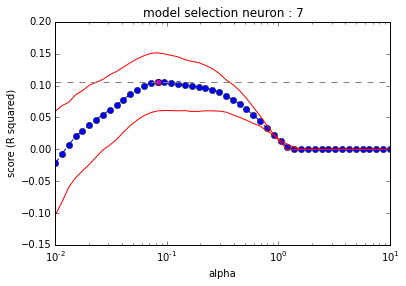

In [175]:
ind = np.argmax(scores)

fig = plt.figure()
plt.semilogx(alphas, scores, '--bo')
plt.semilogx(alphas, [x + y for x, y in zip(scores, scores_std)],'r')
plt.semilogx(alphas, [x - y for x, y in zip(scores, scores_std)],'r')
plt.semilogx(alphas[ind], scores[ind], 'mo')
plt.axhline(np.max(scores), linestyle='--', color='.5')
#plt.axvline(x=alphas[ind], ymin=-0.15, ymax = +2, linewidth=1, color='k')
plt.xlabel('alpha')
plt.ylabel('score (R squared)')
plt.title('model selection neuron : ' + str(neuron) )
plt.show()   
fig.savefig(str(neuron), dpi=fig.dpi)
#print(str(alphas[ind]))

In [176]:
# To answer this question we use the LassoCV object that sets its alpha
# parameter automatically from the data by internal cross-validation (i.e. it
# performs cross-validation on the training data it receives).
# We use external cross-validation to see how much the automatically obtained

# alphas differ across different cross-validation folds.

lasso_cv = LassoCV(alphas=alphas, random_state=0)
k_fold   = model_selection.KFold(5)

print("Answer to the bonus question:",
      "how much can you trust the selection of alpha?")
print()
print("Alpha parameters maximising the generalization score on different")
print("subsets of the data:")
for k, (train, test) in enumerate(k_fold.split(X_train, y_train)):
    lasso_cv.fit(X_train[train], y_train[train])
    print("[fold {0}] alpha: {1:.5f}, score: {2:.5f}".
          format(k, lasso_cv.alpha_, lasso_cv.score(X_train[test], y_train[test])))
print()
print("Answer: Not very much since we obtained different alphas for different")
print("subsets of the data and moreover, the scores for these alphas differ")
print("quite substantially.")

Answer to the bonus question: how much can you trust the selection of alpha?

Alpha parameters maximising the generalization score on different
subsets of the data:
[fold 0] alpha: 0.08286, score: 0.17877
[fold 1] alpha: 0.14563, score: 0.12376
[fold 2] alpha: 0.12649, score: 0.06058
[fold 3] alpha: 0.08286, score: 0.10151
[fold 4] alpha: 0.14563, score: 0.03149

Answer: Not very much since we obtained different alphas for different
subsets of the data and moreover, the scores for these alphas differ
quite substantially.
